<a href="https://colab.research.google.com/github/Roberto-he/TFM_RHG/blob/main/TFM_FIRE_RHG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TFM-

# OBJETIVO 

El objetivo de este proyecto es predecir los incendios que se producen en Londres.





# LIBRERIAS

In [1]:
# carga de datos
import pandas as pd
import io
# manipulación y visualización
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
import sqlite3
import seaborn as sns
from matplotlib import pyplot
from functools import reduce
from sklearn.preprocessing import LabelEncoder

In [2]:
#Librerias y acceso a google colab
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


# CARGA DE DATASET DE GRAN TAMAÑO EN GOOGLE DRIVE

##CONVERSION DEL DATASET A CSV

In [ ]:
def upload_files ():
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')))
    return df

In [ ]:
def upload_files_xls ():
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    df = pd.read_excel(io.StringIO(uploaded[fn].decode('utf-8')))
    return df

In [ ]:
df1 = upload_files_xls()
df1.head()

In [ ]:
df2 = upload_files_xls()
df2.head()

In [ ]:
df3 = upload_files_xls()
df3.head()

## UNION DE LOS DATASETS

Unir las 3 bases de datos

In [ ]:
frames = [df1, df2, df3]

df_excel = pd.concat(frames)

Pasar a CSV

In [ ]:
df_excel.to_csv('LFB incident 2009-2021.csv', index=False)

Descargar el CSV

In [ ]:
from google.colab import files

with open('LFB incident 2009-2021.csv', 'w') as f:
  df.to_csv(f,  index = False)
  

files.download('LFB incident 2009-2021.csv')

df.head()

In [ ]:
df=pd.read_csv("LFB incident 2009-2021.csv")
df

## UNZIP
Al ser un archivo muy pesado lo subo a google colab comprimido. Ya en colab lo descomprimo

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

In [ ]:
!unrar x  '/gdrive/My Drive/TFM-Roberto_Hernandez/LFB_incident_2009-2021.rar'  "/gdrive/My Drive/TFM-Roberto_Hernandez/"


# CARGA DATASETS

## DATASET INCENDIOS

In [ ]:
#Url: https://data.gov.uk/dataset/e6b9d1c6-7c34-42ca-a100-cd62164ea76c/london-fire-brigade-incident-records
llamadas = pd.read_csv('/gdrive/My Drive/TFM-Roberto_Hernandez/datasets/LFB incident 2009-2021.csv')
#Jupyter
#llamadas = pd.read_csv('C:/Users/rhgim/Desktop/tfm/datasets/LFB incident 2009-2021.csv')


llamadas_test=pd.read_csv('/gdrive/My Drive/TFM-Roberto_Hernandez/datasets/LFB incident 2009-2021.csv')
#Jupyter
#llamadas_test=pd.read_csv('C:/Users/rhgim/Desktop/tfm/datasets/LFB incident 2009-2021.csv')


llamadas_vis=llamadas
llamadas

C:\Users\rhgim\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,26,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


IncidentNumber  DateOfCall  CalYear TimeOfCall  HourOfCall  \
0              235138081  2009-01-01     2009   00:00:37           0   
1                   1091  2009-01-01     2009   00:00:46           0   
2                   2091  2009-01-01     2009   00:03:00           0   
3                   3091  2009-01-01     2009   00:04:27           0   
4                   5091  2009-01-01     2009   00:05:39           0   
...                  ...         ...      ...        ...         ...   
1333065  050590-30042021  2021-04-30     2021   21:42:23          21   
1333066  050431-30042021  2021-04-30     2021   16:20:38          16   
1333067  050653-30042021  2021-04-30     2021   23:53:36          23   
1333068  050428-30042021  2021-04-30     2021   16:14:59          16   
1333069  050249-30042021  2021-04-30     2021   09:44:37           9   

           IncidentGroup StopCodeDescription           SpecialServiceType  \
0        Special Service     Special Service                          RTC   
1        Special Service     Special Service        Assist other agencies   
2                   Fire      Secondary Fire                          NaN   
3                   Fire      Secondary Fire                          NaN   
4                   Fire      Secondary Fire                          NaN   
...                  ...                 ...                          ...   
1333065  Special Service     Special Service                 Lift Release   
1333066             Fire      Secondary Fire                          NaN   
1333067             Fire      Secondary Fire                          NaN   
1333068             Fire      Secondary Fire                          NaN   
1333069  Special Service     Special Service  Animal assistance incidents   

          PropertyCategory                                       PropertyType  \
0             Road Vehicle                                               Car    
1                  Outdoor                               Lake/pond/reservoir    
2                  Outdoor                             Road surface/pavement    
3                  Outdoor        Domestic garden (vegetation not equipment)    
4                  Outdoor              Cycle path/public footpath/bridleway    
...                    ...                                                ...   
1333065           Dwelling  Purpose Built Flats/Maisonettes - Up to 3 stor...   
1333066  Outdoor Structure                     Small refuse/rubbish container   
1333067  Outdoor Structure                     Small refuse/rubbish container   
1333068  Outdoor Structure                   Common external bin storage area   
1333069            Outdoor                               Animal harm outdoors   

         ... SecondPumpArriving_DeployedFromStation  \
0        ...                                    NaN   
1        ...                                    NaN   
2        ...                                    NaN   
3        ...                                    NaN   
4        ...                                    NaN   
...      ...                                    ...   
1333065  ...                                    NaN   
1333066  ...                                    NaN   
1333067  ...                                    NaN   
1333068  ...                                    NaN   
1333069  ...                                    NaN   

        NumStationsWithPumpsAttending NumPumpsAttending          UPRN  \
0                                 2.0               2.0           NaN   
1                                 NaN               NaN           NaN   
2                                 1.0               1.0           NaN   
3                                 1.0               1.0           NaN   
4                                 1.0               2.0           NaN   
...                               ...               ...           ...   
1333065                           1.0               1.0  0.000000e+00   
13

In [ ]:
#Vemos la aparte de abajo de nuestro dataset
llamadas.tail()


IncidentNumber  DateOfCall  CalYear TimeOfCall  HourOfCall  \
1333065  050590-30042021  2021-04-30     2021   21:42:23          21   
1333066  050431-30042021  2021-04-30     2021   16:20:38          16   
1333067  050653-30042021  2021-04-30     2021   23:53:36          23   
1333068  050428-30042021  2021-04-30     2021   16:14:59          16   
1333069  050249-30042021  2021-04-30     2021   09:44:37           9   

           IncidentGroup StopCodeDescription           SpecialServiceType  \
1333065  Special Service     Special Service                 Lift Release   
1333066             Fire      Secondary Fire                          NaN   
1333067             Fire      Secondary Fire                          NaN   
1333068             Fire      Secondary Fire                          NaN   
1333069  Special Service     Special Service  Animal assistance incidents   

          PropertyCategory                                       PropertyType  \
1333065           Dwelling  Purpose Built Flats/Maisonettes - Up to 3 stor...   
1333066  Outdoor Structure                     Small refuse/rubbish container   
1333067  Outdoor Structure                     Small refuse/rubbish container   
1333068  Outdoor Structure                   Common external bin storage area   
1333069            Outdoor                               Animal harm outdoors   

         ... SecondPumpArriving_DeployedFromStation  \
1333065  ...                                    NaN   
1333066  ...                                    NaN   
1333067  ...                                    NaN   
1333068  ...                                    NaN   
1333069  ...                                    NaN   

        NumStationsWithPumpsAttending NumPumpsAttending          UPRN  \
1333065                           1.0               1.0  0.000000e+00   
1333066                           1.0               1.0  1.002533e+10   
1333067                           1.0               1.0  1.000236e+11   
1333068                           1.0               1.0  1.000210e+11   
1333069                           1.0               1.0  1.002330e+10   

               USRN   Latitude Longitude PumpCount PumpHoursRoundUp  \
1333065  20400412.0        NaN       NaN       1.0              1.0   
1333066  22004367.0  51.488022 -0.038628       1.0              1.0   
1333067  22832450.0  51.573868 -0.014799       1.0              1.0   
1333068  20801074.0  51.469960 -0.016181       1.0              1.0   
1333069  20101032.0  51.427664  0.138471       2.0              1.0   

         Notional Cost (£)  
1333065              352.0  
1333066              352.0  
1333067              352.0  
1333068              352.0  
1333069              352.0  

[5 rows x 38 columns]

Tamaño del dataset

In [ ]:
llamadas.shape

(1333070, 38)

Informacion asociada al dataset


In [ ]:
llamadas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1333070 entries, 0 to 1333069
Data columns (total 38 columns):
 #   Column                                  Non-Null Count    Dtype  
---  ------                                  --------------    -----  
 0   IncidentNumber                          1333070 non-null  object 
 1   DateOfCall                              1333070 non-null  object 
 2   CalYear                                 1333070 non-null  int64  
 3   TimeOfCall                              1333070 non-null  object 
 4   HourOfCall                              1333070 non-null  int64  
 5   IncidentGroup                           1333069 non-null  object 
 6   StopCodeDescription                     1333069 non-null  object 
 7   SpecialServiceType                      408181 non-null   object 
 8   PropertyCategory                        1333069 non-null  object 
 9   PropertyType                            1333069 non-null  object 
 10  AddressQualifier              

### ANALISIS DE DATOS

In [ ]:
def descripcionDatosDataset(datos):
    print("Cantidad de filas:", datos.shape[0])
    print("Cantidad de columnas:", datos.shape[1])
    print('-'*100)
    for columna in datos.columns:
        valoresDescripcion = ''
        tipo = ''
        if datos[columna].dtype == 'float64' or datos[columna].dtype == 'int64':
            tipo = 'numérico'
            valoresDescripcion = datos[columna].agg(['min', 'max', 'mean', 'std', 'median'])
        else:
            tipo = 'nominal' #categórico | string | no-numérico
            valoresDescripcion = {'valoresPresentes' : datos[columna].unique(), 
                                  'cantidadNulos' : datos[columna].isna().sum()}
                                 #'conteoValores' : pd.value_counts(datos[columna])}
        print('Columna: ' + columna)
        print('Tipo de datos: ' + tipo)
        print('Descripción de valores:')
        if tipo == 'numérico':
            print(valoresDescripcion)
        else:
            print('-- Valores presentes (10 primeros): ' + str(valoresDescripcion['valoresPresentes'][:10]))
            pctNulos = (valoresDescripcion['cantidadNulos'] / datos.shape[0]) * 100
            print('-- Cantidad de nulos: ' + str(valoresDescripcion['cantidadNulos']) + ' = ' + "{0:.2f}".format(pctNulos) + '%')
        print('-'*100)

In [ ]:
descripcionDatosDataset(llamadas)

Cantidad de filas: 1333070
Cantidad de columnas: 38
----------------------------------------------------------------------------------------------------
Columna: IncidentNumber
Tipo de datos: nominal
Descripción de valores:
-- Valores presentes (10 primeros): [235138081 1091 2091 3091 5091 6091 8091 9091 10091 11091]
-- Cantidad de nulos: 0 = 0.00%
----------------------------------------------------------------------------------------------------
Columna: DateOfCall
Tipo de datos: nominal
Descripción de valores:
-- Valores presentes (10 primeros): ['2009-01-01' '2009-01-02' '2009-01-03' '2009-01-04' '2009-01-05'
 '2009-01-06' '2009-01-07' '2009-01-08' '2009-01-09' '2009-01-10']
-- Cantidad de nulos: 0 = 0.00%
----------------------------------------------------------------------------------------------------
Columna: CalYear
Tipo de datos: numérico
Descripción de valores:
min       2009.000000
max       2021.000000
mean      2014.398667
std          3.632486
median    2014.000000
Name

Columna: FRS
Tipo de datos: nominal
Descripción de valores:
-- Valores presentes (10 primeros): ['London' 'OverTheBorder']
-- Cantidad de nulos: 0 = 0.00%
----------------------------------------------------------------------------------------------------
Columna: IncidentStationGround
Tipo de datos: nominal
Descripción de valores:
-- Valores presentes (10 primeros): ['Battersea' 'Lambeth' 'Edmonton' 'Hillingdon' 'Holloway' 'Kentish Town'
 'Lee Green' 'Heston' 'Shoreditch' 'Soho']
-- Cantidad de nulos: 0 = 0.00%
----------------------------------------------------------------------------------------------------
Columna: FirstPumpArriving_AttendanceTime
Tipo de datos: numérico
Descripción de valores:
min          1.000000
max       1200.000000
mean       317.916411
std        140.140710
median     295.000000
Name: FirstPumpArriving_AttendanceTime, dtype: float64
----------------------------------------------------------------------------------------------------
Columna: FirstPumpArrivin

### LIMPIEZA

Borramos los atributos posteriores a la llamdas que no aportan nada en nuestro estudio


In [ ]:
col_eliminar_llamadas=["TimeOfCall","IncidentStationGround","IncGeo_WardName","IncGeo_BoroughName",
                       "FirstPumpArriving_AttendanceTime","FirstPumpArriving_DeployedFromStation", "IncGeo_WardNameNew",
                       "SecondPumpArriving_AttendanceTime","Easting_m","Northing_m","SecondPumpArriving_DeployedFromStation",
                       "NumStationsWithPumpsAttending","NumPumpsAttending","PumpHoursRoundUp","PumpCount","Notional Cost (£)","Postcode_full"]
llamadas.drop(col_eliminar_llamadas, inplace=True, axis=1)
llamadas_test.drop(col_eliminar_llamadas, inplace=True, axis=1)
llamadas

IncidentNumber  DateOfCall  CalYear  HourOfCall    IncidentGroup  \
0              235138081  2009-01-01     2009           0  Special Service   
1                   1091  2009-01-01     2009           0  Special Service   
2                   2091  2009-01-01     2009           0             Fire   
3                   3091  2009-01-01     2009           0             Fire   
4                   5091  2009-01-01     2009           0             Fire   
...                  ...         ...      ...         ...              ...   
1333065  050590-30042021  2021-04-30     2021          21  Special Service   
1333066  050431-30042021  2021-04-30     2021          16             Fire   
1333067  050653-30042021  2021-04-30     2021          23             Fire   
1333068  050428-30042021  2021-04-30     2021          16             Fire   
1333069  050249-30042021  2021-04-30     2021           9  Special Service   

        StopCodeDescription           SpecialServiceType   PropertyCategory  \
0           Special Service                          RTC       Road Vehicle   
1           Special Service        Assist other agencies            Outdoor   
2            Secondary Fire                          NaN            Outdoor   
3            Secondary Fire                          NaN            Outdoor   
4            Secondary Fire                          NaN            Outdoor   
...                     ...                          ...                ...   
1333065     Special Service                 Lift Release           Dwelling   
1333066      Secondary Fire                          NaN  Outdoor Structure   
1333067      Secondary Fire                          NaN  Outdoor Structure   
1333068      Secondary Fire                          NaN  Outdoor Structure   
1333069     Special Service  Animal assistance incidents            Outdoor   

                                              PropertyType  \
0                                                     Car    
1                                     Lake/pond/reservoir    
2                                   Road surface/pavement    
3              Domestic garden (vegetation not equipment)    
4                    Cycle path/public footpath/bridleway    
...                                                    ...   
1333065  Purpose Built Flats/Maisonettes - Up to 3 stor...   
1333066                     Small refuse/rubbish container   
1333067                     Small refuse/rubbish container   
1333068                   Common external bin storage area   
1333069                               Animal harm outdoors   

                                        AddressQualifier  ...  \
0                  In street close to gazetteer location  ...   
1           Open land/water - nearest gazetteer location  ...   
2                   In street outside gazetteer location  ...   
3                       On land associated with building  ...   
4                   In street outside gazetteer location  ...   
...                                                  ...  ...   
1333065                             Within same building  ...   
1333066                        Correct incident location  ...   
1333067  Nearby address - street not listed in gazetteer  ...   
1333068            In street close to gazetteer location  ...   
1333069                 On land associated with building  ...   

        IncGeo_BoroughCode      ProperCase IncGeo_WardCode Easting_rounded  \
0                E09000032      Wandsworth       E05000620          528650   
1                E09000022         Lambeth       E05000416          530450   
2                E09000010         Enfield       E05000201          533750   
3                E09000017      Hillingdon       E05000332          507750   
4                E09000019       Islington       E05000375          531050   
...                    ...             ...             ...             ...   
1333065          E09000007          Camden       E05

Convertir columna de incidentes en tres columnas numerales para poder contabilizarlos


In [ ]:
r=[]
p=[]
s=[]
for i in llamadas["IncidentGroup"]:
    if i=="Fire":
     p.append(1)
     r.append(0)
     s.append(0)
    elif i== "False Alarm":
     p.append(0)
     r.append(1)
     s.append(0)
    else:
     p.append(0)
     r.append(0)
     s.append(1)  

llamadas["Num_Fire"]=p
llamadas["Num_Falsa_A"]=r
llamadas["Num_Service"]=s
llamadas.drop("IncidentGroup", inplace=True, axis=1)
llamadas

IncidentNumber  DateOfCall  CalYear  HourOfCall StopCodeDescription  \
0              235138081  2009-01-01     2009           0     Special Service   
1                   1091  2009-01-01     2009           0     Special Service   
2                   2091  2009-01-01     2009           0      Secondary Fire   
3                   3091  2009-01-01     2009           0      Secondary Fire   
4                   5091  2009-01-01     2009           0      Secondary Fire   
...                  ...         ...      ...         ...                 ...   
1333065  050590-30042021  2021-04-30     2021          21     Special Service   
1333066  050431-30042021  2021-04-30     2021          16      Secondary Fire   
1333067  050653-30042021  2021-04-30     2021          23      Secondary Fire   
1333068  050428-30042021  2021-04-30     2021          16      Secondary Fire   
1333069  050249-30042021  2021-04-30     2021           9     Special Service   

                  SpecialServiceType   PropertyCategory  \
0                                RTC       Road Vehicle   
1              Assist other agencies            Outdoor   
2                                NaN            Outdoor   
3                                NaN            Outdoor   
4                                NaN            Outdoor   
...                              ...                ...   
1333065                 Lift Release           Dwelling   
1333066                          NaN  Outdoor Structure   
1333067                          NaN  Outdoor Structure   
1333068                          NaN  Outdoor Structure   
1333069  Animal assistance incidents            Outdoor   

                                              PropertyType  \
0                                                     Car    
1                                     Lake/pond/reservoir    
2                                   Road surface/pavement    
3              Domestic garden (vegetation not equipment)    
4                    Cycle path/public footpath/bridleway    
...                                                    ...   
1333065  Purpose Built Flats/Maisonettes - Up to 3 stor...   
1333066                     Small refuse/rubbish container   
1333067                     Small refuse/rubbish container   
1333068                   Common external bin storage area   
1333069                               Animal harm outdoors   

                                        AddressQualifier Postcode_district  \
0                  In street close to gazetteer location              SW11   
1           Open land/water - nearest gazetteer location               SE1   
2                   In street outside gazetteer location                N9   
3                       On land associated with building              UB10   
4                   In street outside gazetteer location                N7   
...                                                  ...               ...   
1333065                             Within same building               NW6   
1333066                        Correct incident location               SE8   
1333067  Nearby address - street not listed in gazetteer               E10   
1333068            In street close to gazetteer location              SE13   
1333069                 On land associated with building              DA14   

         ... Easting_rounded Northing_rounded     FRS          UPRN  \
0        ...          528650           176850  London           NaN   
1        ...          530450           179050  London           NaN   
2        ...          533750           194450  London           NaN   
3        ...          507750           182850  London           NaN   
4        ...          531050           185350  London           NaN   
...      ...             ...              ...     ...           ...   
1333065  ...          525650           184050  London  0.000000e+00   
1333066  ...          536250           178350  London  1.002533e+10   
1333067

In [ ]:
r=[]
p=[]
s=[]
for i in llamadas_test["IncidentGroup"]:
    if i=="Fire":
     p.append(1)
     r.append(0)
     s.append(0)
    elif i== "False Alarm":
     p.append(0)
     r.append(1)
     s.append(0)
    else:
     p.append(0)
     r.append(0)
     s.append(1)  

llamadas_test["Num_Fire"]=p
llamadas_test["Num_Falsa_A"]=r
llamadas_test["Num_Service"]=s

llamadas_test.drop("IncidentGroup", inplace=True, axis=1)
llamadas_test

IncidentNumber  DateOfCall  CalYear  HourOfCall StopCodeDescription  \
0              235138081  2009-01-01     2009           0     Special Service   
1                   1091  2009-01-01     2009           0     Special Service   
2                   2091  2009-01-01     2009           0      Secondary Fire   
3                   3091  2009-01-01     2009           0      Secondary Fire   
4                   5091  2009-01-01     2009           0      Secondary Fire   
...                  ...         ...      ...         ...                 ...   
1333065  050590-30042021  2021-04-30     2021          21     Special Service   
1333066  050431-30042021  2021-04-30     2021          16      Secondary Fire   
1333067  050653-30042021  2021-04-30     2021          23      Secondary Fire   
1333068  050428-30042021  2021-04-30     2021          16      Secondary Fire   
1333069  050249-30042021  2021-04-30     2021           9     Special Service   

                  SpecialServiceType   PropertyCategory  \
0                                RTC       Road Vehicle   
1              Assist other agencies            Outdoor   
2                                NaN            Outdoor   
3                                NaN            Outdoor   
4                                NaN            Outdoor   
...                              ...                ...   
1333065                 Lift Release           Dwelling   
1333066                          NaN  Outdoor Structure   
1333067                          NaN  Outdoor Structure   
1333068                          NaN  Outdoor Structure   
1333069  Animal assistance incidents            Outdoor   

                                              PropertyType  \
0                                                     Car    
1                                     Lake/pond/reservoir    
2                                   Road surface/pavement    
3              Domestic garden (vegetation not equipment)    
4                    Cycle path/public footpath/bridleway    
...                                                    ...   
1333065  Purpose Built Flats/Maisonettes - Up to 3 stor...   
1333066                     Small refuse/rubbish container   
1333067                     Small refuse/rubbish container   
1333068                   Common external bin storage area   
1333069                               Animal harm outdoors   

                                        AddressQualifier Postcode_district  \
0                  In street close to gazetteer location              SW11   
1           Open land/water - nearest gazetteer location               SE1   
2                   In street outside gazetteer location                N9   
3                       On land associated with building              UB10   
4                   In street outside gazetteer location                N7   
...                                                  ...               ...   
1333065                             Within same building               NW6   
1333066                        Correct incident location               SE8   
1333067  Nearby address - street not listed in gazetteer               E10   
1333068            In street close to gazetteer location              SE13   
1333069                 On land associated with building              DA14   

         ... Easting_rounded Northing_rounded     FRS          UPRN  \
0        ...          528650           176850  London           NaN   
1        ...          530450           179050  London           NaN   
2        ...          533750           194450  London           NaN   
3        ...          507750           182850  London           NaN   
4        ...          531050           185350  London           NaN   
...      ...             ...              ...     ...           ...   
1333065  ...          525650           184050  London  0.000000e+00   
1333066  ...          536250           178350  London  1.002533e+10   
1333067

In [ ]:
llamadas_test

IncidentNumber  DateOfCall  CalYear  HourOfCall StopCodeDescription  \
0              235138081  2009-01-01     2009           0     Special Service   
1                   1091  2009-01-01     2009           0     Special Service   
2                   2091  2009-01-01     2009           0      Secondary Fire   
3                   3091  2009-01-01     2009           0      Secondary Fire   
4                   5091  2009-01-01     2009           0      Secondary Fire   
...                  ...         ...      ...         ...                 ...   
1333065  050590-30042021  2021-04-30     2021          21     Special Service   
1333066  050431-30042021  2021-04-30     2021          16      Secondary Fire   
1333067  050653-30042021  2021-04-30     2021          23      Secondary Fire   
1333068  050428-30042021  2021-04-30     2021          16      Secondary Fire   
1333069  050249-30042021  2021-04-30     2021           9     Special Service   

                  SpecialServiceType   PropertyCategory  \
0                                RTC       Road Vehicle   
1              Assist other agencies            Outdoor   
2                                NaN            Outdoor   
3                                NaN            Outdoor   
4                                NaN            Outdoor   
...                              ...                ...   
1333065                 Lift Release           Dwelling   
1333066                          NaN  Outdoor Structure   
1333067                          NaN  Outdoor Structure   
1333068                          NaN  Outdoor Structure   
1333069  Animal assistance incidents            Outdoor   

                                              PropertyType  \
0                                                     Car    
1                                     Lake/pond/reservoir    
2                                   Road surface/pavement    
3              Domestic garden (vegetation not equipment)    
4                    Cycle path/public footpath/bridleway    
...                                                    ...   
1333065  Purpose Built Flats/Maisonettes - Up to 3 stor...   
1333066                     Small refuse/rubbish container   
1333067                     Small refuse/rubbish container   
1333068                   Common external bin storage area   
1333069                               Animal harm outdoors   

                                        AddressQualifier Postcode_district  \
0                  In street close to gazetteer location              SW11   
1           Open land/water - nearest gazetteer location               SE1   
2                   In street outside gazetteer location                N9   
3                       On land associated with building              UB10   
4                   In street outside gazetteer location                N7   
...                                                  ...               ...   
1333065                             Within same building               NW6   
1333066                        Correct incident location               SE8   
1333067  Nearby address - street not listed in gazetteer               E10   
1333068            In street close to gazetteer location              SE13   
1333069                 On land associated with building              DA14   

         ... Easting_rounded Northing_rounded     FRS          UPRN  \
0        ...          528650           176850  London           NaN   
1        ...          530450           179050  London           NaN   
2        ...          533750           194450  London           NaN   
3        ...          507750           182850  London           NaN   
4        ...          531050           185350  London           NaN   
...      ...             ...              ...     ...           ...   
1333065  ...          525650           184050  London  0.000000e+00   
1333066  ...          536250           178350  London  1.002533e+10   
1333067

In [ ]:
llamadas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1333070 entries, 0 to 1333069
Data columns (total 23 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   IncidentNumber       1333070 non-null  object 
 1   DateOfCall           1333070 non-null  object 
 2   CalYear              1333070 non-null  int64  
 3   HourOfCall           1333070 non-null  int64  
 4   StopCodeDescription  1333069 non-null  object 
 5   SpecialServiceType   408181 non-null   object 
 6   PropertyCategory     1333069 non-null  object 
 7   PropertyType         1333069 non-null  object 
 8   AddressQualifier     1333070 non-null  object 
 9   Postcode_district    1333070 non-null  object 
 10  IncGeo_BoroughCode   1333070 non-null  object 
 11  ProperCase           1333070 non-null  object 
 12  IncGeo_WardCode      1333070 non-null  object 
 13  Easting_rounded      1333070 non-null  int64  
 14  Northing_rounded     1333070 non-null  int64  
 15

Borramos los atributos posteriores a la llamdas que no aportan nada en nuestro estudio


In [ ]:
col_eliminar_llamadas=["IncidentNumber","HourOfCall","StopCodeDescription","SpecialServiceType","PropertyCategory","PropertyType","AddressQualifier"]
llamadas.drop(col_eliminar_llamadas, inplace=True, axis=1)
llamadas_test.drop(col_eliminar_llamadas, inplace=True, axis=1)
llamadas

DateOfCall  CalYear Postcode_district IncGeo_BoroughCode  \
0        2009-01-01     2009              SW11          E09000032   
1        2009-01-01     2009               SE1          E09000022   
2        2009-01-01     2009                N9          E09000010   
3        2009-01-01     2009              UB10          E09000017   
4        2009-01-01     2009                N7          E09000019   
...             ...      ...               ...                ...   
1333065  2021-04-30     2021               NW6          E09000007   
1333066  2021-04-30     2021               SE8          E09000023   
1333067  2021-04-30     2021               E10          E09000031   
1333068  2021-04-30     2021              SE13          E09000011   
1333069  2021-04-30     2021              DA14          E09000004   

             ProperCase IncGeo_WardCode  Easting_rounded  Northing_rounded  \
0            Wandsworth       E05000620           528650            176850   
1               Lambeth       E05000416           530450            179050   
2               Enfield       E05000201           533750            194450   
3            Hillingdon       E05000332           507750            182850   
4             Islington       E05000375           531050            185350   
...                 ...             ...              ...               ...   
1333065          Camden       E05000144           525650            184050   
1333066        Lewisham       E05000443           536250            178350   
1333067  Waltham Forest       E05000603           537650            187950   
1333068       Greenwich       E05000222           537850            176450   
1333069          Bexley       E05011229           548750            172050   

            FRS          UPRN        USRN   Latitude  Longitude  Num_Fire  \
0        London           NaN         NaN        NaN        NaN         0   
1        London           NaN         NaN        NaN        NaN         0   
2        London           NaN         NaN        NaN        NaN         1   
3        London           NaN         NaN        NaN        NaN         1   
4        London           NaN         NaN        NaN        NaN         1   
...         ...           ...         ...        ...        ...       ...   
1333065  London  0.000000e+00  20400412.0        NaN        NaN         0   
1333066  London  1.002533e+10  22004367.0  51.488022  -0.038628         1   
1333067  London  1.000236e+11  22832450.0  51.573868  -0.014799         1   
1333068  London  1.000210e+11  20801074.0  51.469960  -0.016181         1   
1333069  London  1.002330e+10  20101032.0  51.427664   0.138471         0   

         Num_Falsa_A  Num_Service  
0                  0            1  
1                  0            1  
2                  0            0  
3                  0            0  
4                  0            0  
...              ...          ...  
1333065            0            1  
1333066            0            0  
1333067            0            0  
1333068            0            0  
1333069            0            1  

[1333070 rows x 16 columns]

Eliminacion de valores por encima de 2014 y menores de 2006 en el dataset de entranamiento. Y eliminacion de todas las fechas diferentes a 2015 en el dataset de test

In [ ]:
llamadas= llamadas.loc[(llamadas["CalYear"]>=2009)&(llamadas["CalYear"]<=2014)]

llamadas_test= llamadas_test.loc[(llamadas_test["CalYear"]>=2015)&(llamadas_test["CalYear"]<=2015)]
llamadas_test

DateOfCall  CalYear Postcode_district IncGeo_BoroughCode  \
685252  2015-01-01     2015               CR0          E09000008   
685253  2015-01-01     2015               EN2          E09000010   
685254  2015-01-01     2015               NW5          E09000007   
685255  2015-01-01     2015                W7          E09000009   
685256  2015-01-01     2015               CR8          E09000008   
...            ...      ...               ...                ...   
783600  2015-12-31     2015               KT2          E09000021   
783601  2015-12-31     2015              SW11          E09000032   
783602  2015-12-31     2015                E2          E09000030   
783603  2015-12-31     2015              SE15          E09000023   
783604  2015-12-31     2015               UB2          E09000009   

                  ProperCase IncGeo_WardCode  Easting_rounded  \
685252               Croydon       E05000162           534550   
685253               Enfield       E05000195           532650   
685254                Camden       E05000131           529350   
685255                Ealing       E05000180           515650   
685256               Croydon       E05000156           531450   
...                      ...             ...              ...   
783600  Kingston Upon thames       E05000406           521450   
783601            Wandsworth       E05000617           526950   
783602         Tower Hamlets       E05009335           534250   
783603              Lewisham       E05000449           535350   
783604                Ealing       E05000186           512850   

        Northing_rounded     FRS  UPRN  USRN  Latitude  Longitude  Num_Fire  \
685252            164350  London   NaN   NaN       NaN        NaN         0   
685253            198150  London   NaN   NaN       NaN        NaN         1   
685254            184850  London   NaN   NaN       NaN        NaN         0   
685255            181250  London   NaN   NaN       NaN        NaN         1   
685256            159150  London   NaN   NaN       NaN        NaN         0   
...                  ...     ...   ...   ...       ...        ...       ...   
783600            170050  London   NaN   NaN       NaN        NaN         0   
783601            175850  London   NaN   NaN       NaN        NaN         0   
783602            182950  London   NaN   NaN       NaN        NaN         1   
783603            177850  London   NaN   NaN       NaN        NaN         1   
783604            179050  London   NaN   NaN       NaN        NaN         1   

        Num_Falsa_A  Num_Service  
685252            0            1  
685253            0            0  
685254            1            0  
685255            0            0  
685256            0            1  
...             ...          ...  
783600            0            1  
783601            0            1  
783602            0            0  
783603            0            0  
783604            0            0  

[98353 rows x 16 columns]

Nuevo tamaño del dataset

In [ ]:
llamadas.shape

(685252, 16)

In [ ]:
llamadas_test.shape

(98353, 16)

Agrupamiento del dataset por barrios y fecha

In [ ]:
#llamadas.groupby(["DateOfCall"]).agg(lambda x: set(x))
llamadas=llamadas.groupby(["DateOfCall","IncGeo_BoroughCode"]).agg({'Postcode_district':'first', "CalYear" : "first",
                                                            "ProperCase": "first",
                                                           "Easting_rounded":"mean", "Northing_rounded":"mean","UPRN": 'mean', "USRN": "mean",
                                                           "Latitude": "mean", "Longitude":"mean", "Num_Fire":"sum", "Num_Falsa_A":"sum",
                                                           "Num_Service":"sum"}).reset_index()

llamadas_test=llamadas_test.groupby(["DateOfCall","IncGeo_BoroughCode"]).agg({'Postcode_district':'first',"CalYear" : "first", 
                                                           "ProperCase": "first", 
                                                           "Easting_rounded":"mean", "Northing_rounded":"mean","UPRN": 'mean', "USRN": "mean",
                                                           "Latitude": "mean", "Longitude":"mean", "Num_Fire":"sum", "Num_Falsa_A":"sum",
                                                           "Num_Service":"sum"}).reset_index()


Desglose de la columna fecha en dia, mes y año

In [ ]:
llamadas['Dia'] = pd.to_datetime(llamadas['DateOfCall'], format='%Y-%m-%d').dt.strftime('%d').astype(int)
llamadas['Dia'] 

llamadas_test['Dia'] = pd.to_datetime(llamadas_test['DateOfCall'], format='%Y-%m-%d').dt.strftime('%d').astype(int)
llamadas_test['Dia'] 

0         1
1         1
2         1
3         1
4         1
         ..
12246    31
12247    31
12248    31
12249    31
12250    31
Name: Dia, Length: 12251, dtype: int32

In [ ]:
llamadas['Mes'] = pd.to_datetime(llamadas['DateOfCall'], format='%Y-%m-%d').dt.strftime('%m').astype(int)
llamadas['Mes'] 

llamadas_test['Mes'] = pd.to_datetime(llamadas_test['DateOfCall'], format='%Y-%m-%d').dt.strftime('%m').astype(int)
llamadas_test['Mes'] 

0         1
1         1
2         1
3         1
4         1
         ..
12246    12
12247    12
12248    12
12249    12
12250    12
Name: Mes, Length: 12251, dtype: int32

In [ ]:
llamadas.drop("DateOfCall", inplace=True, axis=1)

llamadas_test.drop("DateOfCall", inplace=True, axis=1)

In [ ]:
llamadas.shape

(73594, 15)

In [ ]:
llamadas_test.shape

(12251, 15)

In [ ]:
llamadas.head(60)

IncGeo_BoroughCode Postcode_district  CalYear              ProperCase  \
0           E00000000               CR3     2009           Not geo-coded   
1           E09000001              EC1A     2009          City Of london   
2           E09000002               RM8     2009    Barking And dagenham   
3           E09000003               N12     2009                  Barnet   
4           E09000004               DA5     2009                  Bexley   
5           E09000005               W10     2009                   Brent   
6           E09000006              SE26     2009                 Bromley   
7           E09000007               NW5     2009                  Camden   
8           E09000008               CR9     2009                 Croydon   
9           E09000009                W5     2009                  Ealing   
10          E09000010                N9     2009                 Enfield   
11          E09000011               SE3     2009               Greenwich   
12          E09000012                E8     2009                 Hackney   
13          E09000013               W14     2009  Hammersmith And fulham   
14          E09000014                N6     2009                Haringey   
15          E09000015               HA8     2009                  Harrow   
16          E09000016               RM3     2009                Havering   
17          E09000017              UB10     2009              Hillingdon   
18          E09000018               TW3     2009                Hounslow   
19          E09000019                N7     2009               Islington   
20          E09000020               W10     2009  Kensington And chelsea   
21          E09000021               KT6     2009    Kingston Upon thames   
22          E09000022               SE1     2009                 Lambeth   
23          E09000023               SE8     2009                Lewisham   
24          E09000024               CR4     2009                  Merton   
25          E09000025                E6     2009                  Newham   
26          E09000026               IG6     2009               Redbridge   
27          E09000027              TW11     2009    Richmond Upon thames   
28          E09000028               SE5     2009               Southwark   
29          E09000029               CR0     2009                  Sutton   
30          E09000030                E3     2009           Tower Hamlets   
31          E09000031               E17     2009          Waltham Forest   
32          E09000032              SW11     2009              Wandsworth   
33          E09000033              WC2N     2009             Westminster   
34          E00000000               CR6     2009           Not geo-coded   
35          E09000001              EC3A     2009          City Of london   
36          E09000002               RM8     2009    Barking And dagenham   
37          E09000003               NW4     2009                  Barnet   
38          E09000004              DA14     2009                  Bexley   
39          E09000005               HA0     2009                   Brent   
40          E09000006               BR2     2009                 Bromley   
41          E09000007               NW3     2009                  Camden   
42          E09000008               CR0     2009                 Croydon   
43          E09000009                W3     2009                  Ealing   
44          E09000010               EN1     2009                 Enfield   
45          E09000011              SE18     2009               Greenwich   
46          E09000012               N16     2009                 Hackney   
47          E09000013               SW6     2009  Hammersmith And fulham   
48          E09000014               N17     2009                Haringey   
49          E09000015               HA3     2009                  Harrow   
50          E09000016              RM13     2009                Havering   
51          E09000017               TW6     2009   

Renombramos las columnas para poder hacer las uniones entre los distintos datasets

In [ ]:
llamadas=llamadas.rename(columns={"IncGeo_BoroughCode":"Code", "CalYear":"Year"})
llamadas_test=llamadas_test.rename(columns={"IncGeo_BoroughCode":"Code", "CalYear":"Year"})
llamadas

Code Postcode_district  Year            ProperCase  \
0      E00000000               CR3  2009         Not geo-coded   
1      E09000001              EC1A  2009        City Of london   
2      E09000002               RM8  2009  Barking And dagenham   
3      E09000003               N12  2009                Barnet   
4      E09000004               DA5  2009                Bexley   
...          ...               ...   ...                   ...   
73589  E09000029               SM1  2014                Sutton   
73590  E09000030                E1  2014         Tower Hamlets   
73591  E09000031               E10  2014        Waltham Forest   
73592  E09000032              SW17  2014            Wandsworth   
73593  E09000033               W1D  2014           Westminster   

       Easting_rounded  Northing_rounded  UPRN  USRN  Latitude  Longitude  \
0        533850.000000     158600.000000   NaN   NaN       NaN        NaN   
1        531833.333333     181733.333333   NaN   NaN       NaN        NaN   
2        547300.000000     185121.428571   NaN   NaN       NaN        NaN   
3        523620.000000     191960.000000   NaN   NaN       NaN        NaN   
4        548730.000000     177890.000000   NaN   NaN       NaN        NaN   
...                ...               ...   ...   ...       ...        ...   
73589    526416.666667     165100.000000   NaN   NaN       NaN        NaN   
73590    534650.000000     181783.333333   NaN   NaN       NaN        NaN   
73591    537383.333333     188050.000000   NaN   NaN       NaN        NaN   
73592    526310.000000     172490.000000   NaN   NaN       NaN        NaN   
73593    528213.157895     180728.947368   NaN   NaN       NaN        NaN   

       Num_Fire  Num_Falsa_A  Num_Service  Dia  Mes  
0             0            2            0    1    1  
1             0            4            2    1    1  
2             8            4            2    1    1  
3             1            7            2    1    1  
4             2            1            2    1    1  
...         ...          ...          ...  ...  ...  
73589         1            3            2   31   12  
73590         0            2            1   31   12  
73591         2            1            0   31   12  
73592         0            3            2   31   12  
73593         2           14            3   31   12  

[73594 rows x 15 columns]

In [ ]:
llamadas["Code"].unique()

array(['E00000000', 'E09000001', 'E09000002', 'E09000003', 'E09000004',
       'E09000005', 'E09000006', 'E09000007', 'E09000008', 'E09000009',
       'E09000010', 'E09000011', 'E09000012', 'E09000013', 'E09000014',
       'E09000015', 'E09000016', 'E09000017', 'E09000018', 'E09000019',
       'E09000020', 'E09000021', 'E09000022', 'E09000023', 'E09000024',
       'E09000025', 'E09000026', 'E09000027', 'E09000028', 'E09000029',
       'E09000030', 'E09000031', 'E09000032', 'E09000033'], dtype=object)

Eliminacion de todos los barrios que no son de Londres

In [ ]:
llamadas["Code_true"]= llamadas["Code"].str.contains('E09', na=False)
llamadas=llamadas.loc[(llamadas["Code_true"]==True)]
llamadas.drop("Code_true", inplace=True, axis=1)

#Dataset para el test
llamadas_test["Code_true"]= llamadas_test["Code"].str.contains('E09', na=False)
llamadas_test=llamadas_test.loc[(llamadas_test["Code_true"]==True)]
llamadas_test.drop("Code_true", inplace=True, axis=1)

llamadas

C:\Users\rhgim\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Code Postcode_district  Year            ProperCase  \
1      E09000001              EC1A  2009        City Of london   
2      E09000002               RM8  2009  Barking And dagenham   
3      E09000003               N12  2009                Barnet   
4      E09000004               DA5  2009                Bexley   
5      E09000005               W10  2009                 Brent   
...          ...               ...   ...                   ...   
73589  E09000029               SM1  2014                Sutton   
73590  E09000030                E1  2014         Tower Hamlets   
73591  E09000031               E10  2014        Waltham Forest   
73592  E09000032              SW17  2014            Wandsworth   
73593  E09000033               W1D  2014           Westminster   

       Easting_rounded  Northing_rounded  UPRN  USRN  Latitude  Longitude  \
1        531833.333333     181733.333333   NaN   NaN       NaN        NaN   
2        547300.000000     185121.428571   NaN   NaN       NaN        NaN   
3        523620.000000     191960.000000   NaN   NaN       NaN        NaN   
4        548730.000000     177890.000000   NaN   NaN       NaN        NaN   
5        521930.000000     184950.000000   NaN   NaN       NaN        NaN   
...                ...               ...   ...   ...       ...        ...   
73589    526416.666667     165100.000000   NaN   NaN       NaN        NaN   
73590    534650.000000     181783.333333   NaN   NaN       NaN        NaN   
73591    537383.333333     188050.000000   NaN   NaN       NaN        NaN   
73592    526310.000000     172490.000000   NaN   NaN       NaN        NaN   
73593    528213.157895     180728.947368   NaN   NaN       NaN        NaN   

       Num_Fire  Num_Falsa_A  Num_Service  Dia  Mes  
1             0            4            2    1    1  
2             8            4            2    1    1  
3             1            7            2    1    1  
4             2            1            2    1    1  
5             4            4            2    1    1  
...         ...          ...          ...  ...  ...  
73589         1            3            2   31   12  
73590         0            2            1   31   12  
73591         2            1            0   31   12  
73592         0            3            2   31   12  
73593         2           14            3   31   12  

[72003 rows x 15 columns]

In [ ]:
llamadas=llamadas.loc[(llamadas["Code"]!="E09000001")]

llamadas_test=llamadas_test.loc[(llamadas_test["Code"]!="E09000001")]

In [ ]:
llamadas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69914 entries, 2 to 73593
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Code               69914 non-null  object 
 1   Postcode_district  69914 non-null  object 
 2   Year               69914 non-null  int64  
 3   ProperCase         69914 non-null  object 
 4   Easting_rounded    69914 non-null  float64
 5   Northing_rounded   69914 non-null  float64
 6   UPRN               0 non-null      float64
 7   USRN               0 non-null      float64
 8   Latitude           0 non-null      float64
 9   Longitude          0 non-null      float64
 10  Num_Fire           69914 non-null  int64  
 11  Num_Falsa_A        69914 non-null  int64  
 12  Num_Service        69914 non-null  int64  
 13  Dia                69914 non-null  int32  
 14  Mes                69914 non-null  int32  
dtypes: float64(6), int32(2), int64(4), object(3)
memory usage: 8.0+ MB


Busqueda de valores perdidos

In [ ]:
null_columns=llamadas.columns[llamadas.isnull().any()]
llamadas[null_columns].isnull().sum()

UPRN         69914
USRN         69914
Latitude     69914
Longitude    69914
dtype: int64

In [ ]:
col_eliminar_llamadas=["UPRN","USRN","Latitude","Longitude"]#,"Postcode_full" ]

llamadas.drop(col_eliminar_llamadas, inplace=True, axis=1)

llamadas_test.drop(col_eliminar_llamadas, inplace=True, axis=1)

llamadas

C:\Users\rhgim\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Code Postcode_district  Year            ProperCase  \
2      E09000002               RM8  2009  Barking And dagenham   
3      E09000003               N12  2009                Barnet   
4      E09000004               DA5  2009                Bexley   
5      E09000005               W10  2009                 Brent   
6      E09000006              SE26  2009               Bromley   
...          ...               ...   ...                   ...   
73589  E09000029               SM1  2014                Sutton   
73590  E09000030                E1  2014         Tower Hamlets   
73591  E09000031               E10  2014        Waltham Forest   
73592  E09000032              SW17  2014            Wandsworth   
73593  E09000033               W1D  2014           Westminster   

       Easting_rounded  Northing_rounded  Num_Fire  Num_Falsa_A  Num_Service  \
2        547300.000000     185121.428571         8            4            2   
3        523620.000000     191960.000000         1            7            2   
4        548730.000000     177890.000000         2            1            2   
5        521930.000000     184950.000000         4            4            2   
6        538550.000000     169331.818182         3            6            2   
...                ...               ...       ...          ...          ...   
73589    526416.666667     165100.000000         1            3            2   
73590    534650.000000     181783.333333         0            2            1   
73591    537383.333333     188050.000000         2            1            0   
73592    526310.000000     172490.000000         0            3            2   
73593    528213.157895     180728.947368         2           14            3   

       Dia  Mes  
2        1    1  
3        1    1  
4        1    1  
5        1    1  
6        1    1  
...    ...  ...  
73589   31   12  
73590   31   12  
73591   31   12  
73592   31   12  
73593   31   12  

[69914 rows x 11 columns]

In [ ]:
# Buscamos valores perdidos
null_columns=llamadas.columns[llamadas.isnull().any()]
llamadas[null_columns].isnull().sum()

Series([], dtype: float64)

In [ ]:
is_NaN = llamadas.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = llamadas[row_has_NaN]
rows_with_NaN

Empty DataFrame
Columns: [Code, Postcode_district, Year, ProperCase, Easting_rounded, Northing_rounded, Num_Fire, Num_Falsa_A, Num_Service, Dia, Mes]
Index: []

In [ ]:
llamadas

Code Postcode_district  Year            ProperCase  \
2      E09000002               RM8  2009  Barking And dagenham   
3      E09000003               N12  2009                Barnet   
4      E09000004               DA5  2009                Bexley   
5      E09000005               W10  2009                 Brent   
6      E09000006              SE26  2009               Bromley   
...          ...               ...   ...                   ...   
73589  E09000029               SM1  2014                Sutton   
73590  E09000030                E1  2014         Tower Hamlets   
73591  E09000031               E10  2014        Waltham Forest   
73592  E09000032              SW17  2014            Wandsworth   
73593  E09000033               W1D  2014           Westminster   

       Easting_rounded  Northing_rounded  Num_Fire  Num_Falsa_A  Num_Service  \
2        547300.000000     185121.428571         8            4            2   
3        523620.000000     191960.000000         1            7            2   
4        548730.000000     177890.000000         2            1            2   
5        521930.000000     184950.000000         4            4            2   
6        538550.000000     169331.818182         3            6            2   
...                ...               ...       ...          ...          ...   
73589    526416.666667     165100.000000         1            3            2   
73590    534650.000000     181783.333333         0            2            1   
73591    537383.333333     188050.000000         2            1            0   
73592    526310.000000     172490.000000         0            3            2   
73593    528213.157895     180728.947368         2           14            3   

       Dia  Mes  
2        1    1  
3        1    1  
4        1    1  
5        1    1  
6        1    1  
...    ...  ...  
73589   31   12  
73590   31   12  
73591   31   12  
73592   31   12  
73593   31   12  

[69914 rows x 11 columns]

In [ ]:
llamadas["Mes"]=llamadas["Mes"].astype(int)
llamadas["Dia"]=llamadas["Dia"].astype(int)
llamadas["Year"]=llamadas["Year"].astype(int)
llamadas["Postcode_district"]=llamadas["Postcode_district"].astype(str)
llamadas["Code"]=llamadas["Code"].astype(str)
llamadas["ProperCase"]=llamadas["ProperCase"].astype(str)
llamadas["Code"]=llamadas["Code"].astype(str)
llamadas["Easting_rounded"]=llamadas["Easting_rounded"].astype(int)
llamadas["Northing_rounded"]=llamadas["Northing_rounded"].astype(int)

llamadas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69914 entries, 2 to 73593
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Code               69914 non-null  object
 1   Postcode_district  69914 non-null  object
 2   Year               69914 non-null  int32 
 3   ProperCase         69914 non-null  object
 4   Easting_rounded    69914 non-null  int32 
 5   Northing_rounded   69914 non-null  int32 
 6   Num_Fire           69914 non-null  int64 
 7   Num_Falsa_A        69914 non-null  int64 
 8   Num_Service        69914 non-null  int64 
 9   Dia                69914 non-null  int32 
 10  Mes                69914 non-null  int32 
dtypes: int32(5), int64(3), object(3)
memory usage: 5.1+ MB


<ipython-input-34-138f52842c66>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  llamadas["Dia"]=llamadas["Dia"].astype(int)
<ipython-input-34-138f52842c66>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  llamadas["Year"]=llamadas["Year"].astype(int)
<ipython-input-34-138f52842c66>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

In [ ]:
llamadas_test["Mes"]=llamadas_test["Mes"].astype(int)
llamadas_test["Dia"]=llamadas_test["Dia"].astype(int)
llamadas_test["Year"]=llamadas_test["Year"].astype(int)
llamadas_test["Postcode_district"]=llamadas_test["Postcode_district"].astype(str)
llamadas_test["Code"]=llamadas_test["Code"].astype(str)
llamadas_test["ProperCase"]=llamadas_test["ProperCase"].astype(str)
llamadas_test["Easting_rounded"]=llamadas_test["Easting_rounded"].astype(int)
llamadas_test["Northing_rounded"]=llamadas_test["Northing_rounded"].astype(int)

llamadas_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11637 entries, 1 to 12250
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Code               11637 non-null  object
 1   Postcode_district  11637 non-null  object
 2   Year               11637 non-null  int32 
 3   ProperCase         11637 non-null  object
 4   Easting_rounded    11637 non-null  int32 
 5   Northing_rounded   11637 non-null  int32 
 6   Num_Fire           11637 non-null  int64 
 7   Num_Falsa_A        11637 non-null  int64 
 8   Num_Service        11637 non-null  int64 
 9   Dia                11637 non-null  int32 
 10  Mes                11637 non-null  int32 
dtypes: int32(5), int64(3), object(3)
memory usage: 863.7+ KB


### VISUALIZACION


<AxesSubplot:title={'center':'Aviso de incendios entre 2009 y 2015 segun el barrio'}, xlabel='Year', ylabel='Num_Fire'>

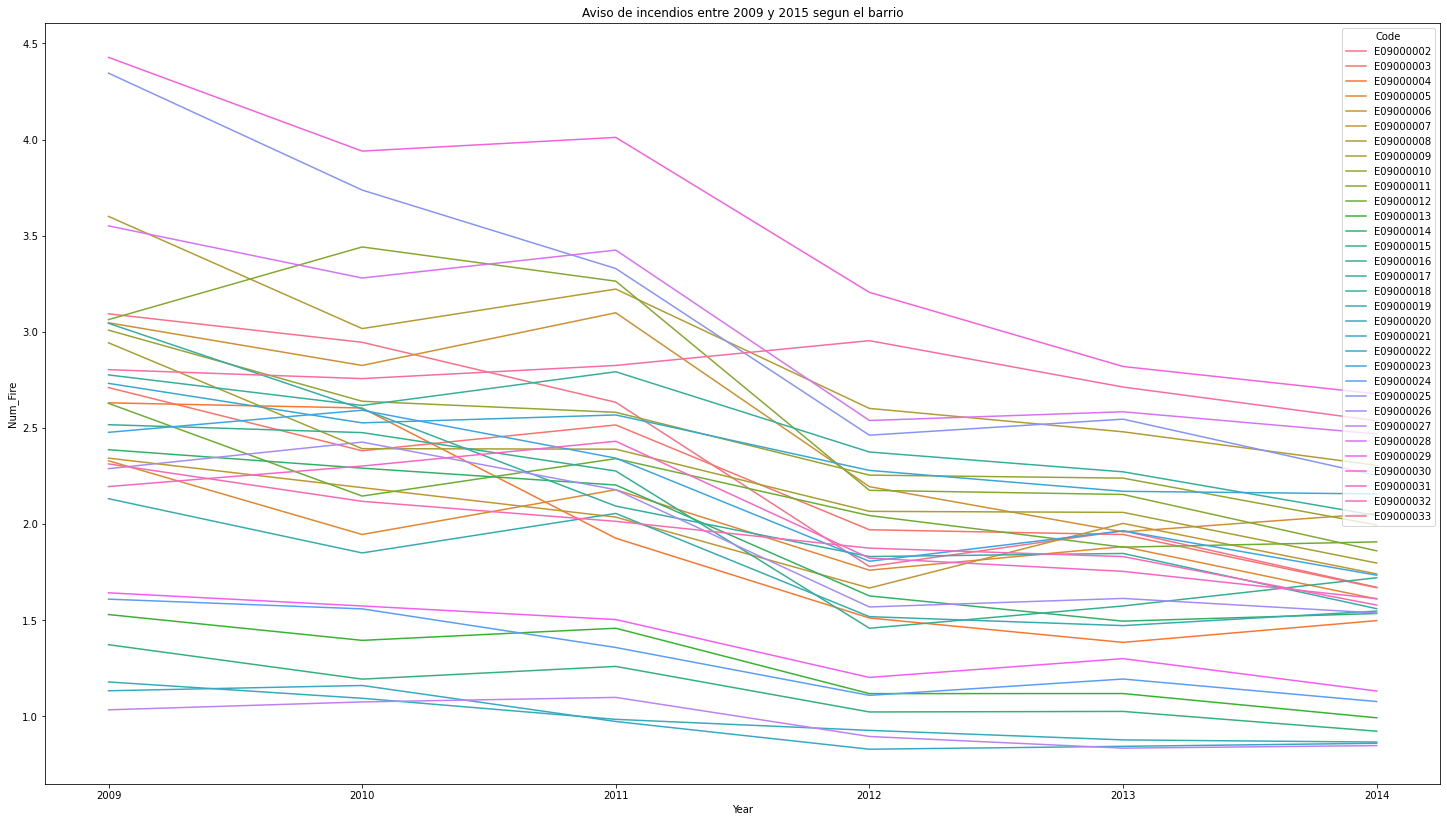

In [ ]:
llamadas_dims = (25, 14)
fig, ax = pyplot.subplots(figsize=llamadas_dims)
plt.title("Aviso de incendios entre 2009 y 2015 segun el barrio")
sns.lineplot(data=llamadas, x="Year", y="Num_Fire", hue="Code",ax=ax,ci=None)


<AxesSubplot:title={'center':'Aviso a los bomberos por otros servicios entre 2009 y 2015 por barrio'}, xlabel='Year', ylabel='Num_Service'>

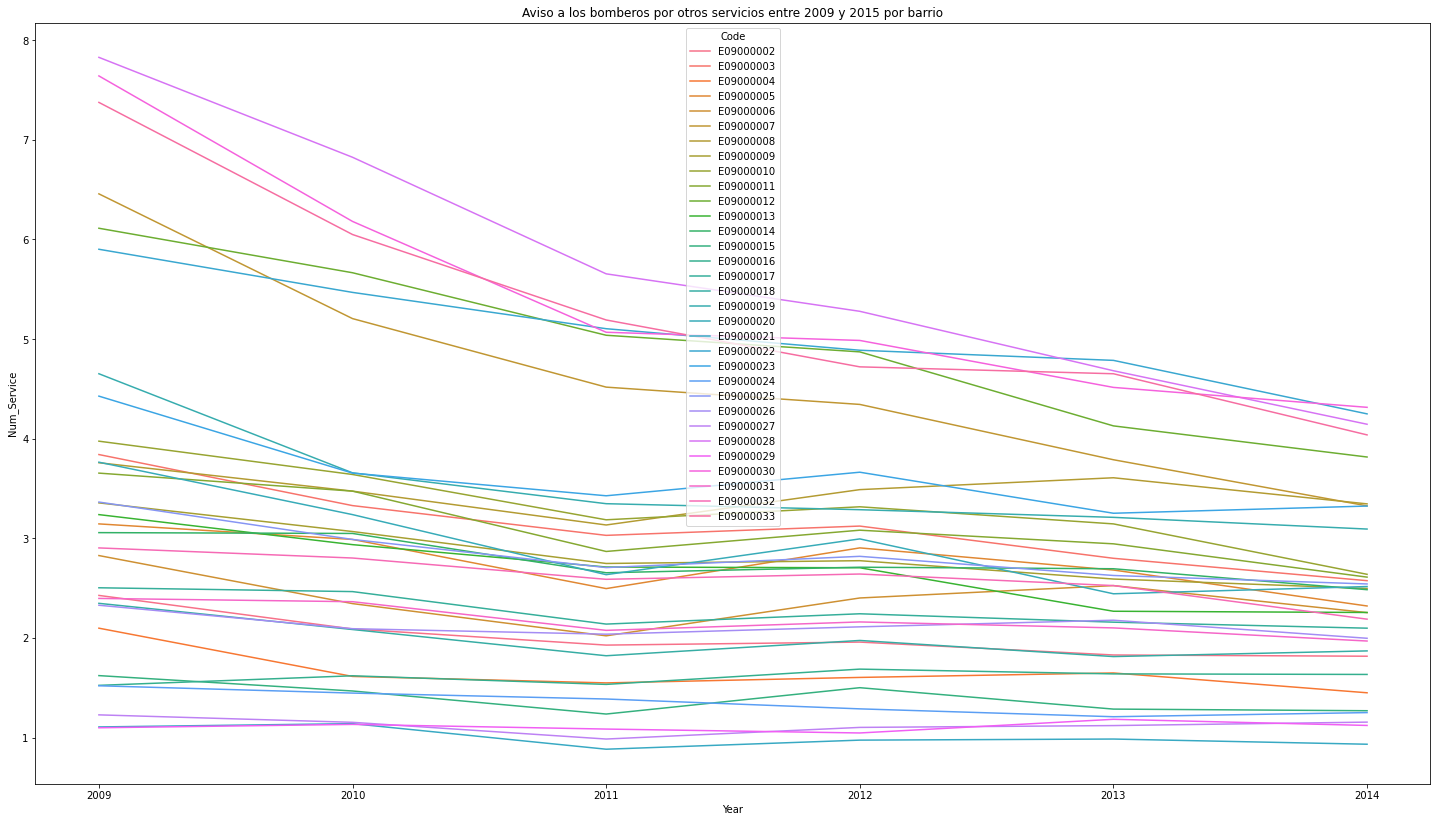

In [ ]:
fig, ax = pyplot.subplots(figsize=llamadas_dims)
plt.title("Aviso a los bomberos por otros servicios entre 2009 y 2015 por barrio")
sns.lineplot(data=llamadas, x="Year", y="Num_Service", hue="Code",ax=ax,ci=None)

<AxesSubplot:title={'center':'Aviso de falsas alarmas a los bomberos entre 2009 y 2015 por barrio'}, xlabel='Year', ylabel='Num_Falsa_A'>

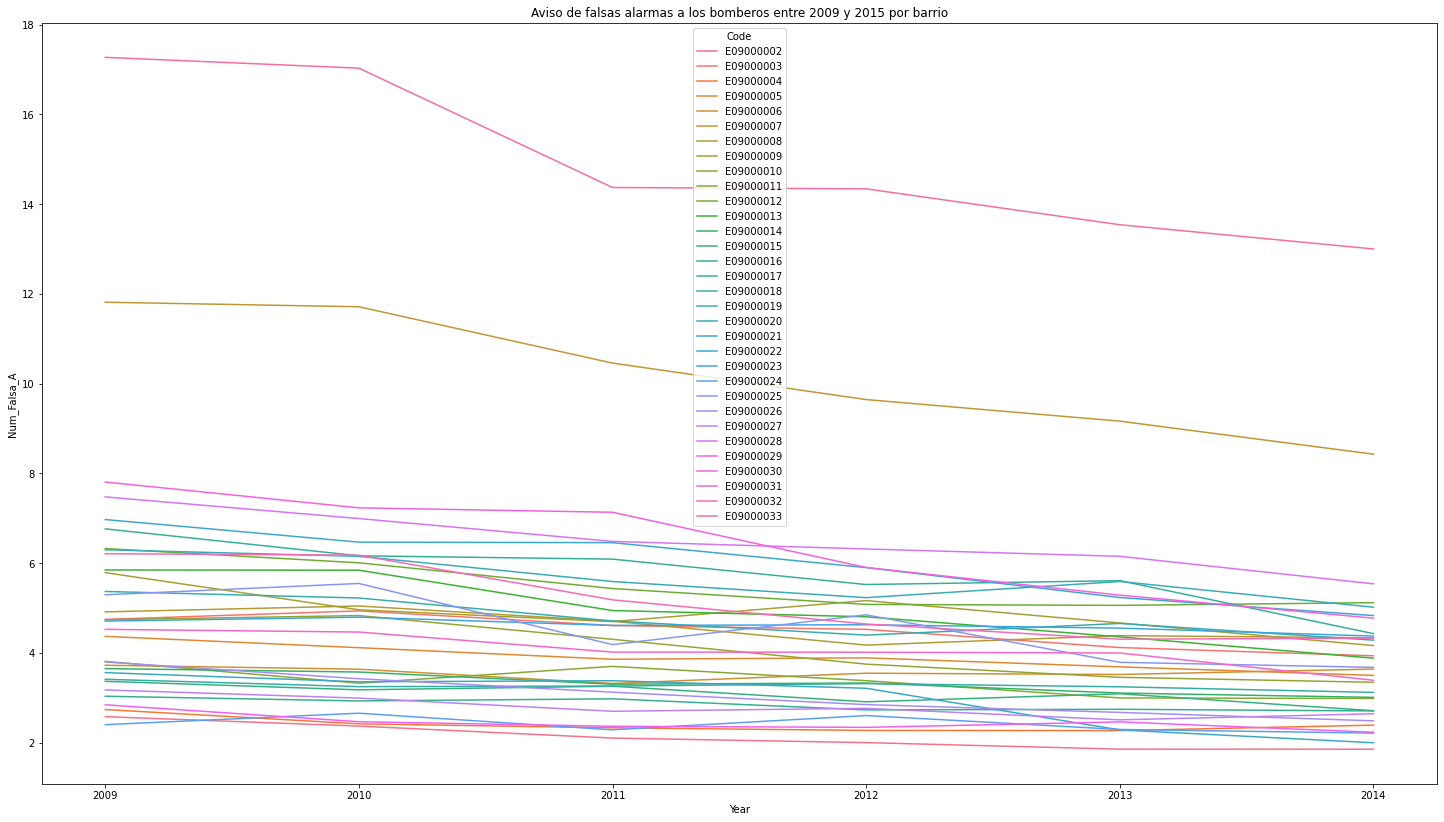

In [ ]:
fig, ax = pyplot.subplots(figsize=llamadas_dims)
plt.title("Aviso de falsas alarmas a los bomberos entre 2009 y 2015 por barrio")
sns.lineplot(data=llamadas, x="Year", y="Num_Falsa_A", hue="Code",ax=ax,ci=None)

## DATASET PRECIO VIVIENDA POR GANACIAS


In [ ]:
#viviendas = pd.read_excel('/gdrive/My Drive/TFM-Roberto_Hernandez/datasets/ratio-house-price-earnings-residence-based.xlsx')
viviendas = pd.read_excel('C:/Users/rhgim/Desktop/tfm/datasets/ratio-house-price-earnings-residence-based.xlsx')

#viviendas_test=pd.read_excel('/gdrive/My Drive/TFM-Roberto_Hernandez/datasets/ratio-house-price-earnings-residence-based.xlsx')
viviendas_test=pd.read_excel('C:/Users/rhgim/Desktop/tfm/datasets/ratio-house-price-earnings-residence-based.xlsx')

viviendas.head()



New Code Old Code                  Area  2002  2003  2004  2005  2006  \
0        NaN      NaN                   NaN   NaN   NaN   NaN   NaN   NaN   
1  E09000001     00AA        City of London  6.29     :     :     :     :   
2  E09000002     00AB  Barking and Dagenham  4.68  6.26  7.18  7.15  6.55   
3  E09000003     00AC                Barnet  7.42  8.49  8.64  8.46  9.12   
4  E09000004     00AD                Bexley  5.56  6.29  6.57  6.73  6.79   

   2007  2008  ...   2011   2012   2013   2014  2015   2016   2017   2018  \
0   NaN   NaN  ...    NaN    NaN    NaN    NaN   NaN    NaN    NaN    NaN   
1     :     :  ...   8.66      :      :      :     :  14.83      :  16.55   
2  7.05  7.46  ...   6.56   6.38   6.28   7.54  8.24   9.89     10  10.40   
3  9.83  9.16  ...  10.06  10.05  10.16  12.14  13.3  14.05   13.7  14.45   
4  7.19  6.97  ...   6.77   6.53   6.68   7.69  8.47   9.44  10.01  10.04   

    2019   2020  
0    NaN    NaN  
1      :      :  
2  10.75   9.63  
3  14.19  15.93  
4   9.61   9.28  

[5 rows x 22 columns]

### ANALISIS DE DATOS

In [ ]:
#descripcionDatosDataset(viviendas)

### LIMPIEZA

In [ ]:
viviendas["Code_true"]= viviendas["New Code"].str.contains('E09', na=False)
viviendas=viviendas.loc[(viviendas["Code_true"]==True)]
viviendas.drop("Code_true", inplace=True, axis=1)




viviendas

New Code Old Code                    Area   2002   2003   2004   2005  \
1   E09000001     00AA          City of London   6.29      :      :      :   
2   E09000002     00AB    Barking and Dagenham   4.68   6.26   7.18   7.15   
3   E09000003     00AC                  Barnet   7.42   8.49   8.64   8.46   
4   E09000004     00AD                  Bexley   5.56   6.29   6.57   6.73   
5   E09000005     00AE                   Brent   8.10   9.32   9.24   9.59   
6   E09000006     00AF                 Bromley   6.48   7.13   7.54   7.45   
7   E09000007     00AG                  Camden   9.71   9.24   10.4  10.29   
8   E09000008     00AH                 Croydon   5.82    6.6   7.23   7.33   
9   E09000009     00AJ                  Ealing   7.09   8.47   8.68   8.96   
10  E09000010     00AK                 Enfield   6.03   7.38   7.31   7.83   
11  E09000011     00AL               Greenwich   5.99   6.37   6.86   7.41   
12  E09000012     00AM                 Hackney   7.37   8.15    8.7   8.25   
13  E09000013     00AN  Hammersmith and Fulham   8.55   9.31   9.83   10.8   
14  E09000014     00AP                Haringey   7.03   7.53    7.8   8.15   
15  E09000015     00AQ                  Harrow   7.59    9.2   9.26   9.29   
16  E09000016     00AR                Havering   5.63   6.54   6.91   6.73   
17  E09000017     00AS              Hillingdon   6.47   7.28   7.56   7.87   
18  E09000018     00AT                Hounslow   7.00   7.92   8.65    8.4   
19  E09000019     00AU               Islington   8.71   8.83   8.67   8.93   
20  E09000020     00AW  Kensington and Chelsea  10.68  10.77  10.04  10.86   
21  E09000021     00AX    Kingston upon Thames   7.16   7.77   8.47   8.38   
22  E09000022     00AY                 Lambeth   8.02   7.59   8.38   8.21   
23  E09000023     00AZ                Lewisham   5.85   6.33   6.57   6.94   
24  E09000024     00BA                  Merton   6.81   7.27    7.9   7.84   
25  E09000025     00BB                  Newham   6.47   7.65   8.27   8.09   
26  E09000026     00BC               Redbridge   6.22   7.08   8.27   7.96   
27  E09000027     00BD    Richmond upon Thames   7.26   7.95   8.35   8.41   
28  E09000028     00BE               Southwark   7.54   7.99   8.44   8.51   
29  E09000029     00BF                  Sutton   6.29   6.67   7.39   7.38   
30  E09000030     00BG           Tower Hamlets   7.81   7.59   7.97   8.35   
31  E09000031     00BH          Waltham Forest   5.69   6.62    7.2   7.55   
32  E09000032     00BJ              Wandsworth   7.52   8.07   8.48   8.59   
33  E09000033     00BK             Westminster  11.01  11.41  10.57   11.3   

     2006   2007   2008  ...   2011   2012   2013   2014   2015   2016   2017  \
1       :      :      :  ...   8.66      :      :      :      :  14.83      :   
2    6.55   7.05   7.46  ...   6.56   6.38   6.28   7.54   8.24   9.89     10   
3    9.12   9.83   9.16  ...  10.06  10.05  10.16  12.14   13.3  14.05   13.7   
4    6.79   7.19   6.97  ...   6.77   6.53   6.68   7.69   8.47   9.44  10.01   
5    9.85   10.8   9.89  ...  11.19  11.13  12.13  12.38  13.43  15.21  15.65   
6    7.54   7.71   7.49  ...   8.06   7.64   7.94   8.92   9.93  10.86  10.83   
7   10.38   11.4  11.97  ...  13.96   13.3  15.15  17.43  17.13  18.53   19.4   
8    7.38   7.96   7.82  ...   7.27   7.41   7.54   7.82   8.98  10.18  10.73   
9    8.88   9.22   9.66  ...   9.42   9.94  10.93  12.28  14.34  14.73  14.88   
10   7.75   8.17   8.44  ...   8.26   8.26   8.43   9.16  10.35  12.16     13   
11    7.7   7.53   7.88  ...   8.17   7.96    8.1  10.09  10.57  11.87  12.67   
12   9.48   9.04   9.06  ...   9.21  10.41  11.42  12.82  14.35  16.67  15.22   
13   10.8  11.67  11.76  ...  13.11  12.48  14.45  16.95  19.27  19.21  19.08   
14    8.1   8.59   9.02  ...   9.96  10.28  11.32  12.56  13.66  14.96  16.08   
15   9.26    9.4    8.8  ...   9.51  10.06   9.76  11.27  11.85  13.29  14.61   
16   7.02   7.52    7.2  ...   7.29   6.88   7.34   7.99

In [ ]:
viviendas_test["Code_true"]= viviendas_test["New Code"].str.contains('E09', na=False)
viviendas_test=viviendas_test.loc[(viviendas_test["Code_true"]==True)]
viviendas_test.drop("Code_true", inplace=True, axis=1)
viviendas_test

New Code Old Code                    Area   2002   2003   2004   2005  \
1   E09000001     00AA          City of London   6.29      :      :      :   
2   E09000002     00AB    Barking and Dagenham   4.68   6.26   7.18   7.15   
3   E09000003     00AC                  Barnet   7.42   8.49   8.64   8.46   
4   E09000004     00AD                  Bexley   5.56   6.29   6.57   6.73   
5   E09000005     00AE                   Brent   8.10   9.32   9.24   9.59   
6   E09000006     00AF                 Bromley   6.48   7.13   7.54   7.45   
7   E09000007     00AG                  Camden   9.71   9.24   10.4  10.29   
8   E09000008     00AH                 Croydon   5.82    6.6   7.23   7.33   
9   E09000009     00AJ                  Ealing   7.09   8.47   8.68   8.96   
10  E09000010     00AK                 Enfield   6.03   7.38   7.31   7.83   
11  E09000011     00AL               Greenwich   5.99   6.37   6.86   7.41   
12  E09000012     00AM                 Hackney   7.37   8.15    8.7   8.25   
13  E09000013     00AN  Hammersmith and Fulham   8.55   9.31   9.83   10.8   
14  E09000014     00AP                Haringey   7.03   7.53    7.8   8.15   
15  E09000015     00AQ                  Harrow   7.59    9.2   9.26   9.29   
16  E09000016     00AR                Havering   5.63   6.54   6.91   6.73   
17  E09000017     00AS              Hillingdon   6.47   7.28   7.56   7.87   
18  E09000018     00AT                Hounslow   7.00   7.92   8.65    8.4   
19  E09000019     00AU               Islington   8.71   8.83   8.67   8.93   
20  E09000020     00AW  Kensington and Chelsea  10.68  10.77  10.04  10.86   
21  E09000021     00AX    Kingston upon Thames   7.16   7.77   8.47   8.38   
22  E09000022     00AY                 Lambeth   8.02   7.59   8.38   8.21   
23  E09000023     00AZ                Lewisham   5.85   6.33   6.57   6.94   
24  E09000024     00BA                  Merton   6.81   7.27    7.9   7.84   
25  E09000025     00BB                  Newham   6.47   7.65   8.27   8.09   
26  E09000026     00BC               Redbridge   6.22   7.08   8.27   7.96   
27  E09000027     00BD    Richmond upon Thames   7.26   7.95   8.35   8.41   
28  E09000028     00BE               Southwark   7.54   7.99   8.44   8.51   
29  E09000029     00BF                  Sutton   6.29   6.67   7.39   7.38   
30  E09000030     00BG           Tower Hamlets   7.81   7.59   7.97   8.35   
31  E09000031     00BH          Waltham Forest   5.69   6.62    7.2   7.55   
32  E09000032     00BJ              Wandsworth   7.52   8.07   8.48   8.59   
33  E09000033     00BK             Westminster  11.01  11.41  10.57   11.3   

     2006   2007   2008  ...   2011   2012   2013   2014   2015   2016   2017  \
1       :      :      :  ...   8.66      :      :      :      :  14.83      :   
2    6.55   7.05   7.46  ...   6.56   6.38   6.28   7.54   8.24   9.89     10   
3    9.12   9.83   9.16  ...  10.06  10.05  10.16  12.14   13.3  14.05   13.7   
4    6.79   7.19   6.97  ...   6.77   6.53   6.68   7.69   8.47   9.44  10.01   
5    9.85   10.8   9.89  ...  11.19  11.13  12.13  12.38  13.43  15.21  15.65   
6    7.54   7.71   7.49  ...   8.06   7.64   7.94   8.92   9.93  10.86  10.83   
7   10.38   11.4  11.97  ...  13.96   13.3  15.15  17.43  17.13  18.53   19.4   
8    7.38   7.96   7.82  ...   7.27   7.41   7.54   7.82   8.98  10.18  10.73   
9    8.88   9.22   9.66  ...   9.42   9.94  10.93  12.28  14.34  14.73  14.88   
10   7.75   8.17   8.44  ...   8.26   8.26   8.43   9.16  10.35  12.16     13   
11    7.7   7.53   7.88  ...   8.17   7.96    8.1  10.09  10.57  11.87  12.67   
12   9.48   9.04   9.06  ...   9.21  10.41  11.42  12.82  14.35  16.67  15.22   
13   10.8  11.67  11.76  ...  13.11  12.48  14.45  16.95  19.27  19.21  19.08   
14    8.1   8.59   9.02  ...   9.96  10.28  11.32  12.56  13.66  14.96  16.08   
15   9.26    9.4    8.8  ...   9.51  10.06   9.76  11.27  11.85  13.29  14.61   
16   7.02   7.52    7.2  ...   7.29   6.88   7.34   7.99

### TRANSFORMACION

Realizamos las transformaciones necesarias para poder unirlo

In [ ]:
#Transformacion de dataset para poder unirlo al principal
viv=pd.DataFrame(columns = ['Code', 'Ingreso_Vivienda', "Year"])
viviendas_tr=pd.DataFrame(columns = ['Code', 'Ingreso_Vivienda',"Year"])
for i in range(1,33):
  viv["Ingreso_Vivienda"]=viviendas.iloc[i,3:22]
  viv["Code"]=viviendas.iloc[i,0]
  viv["Year"]=viviendas.columns[3:22]
  viviendas_tr=pd.concat([viviendas_tr,viv])
viviendas_tr

Code Ingreso_Vivienda  Year
2002  E09000002             4.68  2002
2003  E09000002             6.26  2003
2004  E09000002             7.18  2004
2005  E09000002             7.15  2005
2006  E09000002             6.55  2006
...         ...              ...   ...
2016  E09000033            23.48  2016
2017  E09000033            24.36  2017
2018  E09000033            23.66  2018
2019  E09000033             21.6  2019
2020  E09000033            22.41  2020

[608 rows x 3 columns]

In [ ]:
#Transformacion de dataset para poder unirlo al principal
viv_test=pd.DataFrame(columns = ['Code', 'Ingreso_Vivienda', "Year"])
viviendas_test_tr=pd.DataFrame(columns = ['Code', 'Ingreso_Vivienda',"Year"])
for i in range(1,33):
  viv_test["Ingreso_Vivienda"]=viviendas_test.iloc[i,3:22]
  viv_test["Code"]=viviendas_test.iloc[i,0]
  viv_test["Year"]=viviendas_test.columns[3:22]
  viviendas_test_tr=pd.concat([viviendas_test_tr,viv_test])
viviendas_test_tr

Code Ingreso_Vivienda  Year
2002  E09000002             4.68  2002
2003  E09000002             6.26  2003
2004  E09000002             7.18  2004
2005  E09000002             7.15  2005
2006  E09000002             6.55  2006
...         ...              ...   ...
2016  E09000033            23.48  2016
2017  E09000033            24.36  2017
2018  E09000033            23.66  2018
2019  E09000033             21.6  2019
2020  E09000033            22.41  2020

[608 rows x 3 columns]

In [ ]:
viviendas_tr= viviendas_tr.loc[(viviendas_tr["Year"]>=2009)&(viviendas_tr["Year"]<=2014)]

viviendas_test_tr= viviendas_test_tr.loc[(viviendas_test_tr["Year"]>=2015)&(viviendas_test_tr["Year"]<=2015)]

In [ ]:
viviendas_tr["Code"]=viviendas_tr["Code"].astype("string")
viviendas_tr["Year"]=viviendas_tr["Year"].astype(int)
viviendas_tr["Ingreso_Vivienda"]=viviendas_tr["Ingreso_Vivienda"].astype(int)

viviendas_test_tr["Code"]=viviendas_test_tr["Code"].astype("string")
viviendas_test_tr["Year"]=viviendas_test_tr["Year"].astype(int)
viviendas_test_tr["Ingreso_Vivienda"]=viviendas_test_tr["Ingreso_Vivienda"].astype(int)



<ipython-input-48-f9a934fc1578>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  viviendas_tr["Code"]=viviendas_tr["Code"].astype("string")
<ipython-input-48-f9a934fc1578>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  viviendas_tr["Year"]=viviendas_tr["Year"].astype(int)
<ipython-input-48-f9a934fc1578>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

### VISUALIZACION

<AxesSubplot:title={'center':'Ratio per capita / valor vivenda '}, xlabel='Year', ylabel='Ingreso_Vivienda'>

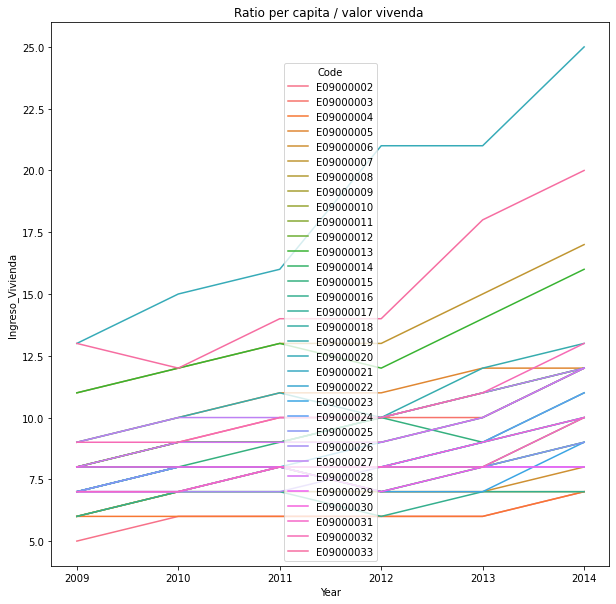

In [ ]:
a4_dims = (10, 10)
fig, ax = pyplot.subplots(figsize=a4_dims)
plt.title("Ratio per capita / valor vivenda ")
sns.lineplot(data=viviendas_tr, x="Year", y="Ingreso_Vivienda", hue="Code",ax=ax)


## DATASET DENSIDAD POBLACION

In [ ]:
#densidad = pd.read_csv('/gdrive/My Drive/TFM-Roberto_Hernandez/datasets/housing-density-borough.csv')
densidad = pd.read_csv('C:/Users/rhgim/Desktop/tfm/datasets/housing-density-borough.csv')
#densidad_test=pd.read_csv('/gdrive/My Drive/TFM-Roberto_Hernandez/datasets/housing-density-borough.csv')
densidad_test=pd.read_csv('C:/Users/rhgim/Desktop/tfm/datasets/housing-density-borough.csv')

densidad

Code            Name  Year                      Source  Population  \
0     E09000001  City of London  1999                     ONS MYE        6581   
1     E09000001  City of London  2000                     ONS MYE        7014   
2     E09000001  City of London  2001                     ONS MYE        7359   
3     E09000001  City of London  2002                     ONS MYE        7280   
4     E09000001  City of London  2003                     ONS MYE        7115   
...         ...             ...   ...                         ...         ...   
1867  E13000002    Outer London  2046  GLA Population Projections     6573194   
1868  E13000002    Outer London  2047  GLA Population Projections     6598789   
1869  E13000002    Outer London  2048  GLA Population Projections     6622921   
1870  E13000002    Outer London  2049  GLA Population Projections     6647527   
1871  E13000002    Outer London  2050  GLA Population Projections     6671295   

      Inland_Area _Hectares  Total_Area_Hectares  Population_per_hectare  \
0                     290.4                314.9                    22.7   
1                     290.4                314.9                    24.2   
2                     290.4                314.9                    25.3   
3                     290.4                314.9                    25.1   
4                     290.4                314.9                    24.5   
...                     ...                  ...                     ...   
1867               125423.6             126675.6                    52.4   
1868               125423.6             126675.6                    52.6   
1869               125423.6             126675.6                    52.8   
1870               125423.6             126675.6                    53.0   
1871               125423.6             126675.6                    53.2   

      Square_Kilometres  Population_per_square_kilometre  
0                   2.9                           2266.2  
1                   2.9                           2415.3  
2                   2.9                           2534.1  
3                   2.9                           2506.9  
4                   2.9                           2450.1  
...                 ...                              ...  
1867             1254.2                           5240.8  
1868             1254.2                           5261.2  
1869             1254.2                           5280.4  
1870             1254.2                           5300.1  
1871             1254.2                           5319.0  

[1872 rows x 10 columns]

### ANALISIS DE DATOS

In [ ]:
descripcionDatosDataset(densidad)

Cantidad de filas: 1872
Cantidad de columnas: 10
----------------------------------------------------------------------------------------------------
Columna: Code
Tipo de datos: nominal
Descripción de valores:
-- Valores presentes (10 primeros): ['E09000001' 'E09000002' 'E09000003' 'E09000004' 'E09000005' 'E09000006'
 'E09000007' 'E09000008' 'E09000009' 'E09000010']
-- Cantidad de nulos: 0 = 0.00%
----------------------------------------------------------------------------------------------------
Columna: Name
Tipo de datos: nominal
Descripción de valores:
-- Valores presentes (10 primeros): ['City of London' 'Barking and Dagenham' 'Barnet' 'Bexley' 'Brent'
 'Bromley' 'Camden' 'Croydon' 'Ealing' 'Enfield']
-- Cantidad de nulos: 0 = 0.00%
----------------------------------------------------------------------------------------------------
Columna: Year
Tipo de datos: numérico
Descripción de valores:
min       1999.000000
max       2050.000000
mean      2024.500000
std         15.012341


### LIMPIEZA

In [ ]:
col_eliminar_densidad=["Name","Source","Inland_Area _Hectares", "Total_Area_Hectares", "Population_per_hectare", "Population_per_square_kilometre"]
densidad.drop(col_eliminar_densidad, inplace=True, axis=1)

densidad_test.drop(col_eliminar_densidad, inplace=True, axis=1)

densidad

Code  Year  Population  Square_Kilometres
0     E09000001  1999        6581                2.9
1     E09000001  2000        7014                2.9
2     E09000001  2001        7359                2.9
3     E09000001  2002        7280                2.9
4     E09000001  2003        7115                2.9
...         ...   ...         ...                ...
1867  E13000002  2046     6573194             1254.2
1868  E13000002  2047     6598789             1254.2
1869  E13000002  2048     6622921             1254.2
1870  E13000002  2049     6647527             1254.2
1871  E13000002  2050     6671295             1254.2

[1872 rows x 4 columns]

In [ ]:
densidad["Code"]=densidad["Code"].astype("string")
densidad["Year"]=densidad["Year"].astype(int)
densidad["Population"]=densidad["Population"].astype(int)
densidad["Square_Kilometres"]=densidad["Square_Kilometres"].astype(int)
densidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1872 entries, 0 to 1871
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Code               1872 non-null   string
 1   Year               1872 non-null   int32 
 2   Population         1872 non-null   int32 
 3   Square_Kilometres  1872 non-null   int32 
dtypes: int32(3), string(1)
memory usage: 36.7 KB


In [ ]:
densidad_test["Code"]=densidad_test["Code"].astype("string")
densidad_test["Year"]=densidad_test["Year"].astype(int)
densidad_test["Population"]=densidad_test["Population"].astype(int)
densidad_test["Square_Kilometres"]=densidad_test["Square_Kilometres"].astype(int)
densidad_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1872 entries, 0 to 1871
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Code               1872 non-null   string
 1   Year               1872 non-null   int32 
 2   Population         1872 non-null   int32 
 3   Square_Kilometres  1872 non-null   int32 
dtypes: int32(3), string(1)
memory usage: 36.7 KB


In [ ]:
#Renombramos las columnas para poder hacer las uniones entre los distintos datasets
densidad=densidad.rename(columns={"Population":"Poblacion", "Square_Kilometres":"Area_m2"})

densidad_test=densidad_test.rename(columns={"Population":"Poblacion", "Square_Kilometres":"Area_m2"})

densidad

Code  Year  Poblacion  Area_m2
0     E09000001  1999       6581        2
1     E09000001  2000       7014        2
2     E09000001  2001       7359        2
3     E09000001  2002       7280        2
4     E09000001  2003       7115        2
...         ...   ...        ...      ...
1867  E13000002  2046    6573194     1254
1868  E13000002  2047    6598789     1254
1869  E13000002  2048    6622921     1254
1870  E13000002  2049    6647527     1254
1871  E13000002  2050    6671295     1254

[1872 rows x 4 columns]

In [ ]:
#Atributo code
densidad["Code"].unique()   

<StringArray>
['E09000001', 'E09000002', 'E09000003', 'E09000004', 'E09000005', 'E09000006',
 'E09000007', 'E09000008', 'E09000009', 'E09000010', 'E09000011', 'E09000012',
 'E09000013', 'E09000014', 'E09000015', 'E09000016', 'E09000017', 'E09000018',
 'E09000019', 'E09000020', 'E09000021', 'E09000022', 'E09000023', 'E09000024',
 'E09000025', 'E09000026', 'E09000027', 'E09000028', 'E09000029', 'E09000030',
 'E09000031', 'E09000032', 'E09000033', 'E12000007', 'E13000001', 'E13000002']
Length: 36, dtype: string

In [ ]:
densidad["Code_true"]= densidad["Code"].str.contains('E09', na=False)
densidad=densidad.loc[(densidad["Code_true"]==True)]
densidad.drop("Code_true", inplace=True, axis=1)

densidad_test["Code_true"]= densidad_test["Code"].str.contains('E09', na=False)
densidad_test=densidad_test.loc[(densidad_test["Code_true"]==True)]
densidad_test.drop("Code_true", inplace=True, axis=1)

densidad["Code"].unique() 

C:\Users\rhgim\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<StringArray>
['E09000001', 'E09000002', 'E09000003', 'E09000004', 'E09000005', 'E09000006',
 'E09000007', 'E09000008', 'E09000009', 'E09000010', 'E09000011', 'E09000012',
 'E09000013', 'E09000014', 'E09000015', 'E09000016', 'E09000017', 'E09000018',
 'E09000019', 'E09000020', 'E09000021', 'E09000022', 'E09000023', 'E09000024',
 'E09000025', 'E09000026', 'E09000027', 'E09000028', 'E09000029', 'E09000030',
 'E09000031', 'E09000032', 'E09000033']
Length: 33, dtype: string

In [ ]:
densidad=densidad.loc[(densidad["Code"]!="E09000001")]

densidad_test=densidad_test.loc[(densidad_test["Code"]!="E09000001")]

In [ ]:
densidad["Year"].unique()

array([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031,
       2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042,
       2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050])

In [ ]:
densidad=densidad.loc[(densidad["Year"]<=2014)&(densidad["Year"]>=2009)]

densidad_test=densidad_test.loc[(densidad_test["Year"]<=2015)&(densidad_test["Year"]>=2015)]


### VISUALIZACION

<AxesSubplot:xlabel='Year', ylabel='Poblacion'>

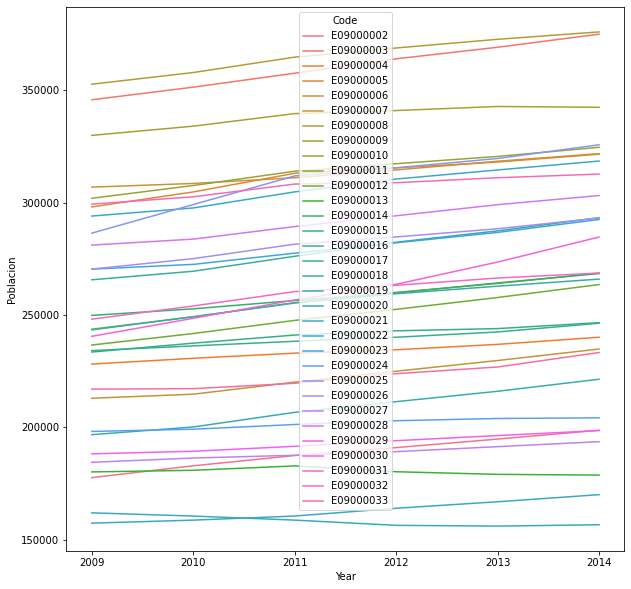

In [ ]:
a4_dims = (10, 10)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.lineplot(data=densidad, x="Year", y="Poblacion", hue="Code",ax=ax)

## DATASET CRIMENES

In [ ]:
#crimenes = pd.read_csv('/gdrive/My Drive/TFM-Roberto_Hernandez/datasets/crime-rates.csv')
crimenes = pd.read_csv('C:/Users/rhgim/Desktop/tfm/datasets/crime-rates.csv')

#crimenes_test=pd.read_csv('/gdrive/My Drive/TFM-Roberto_Hernandez/datasets/crime-rates.csv')
crimenes_test=pd.read_csv('C:/Users/rhgim/Desktop/tfm/datasets/crime-rates.csv')

crimenes_test
crimenes

Code               Borough     Year                   Offences  \
0     E09000002  Barking and Dagenham  1999-00      All recorded offences   
1     E09000003                Barnet  1999-00      All recorded offences   
2     E09000004                Bexley  1999-00      All recorded offences   
3     E09000005                 Brent  1999-00      All recorded offences   
4     E09000006               Bromley  1999-00      All recorded offences   
...         ...                   ...      ...                        ...   
6655        NaN              Heathrow  2016-17  Other Notifiable Offences   
6656  E13000001          Inner London  2016-17  Other Notifiable Offences   
6657  E13000002          Outer London  2016-17  Other Notifiable Offences   
6658  E12000007       Met Police Area  2016-17  Other Notifiable Offences   
6659        727     England and Wales  2016-17  Other Notifiable Offences   

       Rate Number_of_offences  
0     120.5             19,567  
1      98.0             30,708  
2      95.1             20,680  
3     127.7             33,253  
4      89.8             26,474  
...     ...                ...  
6655    NaN              1,081  
6656    1.7              6,041  
6657    1.3              6,637  
6658    1.6             13,759  
6659    NaN                NaN  

[6660 rows x 6 columns]

In [ ]:
crimenes["Offences"].unique()

array(['All recorded offences', 'Violence Against the Person',
       'Sexual Offences', 'Robbery', 'Burglary', 'Theft and Handling',
       'Fraud or Forgery', 'Criminal Damage', 'Drugs',
       'Other Notifiable Offences'], dtype=object)

### ANALISIS DE DATOS

In [ ]:
descripcionDatosDataset(crimenes)

Cantidad de filas: 6660
Cantidad de columnas: 6
----------------------------------------------------------------------------------------------------
Columna: Code
Tipo de datos: nominal
Descripción de valores:
-- Valores presentes (10 primeros): ['E09000002' 'E09000003' 'E09000004' 'E09000005' 'E09000006' 'E09000007'
 'E09000008' 'E09000009' 'E09000010' 'E09000011']
-- Cantidad de nulos: 180 = 2.70%
----------------------------------------------------------------------------------------------------
Columna: Borough
Tipo de datos: nominal
Descripción de valores:
-- Valores presentes (10 primeros): ['Barking and Dagenham' 'Barnet' 'Bexley' 'Brent' 'Bromley' 'Camden'
 'Croydon' 'Ealing' 'Enfield' 'Greenwich']
-- Cantidad de nulos: 0 = 0.00%
----------------------------------------------------------------------------------------------------
Columna: Year
Tipo de datos: nominal
Descripción de valores:
-- Valores presentes (10 primeros): ['1999-00' '2000-01' '2001-02' '2002-03' '2003-04' '20

### LIMPIEZA

In [ ]:
crimenes["Number_of_offences"]=crimenes["Number_of_offences"].str.replace(",","")

crimenes_test["Number_of_offences"]=crimenes_test["Number_of_offences"].str.replace(",","")

In [ ]:
col_eliminar_crimenes=["Borough", "Rate"]
crimenes.drop(col_eliminar_crimenes, inplace=True, axis=1)

crimenes_test.drop(col_eliminar_crimenes, inplace=True, axis=1)

crimenes

Code     Year                   Offences Number_of_offences
0     E09000002  1999-00      All recorded offences              19567
1     E09000003  1999-00      All recorded offences              30708
2     E09000004  1999-00      All recorded offences              20680
3     E09000005  1999-00      All recorded offences              33253
4     E09000006  1999-00      All recorded offences              26474
...         ...      ...                        ...                ...
6655        NaN  2016-17  Other Notifiable Offences               1081
6656  E13000001  2016-17  Other Notifiable Offences               6041
6657  E13000002  2016-17  Other Notifiable Offences               6637
6658  E12000007  2016-17  Other Notifiable Offences              13759
6659        727  2016-17  Other Notifiable Offences                NaN

[6660 rows x 4 columns]

In [ ]:
#Creamos un dataset por cada tipo de crimen
#Violencia
crimenes_violence=crimenes.loc[crimenes["Offences"]=="Violence Against the Person"]
crimenes_violence=crimenes_violence.rename(columns={"Number_of_offences": "Crim_Violencia"})
crimenes_violence.drop("Offences", inplace=True, axis=1)

#Sexual
crimenes_sexual=crimenes.loc[crimenes["Offences"]=="Sexual Offences"]
crimenes_sexual=crimenes_sexual.rename(columns={"Number_of_offences": "Crim_Sexual"})
crimenes_sexual.drop("Offences", inplace=True, axis=1)

#Robos
crimenes_robbery=crimenes.loc[crimenes["Offences"]=="Robbery"]
crimenes_robbery=crimenes_robbery.rename(columns={"Number_of_offences": "Crim_Robos"})
crimenes_robbery.drop("Offences", inplace=True, axis=1)

#Robos en casas
crimenes_burglary=crimenes.loc[crimenes["Offences"]=="Burglary"]
crimenes_burglary=crimenes_burglary.rename(columns={"Number_of_offences": "Crim_Robos_casas"})
crimenes_burglary.drop("Offences", inplace=True, axis=1)

#ladrones
crimenes_theft=crimenes.loc[crimenes["Offences"]=="Theft and Handling"]
crimenes_theft=crimenes_theft.rename(columns={"Number_of_offences": "Crim_ladrones"})
crimenes_theft.drop("Offences", inplace=True, axis=1)

#Fraudes
crimenes_fraud=crimenes.loc[crimenes["Offences"]=="Fraud or Forgery"]
crimenes_fraud=crimenes_fraud.rename(columns={"Number_of_offences": "Crim_Fraude"})
crimenes_fraud.drop("Offences", inplace=True, axis=1)

#Danyos
crimenes_damage=crimenes.loc[crimenes["Offences"]=="Criminal Damage"]
crimenes_damage=crimenes_damage.rename(columns={"Number_of_offences": "Crim_Danyo"})
crimenes_damage.drop("Offences", inplace=True, axis=1)

#Drogas
crimenes_drugs=crimenes.loc[crimenes["Offences"]=="Drugs"]
crimenes_drugs=crimenes_drugs.rename(columns={"Number_of_offences": "Crim_Drogas"})
crimenes_drugs.drop("Offences", inplace=True, axis=1)

#Otros
crimenes_other=crimenes.loc[crimenes["Offences"]=="Other Notifiable Offences"]
crimenes_other=crimenes_other.rename(columns={"Number_of_offences": "Crim_Otros"})
crimenes_other.drop("Offences", inplace=True, axis=1)


In [ ]:
#Creamos un dataset por cada tipo de crimen
#Violencia
crimenes_violence_test=crimenes_test.loc[crimenes_test["Offences"]=="Violence Against the Person"]
crimenes_violence_test=crimenes_violence_test.rename(columns={"Number_of_offences": "Crim_Violencia"})
crimenes_violence_test.drop("Offences", inplace=True, axis=1)

#Sexual
crimenes_sexual_test=crimenes_test.loc[crimenes_test["Offences"]=="Sexual Offences"]
crimenes_sexual_test=crimenes_sexual_test.rename(columns={"Number_of_offences": "Crim_Sexual"})
crimenes_sexual_test.drop("Offences", inplace=True, axis=1)

#Robos
crimenes_robbery_test=crimenes_test.loc[crimenes_test["Offences"]=="Robbery"]
crimenes_robbery_test=crimenes_robbery_test.rename(columns={"Number_of_offences": "Crim_Robos"})
crimenes_robbery_test.drop("Offences", inplace=True, axis=1)

#Robos en casas
crimenes_burglary_test=crimenes_test.loc[crimenes_test["Offences"]=="Burglary"]
crimenes_burglary_test=crimenes_burglary_test.rename(columns={"Number_of_offences": "Crim_Robos_casas"})
crimenes_burglary_test.drop("Offences", inplace=True, axis=1)

#ladrones
crimenes_theft_test=crimenes_test.loc[crimenes_test["Offences"]=="Theft and Handling"]
crimenes_theft_test=crimenes_theft_test.rename(columns={"Number_of_offences": "Crim_ladrones"})
crimenes_theft_test.drop("Offences", inplace=True, axis=1)

#Fraudes
crimenes_fraud_test=crimenes_test.loc[crimenes_test["Offences"]=="Fraud or Forgery"]
crimenes_fraud_test=crimenes_fraud_test.rename(columns={"Number_of_offences": "Crim_Fraude"})
crimenes_fraud_test.drop("Offences", inplace=True, axis=1)

#Danyos
crimenes_damage_test=crimenes_test.loc[crimenes_test["Offences"]=="Criminal Damage"]
crimenes_damage_test=crimenes_damage_test.rename(columns={"Number_of_offences": "Crim_Danyo"})
crimenes_damage_test.drop("Offences", inplace=True, axis=1)

#Drogas
crimenes_drugs_test=crimenes_test.loc[crimenes["Offences"]=="Drugs"]
crimenes_drugs_test=crimenes_drugs_test.rename(columns={"Number_of_offences": "Crim_Drogas"})
crimenes_drugs_test.drop("Offences", inplace=True, axis=1)

#Otros
crimenes_other_test=crimenes_test.loc[crimenes_test["Offences"]=="Other Notifiable Offences"]
crimenes_other_test=crimenes_other_test.rename(columns={"Number_of_offences": "Crim_Otros"})
crimenes_other_test.drop("Offences", inplace=True, axis=1)

### UNION DATASET CRIMENES

In [ ]:
dfs = [crimenes_violence,crimenes_sexual,crimenes_robbery, crimenes_burglary,crimenes_theft,crimenes_fraud,crimenes_damage,crimenes_drugs,crimenes_other]
crimenes_total = reduce(lambda left,right: pd.merge(left,right, how="outer"), dfs)


dfs_test = [crimenes_violence_test,crimenes_sexual_test,crimenes_robbery_test, crimenes_burglary_test,crimenes_theft_test,crimenes_fraud_test,crimenes_damage_test,crimenes_drugs_test,crimenes_other_test]
crimenes_total_test = reduce(lambda left,right: pd.merge(left,right, how="outer"), dfs_test)

crimenes_total

Code     Year Crim_Violencia Crim_Sexual Crim_Robos  \
0    E09000002  1999-00           3210         186        514   
1    E09000003  1999-00           4244         244        876   
2    E09000004  1999-00           3151         155        289   
3    E09000005  1999-00           5407         337       2014   
4    E09000006  1999-00           3224         166        518   
..         ...      ...            ...         ...        ...   
661        NaN  2016-17            269         784       1553   
662  E13000001  2016-17          93353        5581       7056   
663  E13000002  2016-17         104389        8274      11053   
664  E12000007  2016-17         198011       14639      19662   
665        727  2016-17            NaN         NaN        NaN   

    Crim_Robos_casas Crim_ladrones Crim_Fraude Crim_Danyo Crim_Drogas  \
0               2563          6624        2193       3666         444   
1               4550         10999        3918       5110         494   
2               2951          7846        1339       4390         375   
3               4560         10388        4952       4272         969   
4               3652         10866        2026       5283         525   
..               ...           ...         ...        ...         ...   
661               11          1262          22         57          66   
662            26255        140205         469      23094       17221   
663            30814        112295         464      31112       13881   
664            57080        253762         955      54263       31168   
665              NaN           NaN         NaN        NaN         NaN   

    Crim_Otros  
0          167  
1          273  
2          184  
3          354  
4          214  
..         ...  
661       1081  
662       6041  
663       6637  
664      13759  
665        NaN  

[666 rows x 11 columns]

In [ ]:
crimenes_total=crimenes_total.loc[(crimenes_total["Code"]!="E09000001")]

crimenes_total_test=crimenes_total_test.loc[(crimenes_total_test["Code"]!="E09000001")]

crimenes_total["Code"].unique()

array(['E09000002', 'E09000003', 'E09000004', 'E09000005', 'E09000006',
       'E09000007', 'E09000008', 'E09000009', 'E09000010', 'E09000011',
       'E09000012', 'E09000013', 'E09000014', 'E09000015', 'E09000016',
       'E09000017', 'E09000018', 'E09000019', 'E09000020', 'E09000021',
       'E09000022', 'E09000023', 'E09000024', 'E09000025', 'E09000026',
       'E09000027', 'E09000028', 'E09000029', 'E09000030', 'E09000031',
       'E09000032', 'E09000033', nan, 'E13000001', 'E13000002',
       'E12000007', '727'], dtype=object)

In [ ]:
crimenes_total["Code_true"]= crimenes_total["Code"].str.contains('E09', na=False)
crimenes_total=crimenes_total.loc[(crimenes_total["Code_true"]==True)]
crimenes_total.drop("Code_true", inplace=True, axis=1)

crimenes_total_test["Code_true"]= crimenes_total_test["Code"].str.contains('E09', na=False)
crimenes_total_test=crimenes_total_test.loc[(crimenes_total_test["Code_true"]==True)]
crimenes_total_test.drop("Code_true", inplace=True, axis=1)
crimenes_total_test["Code"].unique() 


crimenes_total["Code"].unique() 

array(['E09000002', 'E09000003', 'E09000004', 'E09000005', 'E09000006',
       'E09000007', 'E09000008', 'E09000009', 'E09000010', 'E09000011',
       'E09000012', 'E09000013', 'E09000014', 'E09000015', 'E09000016',
       'E09000017', 'E09000018', 'E09000019', 'E09000020', 'E09000021',
       'E09000022', 'E09000023', 'E09000024', 'E09000025', 'E09000026',
       'E09000027', 'E09000028', 'E09000029', 'E09000030', 'E09000031',
       'E09000032', 'E09000033'], dtype=object)

In [ ]:
#Cambio el formato de la fercha de los crimenes solo no interesa el anyo
crimenes_total["Year"]=crimenes_total["Year"].map(lambda x: str(x)[:-3])

crimenes_total_test["Year"]=crimenes_total_test["Year"].map(lambda x: str(x)[:-3])

crimenes_total["Year"]

0      1999
1      1999
2      1999
3      1999
4      1999
       ... 
656    2016
657    2016
658    2016
659    2016
660    2016
Name: Year, Length: 576, dtype: object

In [ ]:
crimenes_total["Year"]=crimenes_total["Year"].astype(int)
crimenes_total=crimenes_total.loc[(crimenes_total["Year"]<=2014) & (crimenes_total["Year"]>=2009)]

crimenes_total_test["Year"]=crimenes_total_test["Year"].astype(int)
crimenes_total_test=crimenes_total_test.loc[(crimenes_total_test["Year"]<=2015) & (crimenes_total_test["Year"]>=2015)]


In [ ]:
crimenes_total["Code"]=crimenes_total["Code"].astype("string")
crimenes_total["Crim_Violencia"]=crimenes_total["Crim_Violencia"].astype(int)
crimenes_total["Crim_Sexual"]=crimenes_total["Crim_Sexual"].astype(int)
crimenes_total["Crim_Robos"]=crimenes_total["Crim_Robos"].astype(int)
crimenes_total["Crim_ladrones"]=crimenes_total["Crim_ladrones"].astype(int)
crimenes_total["Crim_Robos_casas"]=crimenes_total["Crim_Robos_casas"].astype(int)
crimenes_total["Crim_Fraude"]=crimenes_total["Crim_Fraude"].astype(int)
crimenes_total["Crim_Danyo"]=crimenes_total["Crim_Danyo"].astype(int)
crimenes_total["Crim_Drogas"]=crimenes_total["Crim_Drogas"].astype(int)
crimenes_total["Crim_Otros"]=crimenes_total["Crim_Otros"].astype(int)

crimenes_total_test["Code"]=crimenes_total_test["Code"].astype("string")
crimenes_total_test["Crim_Violencia"]=crimenes_total_test["Crim_Violencia"].astype(int)
crimenes_total_test["Crim_Sexual"]=crimenes_total_test["Crim_Sexual"].astype(int)
crimenes_total_test["Crim_Robos"]=crimenes_total_test["Crim_Robos"].astype(int)
crimenes_total_test["Crim_ladrones"]=crimenes_total_test["Crim_ladrones"].astype(int)
crimenes_total_test["Crim_Robos_casas"]=crimenes_total_test["Crim_Robos_casas"].astype(int)
crimenes_total_test["Crim_Fraude"]=crimenes_total_test["Crim_Fraude"].astype(int)
crimenes_total_test["Crim_Danyo"]=crimenes_total_test["Crim_Danyo"].astype(int)
crimenes_total_test["Crim_Drogas"]=crimenes_total_test["Crim_Drogas"].astype(int)
crimenes_total_test["Crim_Otros"]=crimenes_total_test["Crim_Otros"].astype(int)


crimenes_total.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 370 to 586
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Code              192 non-null    string
 1   Year              192 non-null    int32 
 2   Crim_Violencia    192 non-null    int32 
 3   Crim_Sexual       192 non-null    int32 
 4   Crim_Robos        192 non-null    int32 
 5   Crim_Robos_casas  192 non-null    int32 
 6   Crim_ladrones     192 non-null    int32 
 7   Crim_Fraude       192 non-null    int32 
 8   Crim_Danyo        192 non-null    int32 
 9   Crim_Drogas       192 non-null    int32 
 10  Crim_Otros        192 non-null    int32 
dtypes: int32(10), string(1)
memory usage: 10.5 KB


In [ ]:
crimenes_total["Code_true"]= crimenes_total["Code"].str.contains('E09', na=False)
crimenes_total=crimenes_total.loc[(crimenes_total["Code_true"]==True)]
crimenes_total.drop("Code_true", inplace=True, axis=1)

crimenes_total_test["Code_true"]= crimenes_total_test["Code"].str.contains('E09', na=False)
crimenes_total_test=crimenes_total_test.loc[(crimenes_total_test["Code_true"]==True)]
crimenes_total_test.drop("Code_true", inplace=True, axis=1)
crimenes_total_test["Code"].unique()   

crimenes_total["Code"].unique()   

<StringArray>
['E09000002', 'E09000003', 'E09000004', 'E09000005', 'E09000006', 'E09000007',
 'E09000008', 'E09000009', 'E09000010', 'E09000011', 'E09000012', 'E09000013',
 'E09000014', 'E09000015', 'E09000016', 'E09000017', 'E09000018', 'E09000019',
 'E09000020', 'E09000021', 'E09000022', 'E09000023', 'E09000024', 'E09000025',
 'E09000026', 'E09000027', 'E09000028', 'E09000029', 'E09000030', 'E09000031',
 'E09000032', 'E09000033']
Length: 32, dtype: string

### VISUALIZACION

<AxesSubplot:title={'center':'Crimenes 2009-2015'}, ylabel='None'>

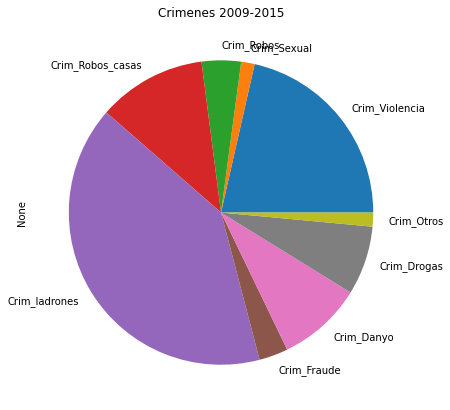

In [ ]:
a4_dims = (7, 7)
fig, ax = pyplot.subplots(figsize=a4_dims)
crimenes_total[crimenes_total.columns[2:]].sum().plot.pie(ax=ax, title="Crimenes 2009-2015")

<AxesSubplot:xlabel='Year', ylabel='Crim_Violencia'>

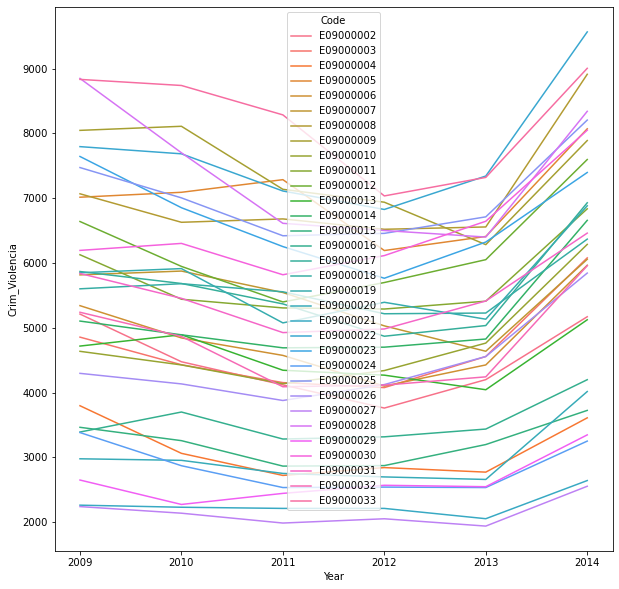

In [ ]:
a4_dims = (10, 10)
crimenes_total["Crim_Violencia"]=crimenes_total["Crim_Violencia"].astype(int)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.lineplot(data=crimenes_total, x="Year", y="Crim_Violencia", hue="Code",ax=ax)

<AxesSubplot:xlabel='Year', ylabel='Crim_Sexual'>

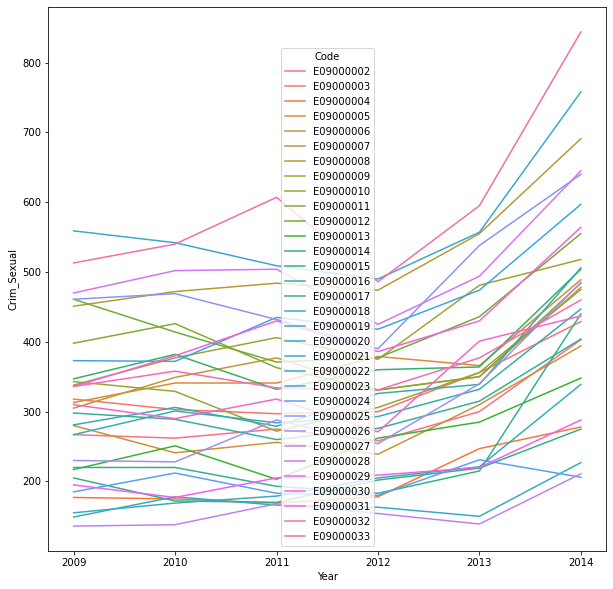

In [ ]:
crimenes_total["Crim_Sexual"]=crimenes_total["Crim_Sexual"].astype(int)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.lineplot(data=crimenes_total, x="Year", y="Crim_Sexual", hue="Code",ax=ax)

<AxesSubplot:xlabel='Year', ylabel='Crim_Robos'>

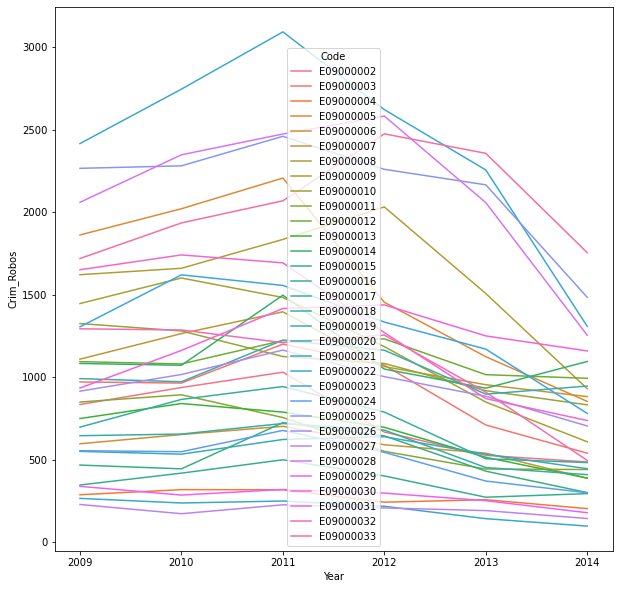

In [ ]:
crimenes_total["Crim_Robos"]=crimenes_total["Crim_Robos"].astype(int)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.lineplot(data=crimenes_total, x="Year", y="Crim_Robos", hue="Code",ax=ax)

<AxesSubplot:xlabel='Year', ylabel='Crim_Robos_casas'>

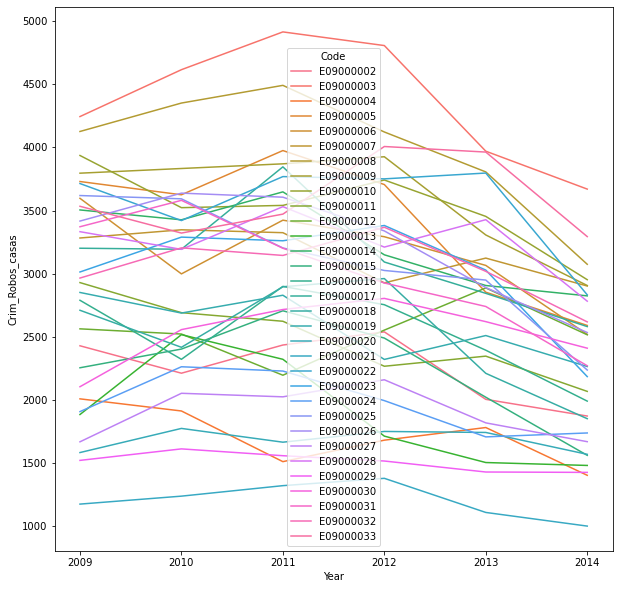

In [ ]:
crimenes_total["Crim_Robos_casas"]=crimenes_total["Crim_Robos_casas"].astype(int)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.lineplot(data=crimenes_total, x="Year", y="Crim_Robos_casas", hue="Code",ax=ax)

<AxesSubplot:xlabel='Year', ylabel='Crim_ladrones'>

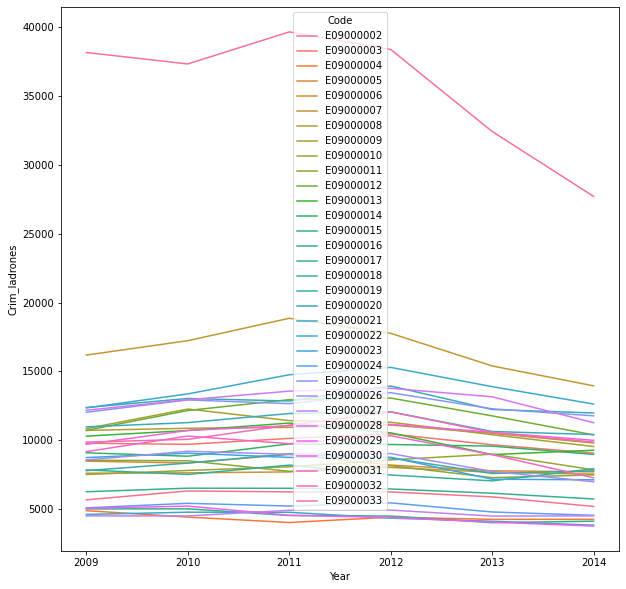

In [ ]:
crimenes_total["Crim_ladrones"]=crimenes_total["Crim_ladrones"].astype(int)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.lineplot(data=crimenes_total, x="Year", y="Crim_ladrones", hue="Code",ax=ax)

<AxesSubplot:xlabel='Year', ylabel='Crim_Fraude'>

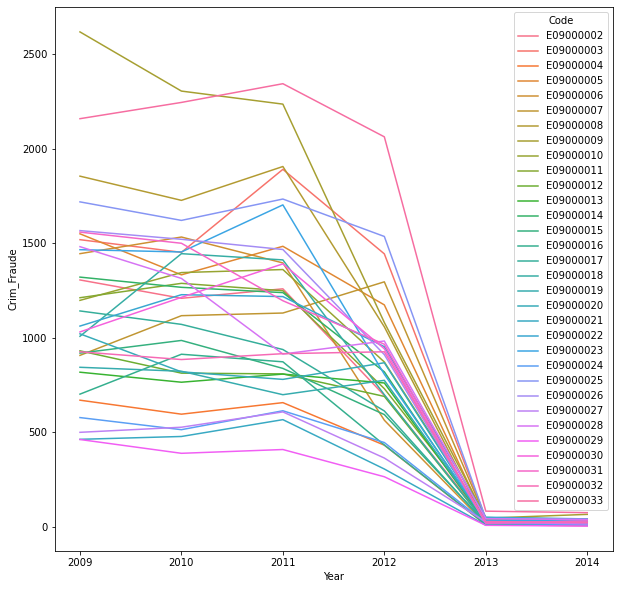

In [ ]:
crimenes_total["Crim_Fraude"]=crimenes_total["Crim_Fraude"].astype(int)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.lineplot(data=crimenes_total, x="Year", y="Crim_Fraude", hue="Code",ax=ax)

<AxesSubplot:xlabel='Year', ylabel='Crim_Danyo'>

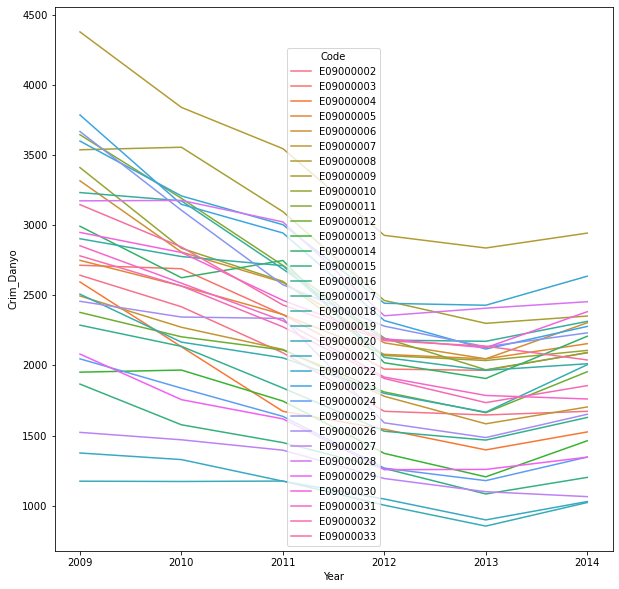

In [ ]:
crimenes_total["Crim_Danyo"]=crimenes_total["Crim_Danyo"].astype(int)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.lineplot(data=crimenes_total, x="Year", y="Crim_Danyo", hue="Code",ax=ax)

<AxesSubplot:xlabel='Year', ylabel='Crim_Drogas'>

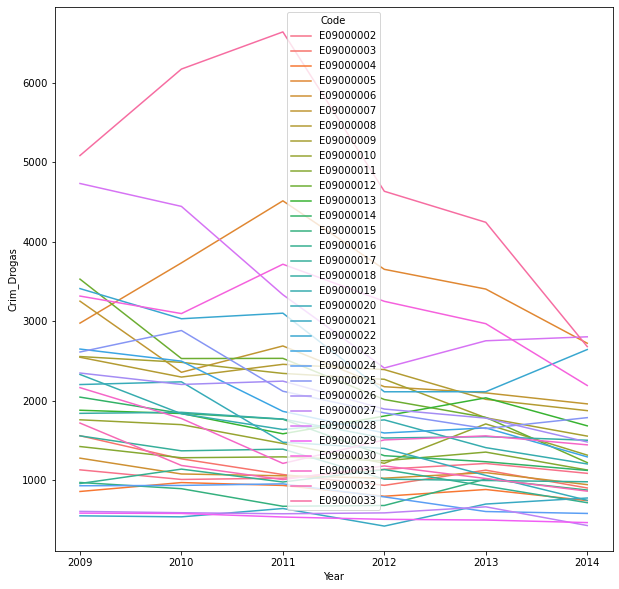

In [ ]:
crimenes_total["Crim_Drogas"]=crimenes_total["Crim_Drogas"].astype(int)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.lineplot(data=crimenes_total, x="Year", y="Crim_Drogas", hue="Code",ax=ax)

<AxesSubplot:xlabel='Year', ylabel='Crim_Otros'>

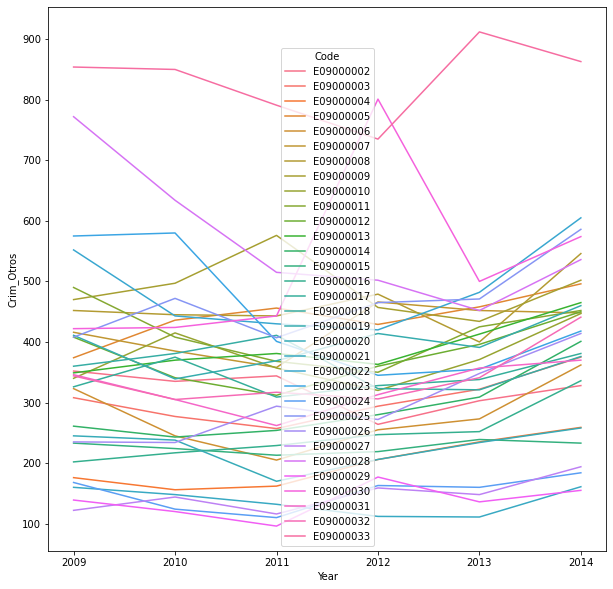

In [ ]:
crimenes_total["Crim_Otros"]=crimenes_total["Crim_Otros"].astype(int)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.lineplot(data=crimenes_total, x="Year", y="Crim_Otros", hue="Code",ax=ax)

## DATASET PRECIO VIVIENDA

In [ ]:
#p_vivienda = pd.read_csv('/gdrive/My Drive/TFM-Roberto_Hernandez/datasets/land-registry-house-prices-borough.csv')
p_vivienda = pd.read_csv('C:/Users/rhgim/Desktop/tfm/datasets/land-registry-house-prices-borough.csv')

#p_vivienda_test=pd.read_csv('/gdrive/My Drive/TFM-Roberto_Hernandez/datasets/land-registry-house-prices-borough.csv')
p_vivienda_test=pd.read_csv('C:/Users/rhgim/Desktop/tfm/datasets/land-registry-house-prices-borough.csv')

p_vivienda

Code                  Area                  Year Measure    Value
0      E09000001        City of London  Year ending Dec 1995  Median  105,000
1      E09000002  Barking and Dagenham  Year ending Dec 1995  Median   49,000
2      E09000003                Barnet  Year ending Dec 1995  Median   85,125
3      E09000004                Bexley  Year ending Dec 1995  Median   62,000
4      E09000005                 Brent  Year ending Dec 1995  Median   68,000
...          ...                   ...                   ...     ...      ...
12010  E12000008            South East  Year ending Dec 2017   Sales  148,025
12011  E12000009            South West  Year ending Dec 2017   Sales  102,292
12012  E92000001               England  Year ending Dec 2017   Sales  837,501
12013  W92000076                 Wales  Year ending Dec 2017   Sales   46,828
12014  K04000073     England And Wales  Year ending Dec 2017   Sales  884,329

[12015 rows x 5 columns]

### ANALISIS DE DATOS

In [ ]:
descripcionDatosDataset(p_vivienda)

Cantidad de filas: 12015
Cantidad de columnas: 5
----------------------------------------------------------------------------------------------------
Columna: Code
Tipo de datos: nominal
Descripción de valores:
-- Valores presentes (10 primeros): ['E09000001' 'E09000002' 'E09000003' 'E09000004' 'E09000005' 'E09000006'
 'E09000007' 'E09000008' 'E09000009' 'E09000010']
-- Cantidad de nulos: 0 = 0.00%
----------------------------------------------------------------------------------------------------
Columna: Area
Tipo de datos: nominal
Descripción de valores:
-- Valores presentes (10 primeros): ['City of London' 'Barking and Dagenham' 'Barnet' 'Bexley' 'Brent'
 'Bromley' 'Camden' 'Croydon' 'Ealing' 'Enfield']
-- Cantidad de nulos: 0 = 0.00%
----------------------------------------------------------------------------------------------------
Columna: Year
Tipo de datos: nominal
Descripción de valores:
-- Valores presentes (10 primeros): ['Year ending Dec 1995' 'Year ending Mar 1996' 'Year 

### LIMPIEZA

In [ ]:
#Nos quedamos con las ventas
p_vivienda=p_vivienda.loc[p_vivienda["Measure"]=="Median"]

p_vivienda_test=p_vivienda_test.loc[p_vivienda_test["Measure"]=="Median"]

p_vivienda

Code                  Area                  Year Measure    Value
0     E09000001        City of London  Year ending Dec 1995  Median  105,000
1     E09000002  Barking and Dagenham  Year ending Dec 1995  Median   49,000
2     E09000003                Barnet  Year ending Dec 1995  Median   85,125
3     E09000004                Bexley  Year ending Dec 1995  Median   62,000
4     E09000005                 Brent  Year ending Dec 1995  Median   68,000
...         ...                   ...                   ...     ...      ...
4000  E12000008            South East  Year ending Dec 2017  Median  315,000
4001  E12000009            South West  Year ending Dec 2017  Median  242,500
4002  E92000001               England  Year ending Dec 2017  Median  234,000
4003  W92000076                 Wales  Year ending Dec 2017  Median  151,000
4004  K04000073     England And Wales  Year ending Dec 2017  Median  227,722

[4005 rows x 5 columns]

In [ ]:
col_eliminar_vivienda=["Area", "Measure"]
p_vivienda.drop(col_eliminar_vivienda, inplace=True, axis=1)

p_vivienda_test.drop(col_eliminar_vivienda, inplace=True, axis=1)

p_vivienda

C:\Users\rhgim\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Code                  Year    Value
0     E09000001  Year ending Dec 1995  105,000
1     E09000002  Year ending Dec 1995   49,000
2     E09000003  Year ending Dec 1995   85,125
3     E09000004  Year ending Dec 1995   62,000
4     E09000005  Year ending Dec 1995   68,000
...         ...                   ...      ...
4000  E12000008  Year ending Dec 2017  315,000
4001  E12000009  Year ending Dec 2017  242,500
4002  E92000001  Year ending Dec 2017  234,000
4003  W92000076  Year ending Dec 2017  151,000
4004  K04000073  Year ending Dec 2017  227,722

[4005 rows x 3 columns]

In [ ]:
p_vivienda["Year"].unique()

array(['Year ending Dec 1995', 'Year ending Mar 1996',
       'Year ending Jun 1996', 'Year ending Sep 1996',
       'Year ending Dec 1996', 'Year ending Mar 1997',
       'Year ending Jun 1997', 'Year ending Sep 1997',
       'Year ending Dec 1997', 'Year ending Mar 1998',
       'Year ending Jun 1998', 'Year ending Sep 1998',
       'Year ending Dec 1998', 'Year ending Mar 1999',
       'Year ending Jun 1999', 'Year ending Sep 1999',
       'Year ending Dec 1999', 'Year ending Mar 2000',
       'Year ending Jun 2000', 'Year ending Sep 2000',
       'Year ending Dec 2000', 'Year ending Mar 2001',
       'Year ending Jun 2001', 'Year ending Sep 2001',
       'Year ending Dec 2001', 'Year ending Mar 2002',
       'Year ending Jun 2002', 'Year ending Sep 2002',
       'Year ending Dec 2002', 'Year ending Mar 2003',
       'Year ending Jun 2003', 'Year ending Sep 2003',
       'Year ending Dec 2003', 'Year ending Mar 2004',
       'Year ending Jun 2004', 'Year ending Sep 2004',
       'Ye

In [ ]:
p_vivienda["Year_true"]= p_vivienda["Year"].str.contains('Year ending Dec', na=False)
p_vivienda=p_vivienda.loc[(p_vivienda["Year_true"]==True)]
p_vivienda.drop("Year_true", inplace=True, axis=1)

p_vivienda_test["Year_true"]= p_vivienda_test["Year"].str.contains('Year ending Dec', na=False)
p_vivienda_test=p_vivienda_test.loc[(p_vivienda_test["Year_true"]==True)]
p_vivienda_test.drop("Year_true", inplace=True, axis=1)



p_vivienda["Year"].unique() 

<ipython-input-91-19ec5fbc3439>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_vivienda["Year_true"]= p_vivienda["Year"].str.contains('Year ending Dec', na=False)
C:\Users\rhgim\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


array(['Year ending Dec 1995', 'Year ending Dec 1996',
       'Year ending Dec 1997', 'Year ending Dec 1998',
       'Year ending Dec 1999', 'Year ending Dec 2000',
       'Year ending Dec 2001', 'Year ending Dec 2002',
       'Year ending Dec 2003', 'Year ending Dec 2004',
       'Year ending Dec 2005', 'Year ending Dec 2006',
       'Year ending Dec 2007', 'Year ending Dec 2008',
       'Year ending Dec 2009', 'Year ending Dec 2010',
       'Year ending Dec 2011', 'Year ending Dec 2012',
       'Year ending Dec 2013', 'Year ending Dec 2014',
       'Year ending Dec 2015', 'Year ending Dec 2016',
       'Year ending Dec 2017'], dtype=object)

In [ ]:
#Transformamos la columna anyo para poder unir el dataset al resto
p_vivienda["Year"]=p_vivienda["Year"].map(lambda x: str(x)[16:])

p_vivienda_test["Year"]=p_vivienda_test["Year"].map(lambda x: str(x)[16:])

p_vivienda

<ipython-input-92-4ea2f71947ab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_vivienda["Year"]=p_vivienda["Year"].map(lambda x: str(x)[16:])


Code  Year    Value
0     E09000001  1995  105,000
1     E09000002  1995   49,000
2     E09000003  1995   85,125
3     E09000004  1995   62,000
4     E09000005  1995   68,000
...         ...   ...      ...
4000  E12000008  2017  315,000
4001  E12000009  2017  242,500
4002  E92000001  2017  234,000
4003  W92000076  2017  151,000
4004  K04000073  2017  227,722

[1035 rows x 3 columns]

In [ ]:
p_vivienda["Value"]=p_vivienda["Value"].str.replace(",","")

p_vivienda_test["Value"]=p_vivienda_test["Value"].str.replace(",","")

<ipython-input-93-0140b71aba07>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_vivienda["Value"]=p_vivienda["Value"].str.replace(",","")


In [ ]:
p_vivienda["Code"]=p_vivienda["Code"].astype("string")
p_vivienda["Year"]=p_vivienda["Year"].astype(int)
p_vivienda["Value"]=p_vivienda["Value"].astype(int)

p_vivienda_test["Code"]=p_vivienda_test["Code"].astype("string")
p_vivienda_test["Year"]=p_vivienda_test["Year"].astype(int)
p_vivienda_test["Value"]=p_vivienda_test["Value"].astype(int)


p_vivienda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1035 entries, 0 to 4004
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Code    1035 non-null   string
 1   Year    1035 non-null   int32 
 2   Value   1035 non-null   int32 
dtypes: int32(2), string(1)
memory usage: 24.3 KB


<ipython-input-94-68bb956058ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_vivienda["Code"]=p_vivienda["Code"].astype("string")
<ipython-input-94-68bb956058ca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_vivienda["Year"]=p_vivienda["Year"].astype(int)
<ipython-input-94-68bb956058ca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

In [ ]:
p_vivienda=p_vivienda.loc[(p_vivienda["Code"]!="E09000001")]

p_vivienda_test=p_vivienda_test.loc[(p_vivienda_test["Code"]!="E09000001")]

p_vivienda["Code"].unique()

<StringArray>
['E09000002', 'E09000003', 'E09000004', 'E09000005', 'E09000006', 'E09000007',
 'E09000008', 'E09000009', 'E09000010', 'E09000011', 'E09000012', 'E09000013',
 'E09000014', 'E09000015', 'E09000016', 'E09000017', 'E09000018', 'E09000019',
 'E09000020', 'E09000021', 'E09000022', 'E09000023', 'E09000024', 'E09000025',
 'E09000026', 'E09000027', 'E09000028', 'E09000029', 'E09000030', 'E09000031',
 'E09000032', 'E09000033', 'E12000001', 'E12000002', 'E12000003', 'E12000004',
 'E12000005', 'E12000006', 'E12000007', 'E12000008', 'E12000009', 'E92000001',
 'W92000004', 'K04000001', 'W92000008', 'K04000005', 'W92000012', 'K04000009',
 'W92000016', 'K04000013', 'W92000020', 'K04000017', 'W92000024', 'K04000021',
 'W92000028', 'K04000025', 'W92000032', 'K04000029', 'W92000036', 'K04000033',
 'W92000040', 'K04000037', 'W92000044', 'K04000041', 'W92000048', 'K04000045',
 'W92000052', 'K04000049', 'W92000056', 'K04000053', 'W92000060', 'K04000057',
 'W92000064', 'K04000061', 'W92000068'

In [ ]:
p_vivienda["Code_true"]= p_vivienda["Code"].str.contains('E09', na=False)
p_vivienda=p_vivienda.loc[(p_vivienda["Code_true"]==True)]
p_vivienda.drop("Code_true", inplace=True, axis=1)

p_vivienda_test["Code_true"]= p_vivienda_test["Code"].str.contains('E09', na=False)
p_vivienda_test=p_vivienda_test.loc[(p_vivienda_test["Code_true"]==True)]
p_vivienda_test.drop("Code_true", inplace=True, axis=1)


p_vivienda["Code"].unique() 

<ipython-input-96-4b5aec08d560>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_vivienda["Code_true"]= p_vivienda["Code"].str.contains('E09', na=False)


<StringArray>
['E09000002', 'E09000003', 'E09000004', 'E09000005', 'E09000006', 'E09000007',
 'E09000008', 'E09000009', 'E09000010', 'E09000011', 'E09000012', 'E09000013',
 'E09000014', 'E09000015', 'E09000016', 'E09000017', 'E09000018', 'E09000019',
 'E09000020', 'E09000021', 'E09000022', 'E09000023', 'E09000024', 'E09000025',
 'E09000026', 'E09000027', 'E09000028', 'E09000029', 'E09000030', 'E09000031',
 'E09000032', 'E09000033']
Length: 32, dtype: string

In [ ]:
p_vivienda=p_vivienda.rename(columns={"Value":"Precio_Vivienda"})

p_vivienda_test=p_vivienda_test.rename(columns={"Value":"Precio_Vivienda"})

In [ ]:
p_vivienda["Precio_Vivienda"]=p_vivienda["Precio_Vivienda"].astype(int)
p_vivienda["Year"]=p_vivienda["Year"].astype(int)

p_vivienda_test["Precio_Vivienda"]=p_vivienda_test["Precio_Vivienda"].astype(int)
p_vivienda_test["Year"]=p_vivienda_test["Year"].astype(int)

In [ ]:
p_vivienda=p_vivienda.loc[(p_vivienda["Year"]<=2014) & (p_vivienda["Year"]>=2009)]

p_vivienda_test=p_vivienda_test.loc[(p_vivienda_test["Year"]<=2015) & (p_vivienda_test["Year"]>=2015)]

### VISUALIZACION

<AxesSubplot:xlabel='Year', ylabel='Precio_Vivienda'>

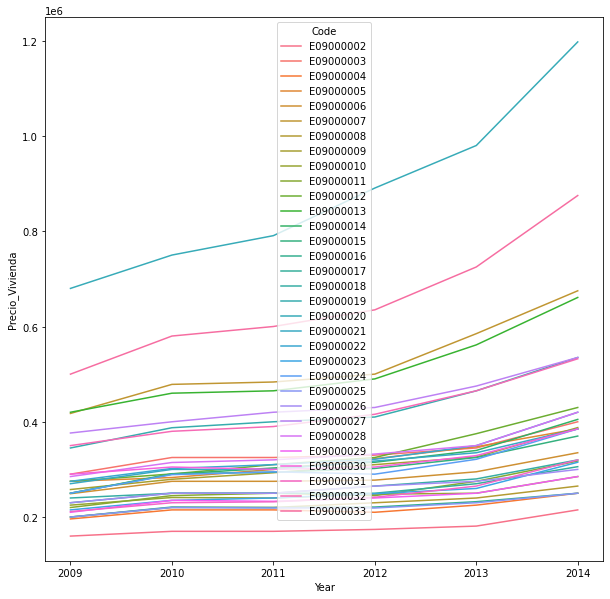

In [ ]:
a4_dims = (10, 10)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.lineplot(data=p_vivienda, x="Year", y="Precio_Vivienda", hue="Code",ax=ax)

## DATASET CONSUMO ENERGETICO

In [ ]:
#consumo = pd.read_excel('/gdrive/My Drive/TFM-Roberto_Hernandez/datasets/total-final-energy-consumption.xlsx')
consumo = pd.read_excel('C:/Users/rhgim/Desktop/tfm/datasets//total-final-energy-consumption.xlsx')
#consumo_test=pd.read_excel('/gdrive/My Drive/TFM-Roberto_Hernandez/datasets/total-final-energy-consumption.xlsx')
consumo_test=pd.read_excel('C:/Users/rhgim/Desktop/tfm/datasets/total-final-energy-consumption.xlsx')

consumo

Code                  Area  Year              Fuel  \
0      E09000002  Barking and Dagenham  2005              Coal   
1      E09000003                Barnet  2005              Coal   
2      E09000004                Bexley  2005              Coal   
3      E09000005                 Brent  2005              Coal   
4      E09000006               Bromley  2005              Coal   
...          ...                   ...   ...               ...   
23777  N92000002      Northern Ireland  2015  Consuming Sector   
23778  W92000004                 Wales  2015  Consuming Sector   
23779  S92000003              Scotland  2015  Consuming Sector   
23780  E92000001               England  2015  Consuming Sector   
23781  K02000001        United Kingdom  2015  Consuming Sector   

                        Sector Measurement     Value  
0      Industrial & Commercial        Ktoe         0  
1      Industrial & Commercial        Ktoe         0  
2      Industrial & Commercial        Ktoe  0.008195  
3      Industrial & Commercial        Ktoe         0  
4      Industrial & Commercial        Ktoe  0.002011  
...                        ...         ...       ...  
23777                Transport         GWh         0  
23778                Transport         GWh         0  
23779                Transport         GWh         0  
23780                Transport         GWh         0  
23781                Transport         GWh         0  

[23782 rows x 7 columns]

### ANALISIS DE DATOS

In [ ]:
descripcionDatosDataset(consumo)

Cantidad de filas: 23782
Cantidad de columnas: 7
----------------------------------------------------------------------------------------------------
Columna: Code
Tipo de datos: nominal
Descripción de valores:
-- Valores presentes (10 primeros): ['E09000002' 'E09000003' 'E09000004' 'E09000005' 'E09000006' 'E09000007'
 'E09000001' 'E09000008' 'E09000009' 'E09000010']
-- Cantidad de nulos: 0 = 0.00%
----------------------------------------------------------------------------------------------------
Columna: Area
Tipo de datos: nominal
Descripción de valores:
-- Valores presentes (10 primeros): ['Barking and Dagenham' 'Barnet' 'Bexley' 'Brent' 'Bromley' 'Camden'
 'City of London' 'Croydon' 'Ealing' 'Enfield']
-- Cantidad de nulos: 0 = 0.00%
----------------------------------------------------------------------------------------------------
Columna: Year
Tipo de datos: numérico
Descripción de valores:
min       2005.000000
max       2015.000000
mean      2010.000000
std          3.162344


### LIMPIEZA

In [ ]:
#Borramos las columnas que no necesitamos
consumo=consumo.loc[consumo["Measurement"]=="GWh"]
col_eliminar_consumo=["Area", "Measurement"]
consumo.drop(col_eliminar_consumo, inplace=True, axis=1)
consumo=consumo.astype("string")

consumo_test=consumo_test.loc[consumo_test["Measurement"]=="GWh"]
consumo_test.drop(col_eliminar_consumo, inplace=True, axis=1)
consumo_test=consumo_test.astype("string")


consumo

C:\Users\rhgim\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Code  Year              Fuel                   Sector        Value
11891  E09000002  2005              Coal  Industrial & Commercial            0
11892  E09000003  2005              Coal  Industrial & Commercial            0
11893  E09000004  2005              Coal  Industrial & Commercial  0.095305777
11894  E09000005  2005              Coal  Industrial & Commercial            0
11895  E09000006  2005              Coal  Industrial & Commercial  0.023384762
...          ...   ...               ...                      ...          ...
23777  N92000002  2015  Consuming Sector                Transport            0
23778  W92000004  2015  Consuming Sector                Transport            0
23779  S92000003  2015  Consuming Sector                Transport            0
23780  E92000001  2015  Consuming Sector                Transport            0
23781  K02000001  2015  Consuming Sector                Transport            0

[11891 rows x 5 columns]

In [ ]:
consumo=consumo.loc[(consumo["Sector"]=="Total")]
consumo.drop("Sector", inplace=True, axis=1)

consumo_test=consumo_test.loc[(consumo_test["Sector"]=="Total")]
consumo_test.drop("Sector", inplace=True, axis=1)


C:\Users\rhgim\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
consumo["Code_true"]= consumo["Code"].str.contains('E09', na=False)
consumo=consumo.loc[(consumo["Code_true"]==True)]
consumo.drop("Code_true", inplace=True, axis=1)

consumo_test["Code_true"]= consumo_test["Code"].str.contains('E09', na=False)
consumo_test=consumo_test.loc[(consumo_test["Code_true"]==True)]
consumo_test.drop("Code_true", inplace=True, axis=1)


consumo["Code"].unique()

<ipython-input-105-5fd066cfa81d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consumo["Code_true"]= consumo["Code"].str.contains('E09', na=False)


<StringArray>
['E09000002', 'E09000003', 'E09000004', 'E09000005', 'E09000006', 'E09000007',
 'E09000001', 'E09000008', 'E09000009', 'E09000010', 'E09000011', 'E09000012',
 'E09000013', 'E09000014', 'E09000015', 'E09000016', 'E09000017', 'E09000018',
 'E09000019', 'E09000020', 'E09000021', 'E09000022', 'E09000023', 'E09000024',
 'E09000025', 'E09000026', 'E09000027', 'E09000028', 'E09000029', 'E09000030',
 'E09000031', 'E09000032', 'E09000033']
Length: 33, dtype: string

In [ ]:
consumo=consumo.loc[(consumo["Code"]!="E09000001")]

consumo_test=consumo_test.loc[(consumo_test["Code"]!="E09000001")]

In [ ]:
consumo= consumo.loc[(consumo["Year"]>="2009")&(consumo["Year"]<="2014")]
consumo_test= consumo_test.loc[(consumo_test["Year"]>="2015")&(consumo_test["Year"]<="2015")]

In [ ]:
#Creamos un dataset por cada tipo de energia consumida
consumo_coal=consumo.loc[consumo["Fuel"]=="Coal"]
consumo_coal=consumo_coal.rename(columns={"Value": "Coal"})
consumo_coal.drop("Fuel", inplace=True, axis=1)

consumo_manuf=consumo.loc[consumo["Fuel"]=="Manufactured fuels"]
consumo_manuf=consumo_manuf.rename(columns={"Value": "Manufacturer"})
consumo_manuf.drop("Fuel", inplace=True, axis=1)

consumo_petroleum=consumo.loc[consumo["Fuel"]=="Petroleum products"]
consumo_petroleum=consumo_petroleum.rename(columns={"Value": "Petroleum"})
consumo_petroleum.drop("Fuel", inplace=True, axis=1)

consumo_gas=consumo.loc[consumo["Fuel"]=="Gas"]
consumo_gas=consumo_gas.rename(columns={"Value": "Gas"})
consumo_gas.drop("Fuel", inplace=True, axis=1)

consumo_elect=consumo.loc[consumo["Fuel"]=="Electricity"]
consumo_elect=consumo_elect.rename(columns={"Value": "Electricity"})
consumo_elect.drop("Fuel", inplace=True, axis=1)

consumo_bio=consumo.loc[consumo["Fuel"]=="Bioenergy & wastes"]
consumo_bio=consumo_bio.rename(columns={"Value": "Bionergy"})
consumo_bio.drop("Fuel", inplace=True, axis=1)

In [ ]:
#Creamos un dataset por cada tipo de energia consumida
consumo_coal_test=consumo_test.loc[consumo_test["Fuel"]=="Coal"]
consumo_coal_test=consumo_coal_test.rename(columns={"Value": "Coal"})
consumo_coal_test.drop("Fuel", inplace=True, axis=1)

consumo_manuf_test=consumo_test.loc[consumo_test["Fuel"]=="Manufactured fuels"]
consumo_manuf_test=consumo_manuf_test.rename(columns={"Value": "Manufacturer"})
consumo_manuf_test.drop("Fuel", inplace=True, axis=1)

consumo_petroleum_test=consumo_test.loc[consumo_test["Fuel"]=="Petroleum products"]
consumo_petroleum_test=consumo_petroleum_test.rename(columns={"Value": "Petroleum"})
consumo_petroleum_test.drop("Fuel", inplace=True, axis=1)

consumo_gas_test=consumo_test.loc[consumo_test["Fuel"]=="Gas"]
consumo_gas_test=consumo_gas_test.rename(columns={"Value": "Gas"})
consumo_gas_test.drop("Fuel", inplace=True, axis=1)

consumo_elect_test=consumo_test.loc[consumo_test["Fuel"]=="Electricity"]
consumo_elect_test=consumo_elect_test.rename(columns={"Value": "Electricity"})
consumo_elect_test.drop("Fuel", inplace=True, axis=1)

consumo_bio_test=consumo_test.loc[consumo_test["Fuel"]=="Bioenergy & wastes"]
consumo_bio_test=consumo_bio_test.rename(columns={"Value": "Bionergy"})
consumo_bio_test.drop("Fuel", inplace=True, axis=1)

### UNION DATASETS

In [ ]:
dfs = [consumo_coal, consumo_manuf, consumo_petroleum, consumo_gas,consumo_elect,consumo_bio]
consumo_total = reduce(lambda left,right: pd.merge(left,right, how="outer"), dfs)

dfs_test = [consumo_coal_test, consumo_manuf_test, consumo_petroleum_test, consumo_gas_test,consumo_elect_test,consumo_bio_test]
consumo_total_test = reduce(lambda left,right: pd.merge(left,right, how="outer"), dfs_test)

consumo_total

Code  Year         Coal Manufacturer    Petroleum          Gas  \
0    E09000002  2009  3.309006872  17.63476541  772.5802752  1046.602502   
1    E09000003  2009  1.611894211  2.032613076  1506.159117   2992.22694   
2    E09000004  2009  1.747327201  2.484353081  1032.361286  2103.840947   
3    E09000005  2009  0.938093816  1.096738662    897.38014  2214.778794   
4    E09000006  2009  3.303843216  3.356673545  1246.183458  2661.590506   
..         ...   ...          ...          ...          ...          ...   
187  E09000029  2014  2.310309154  6.261485963  576.2024645  1240.780327   
188  E09000030  2014   1.08322651  1.425836386  1005.954472  1299.364413   
189  E09000031  2014  1.635069008  2.180413912    705.85178   1480.79008   
190  E09000032  2014  0.820423992  1.094060175  839.6617354  2098.079984   
191  E09000033  2014  1.255759139  3.348706028  1251.529334  3040.711628   

     Electricity            Bionergy  
0     722.240579  22.851526905599997  
1    1197.355037                   0  
2     806.668556          26.7132367  
3    1246.328279                   0  
4    1057.328155         1.093800678  
..           ...                 ...  
187  689.9304397                   0  
188   2940.04673         34.56104708  
189  772.2723959                   0  
190  1057.114796                   0  
191  3988.493698                   0  

[192 rows x 8 columns]

In [ ]:
consumo_total["Code"]=consumo_total["Code"].astype("string")
consumo_total["Year"]=consumo_total["Year"].astype(int)
consumo_total["Coal"]=consumo_total["Coal"].astype(float)
consumo_total["Manufacturer"]=consumo_total["Manufacturer"].astype(float)
consumo_total["Petroleum"]=consumo_total["Petroleum"].astype(float)
consumo_total["Gas"]=consumo_total["Gas"].astype(float)
consumo_total["Electricity"]=consumo_total["Electricity"].astype(float)
consumo_total["Bionergy"]=consumo_total["Bionergy"].astype(float)


consumo_total_test["Code"]=consumo_total_test["Code"].astype("string")
consumo_total_test["Year"]=consumo_total_test["Year"].astype(int)
consumo_total_test["Coal"]=consumo_total_test["Coal"].astype(float)
consumo_total_test["Manufacturer"]=consumo_total_test["Manufacturer"].astype(float)
consumo_total_test["Petroleum"]=consumo_total_test["Petroleum"].astype(float)
consumo_total_test["Gas"]=consumo_total_test["Gas"].astype(float)
consumo_total_test["Electricity"]=consumo_total_test["Electricity"].astype(float)
consumo_total_test["Bionergy"]=consumo_total_test["Bionergy"].astype(float)



consumo_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 0 to 191
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Code          192 non-null    string 
 1   Year          192 non-null    int32  
 2   Coal          192 non-null    float64
 3   Manufacturer  192 non-null    float64
 4   Petroleum     192 non-null    float64
 5   Gas           192 non-null    float64
 6   Electricity   192 non-null    float64
 7   Bionergy      192 non-null    float64
dtypes: float64(6), int32(1), string(1)
memory usage: 12.8 KB


### VISUALIZACION

<AxesSubplot:title={'center':'Consumo energetico 2009-2015'}, ylabel='None'>

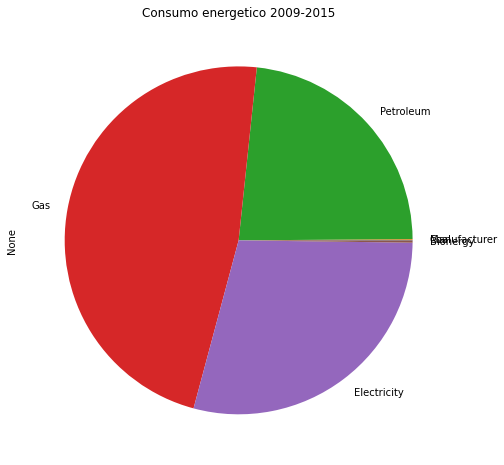

In [ ]:
a4_dims = (8, 8)
fig, ax = pyplot.subplots(figsize=a4_dims)
consumo_total[consumo_total.columns[2:]].sum().plot.pie(ax=ax, title="Consumo energetico 2009-2015")

<AxesSubplot:xlabel='Year', ylabel='Coal'>

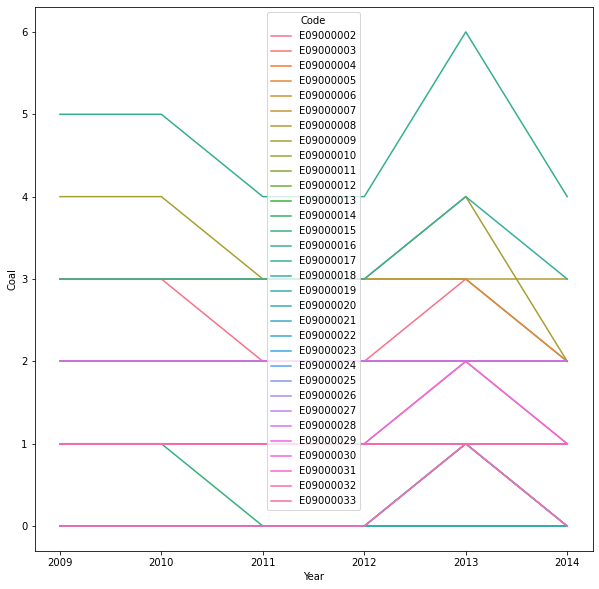

In [ ]:
a4_dims = (10, 10)
consumo_total["Coal"]=consumo_total["Coal"].astype(int)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.lineplot(data=consumo_total, x="Year", y="Coal", hue="Code",ax=ax)

<AxesSubplot:xlabel='Year', ylabel='Manufacturer'>

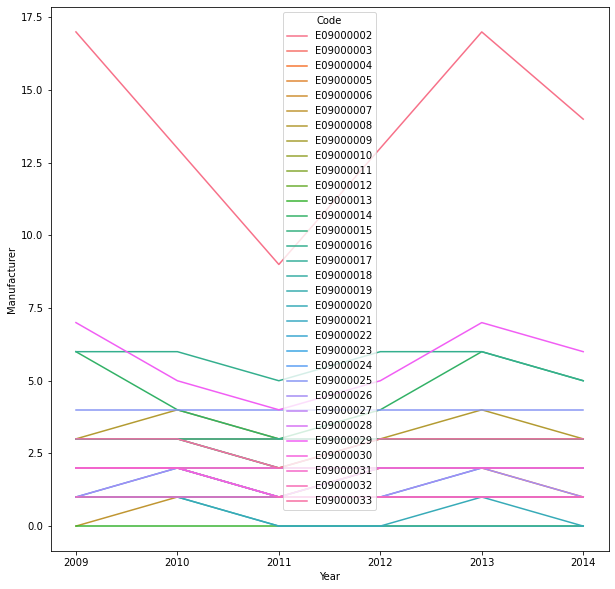

In [ ]:
consumo_total["Manufacturer"]=consumo_total["Manufacturer"].astype(int)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.lineplot(data=consumo_total, x="Year", y="Manufacturer", hue="Code",ax=ax)

<AxesSubplot:xlabel='Year', ylabel='Petroleum'>

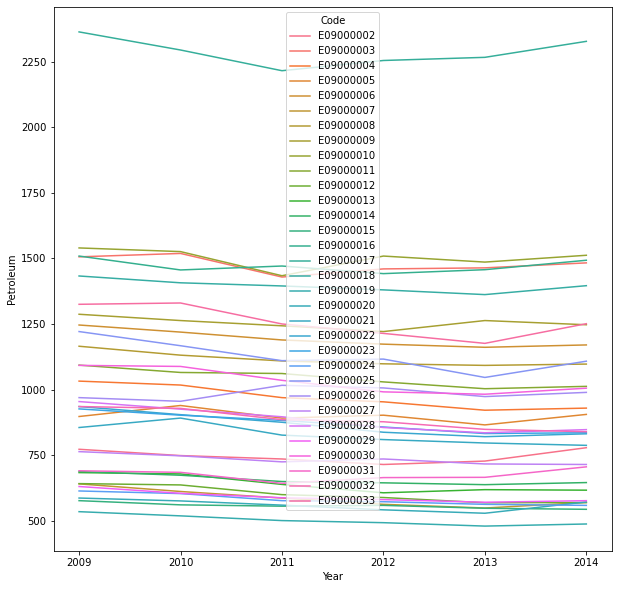

In [ ]:
consumo_total["Petroleum"]=consumo_total["Petroleum"].astype(int)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.lineplot(data=consumo_total, x="Year", y="Petroleum", hue="Code",ax=ax)

<AxesSubplot:xlabel='Year', ylabel='Gas'>

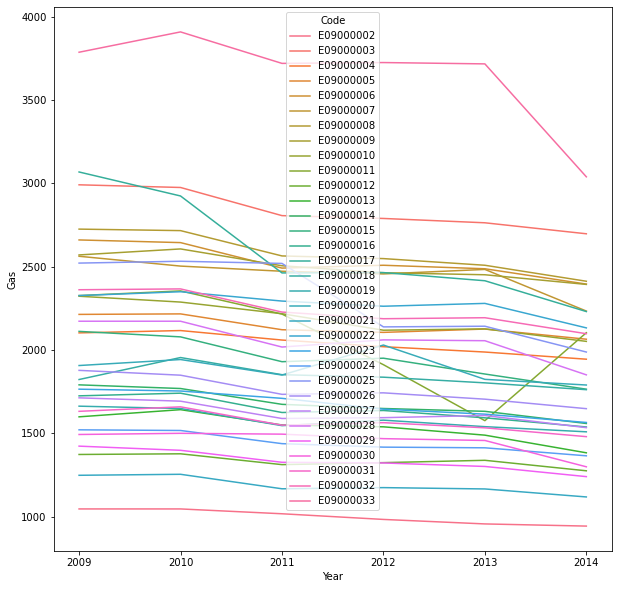

In [ ]:
consumo_total["Gas"]=consumo_total["Gas"].astype(int)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.lineplot(data=consumo_total, x="Year", y="Gas", hue="Code",ax=ax)

<AxesSubplot:xlabel='Year', ylabel='Electricity'>

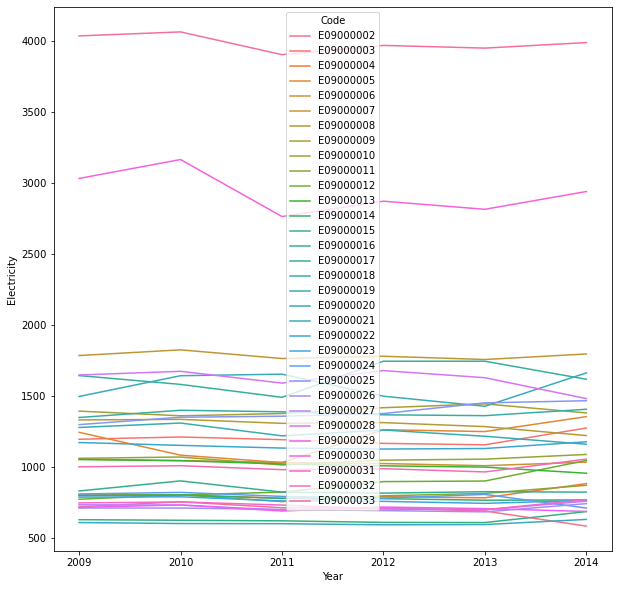

In [ ]:
consumo_total["Electricity"]=consumo_total["Electricity"].astype(int)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.lineplot(data=consumo_total, x="Year", y="Electricity", hue="Code",ax=ax)

<AxesSubplot:xlabel='Year', ylabel='Bionergy'>

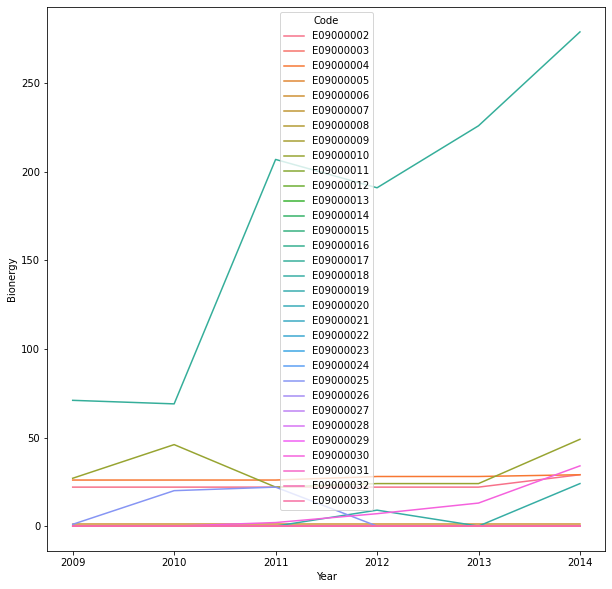

In [ ]:
consumo_total["Bionergy"]=consumo_total["Bionergy"].astype(int)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.lineplot(data=consumo_total, x="Year", y="Bionergy", hue="Code",ax=ax)

## DATASET FESTIVOS

In [ ]:
#festivos = pd.read_excel('/gdrive/My Drive/TFM-Roberto_Hernandez/datasets/Bank-holidays.xlsx')
festivos = pd.read_excel('C:/Users/rhgim/Desktop/tfm/datasets/Bank-holidays.xlsx')
#festivos_test=pd.read_excel('/gdrive/My Drive/TFM-Roberto_Hernandez/datasets/Bank-holidays.xlsx')
festivos_test=pd.read_excel('C:/Users/rhgim/Desktop/tfm/datasets/Bank-holidays.xlsx')

festivos

Date           Holiday-Event
0  2009-01-01          New Year's Day
1  2009-04-09    Previous Good Friday
2  2009-04-10             Good Friday
3  2009-04-13           Easter Monday
4  2009-05-04  Early May bank holiday
..        ...                     ...
77 2015-11-05          Guy Fawkes Day
78 2015-12-24  Previous Christmas Day
79 2015-12-25           Christmas Day
80 2015-12-26              Boxing Day
81 2015-12-28        Boxing Day-moved

[82 rows x 2 columns]

### ANALISIS DE DATOS

In [ ]:
descripcionDatosDataset(festivos)

Cantidad de filas: 82
Cantidad de columnas: 2
----------------------------------------------------------------------------------------------------
Columna: Date
Tipo de datos: nominal
Descripción de valores:
-- Valores presentes (10 primeros): ['2009-01-01T00:00:00.000000000' '2009-04-09T00:00:00.000000000'
 '2009-04-10T00:00:00.000000000' '2009-04-13T00:00:00.000000000'
 '2009-05-04T00:00:00.000000000' '2009-05-25T00:00:00.000000000'
 '2009-08-31T00:00:00.000000000' '2009-11-05T00:00:00.000000000'
 '2009-12-25T00:00:00.000000000' '2009-12-26T00:00:00.000000000']
-- Cantidad de nulos: 0 = 0.00%
----------------------------------------------------------------------------------------------------
Columna: Holiday-Event
Tipo de datos: nominal
Descripción de valores:
-- Valores presentes (10 primeros): ["New Year's Day" 'Previous Good Friday' 'Good Friday' 'Easter Monday'
 'Early May bank holiday' 'Late May bank holiday' 'August Bank Holidays'
 'Guy Fawkes Day' 'Christmas Day' 'Boxing Day']

### LIMPIEZA

In [ ]:
festivos['Dia'] = pd.to_datetime(festivos['Date'], format='%Y-%m-%d').dt.strftime('%d').astype(int)
festivos['Mes'] = pd.to_datetime(festivos['Date'], format='%Y-%m-%d').dt.strftime('%m').astype(int)
festivos['Year'] = pd.to_datetime(festivos['Date'], format='%Y-%m-%d').dt.strftime('%Y').astype(int)
festivos['Dia'] 

festivos_test['Dia'] = pd.to_datetime(festivos_test['Date'], format='%Y-%m-%d').dt.strftime('%d').astype(int)
festivos_test['Mes'] = pd.to_datetime(festivos_test['Date'], format='%Y-%m-%d').dt.strftime('%m').astype(int)
festivos_test['Year'] = pd.to_datetime(festivos_test['Date'], format='%Y-%m-%d').dt.strftime('%Y').astype(int)

In [ ]:
festivos.drop("Holiday-Event", inplace=True, axis=1)
festivos.drop("Date", inplace=True, axis=1)

festivos_test.drop("Holiday-Event", inplace=True, axis=1)
festivos_test.drop("Date", inplace=True, axis=1)

In [ ]:
festivos["Festivo"]=1

festivos_test["Festivo"]=1

In [ ]:
festivos= festivos.loc[(festivos["Year"]<=2014)&(festivos["Year"]>=2009)]

festivos_test= festivos_test.loc[(festivos_test["Year"]>=2015)&(festivos_test["Year"]<=2015)]

In [ ]:
festivos

Dia  Mes  Year  Festivo
0     1    1  2009        1
1     9    4  2009        1
2    10    4  2009        1
3    13    4  2009        1
4     4    5  2009        1
..  ...  ...   ...      ...
64   26    5  2014        1
65   25    8  2014        1
66    5   11  2014        1
67   25   12  2014        1
68   26   12  2014        1

[69 rows x 4 columns]

# DATASET UNIDO

Unimos todos los dataset, usaremos el codigo del barrio como referencia y el anyo

### UNION DATASETS

In [ ]:
llamadas.shape


(69914, 11)

In [ ]:
llamadas_test.shape

(11637, 11)

In [ ]:
dfs = [llamadas, viviendas_tr]
df = reduce(lambda left,right: pd.merge(left,right, how="outer"), dfs)


dfs_test = [llamadas_test, viviendas_test_tr]
df_test = reduce(lambda left,right: pd.merge(left,right, how="outer"), dfs_test)

df

Code Postcode_district  Year            ProperCase  \
0      E09000002               RM8  2009  Barking And dagenham   
1      E09000002               RM8  2009  Barking And dagenham   
2      E09000002               RM9  2009  Barking And dagenham   
3      E09000002              IG11  2009  Barking And dagenham   
4      E09000002               RM9  2009  Barking And dagenham   
...          ...               ...   ...                   ...   
69909  E09000033              SW1W  2014           Westminster   
69910  E09000033              SW1P  2014           Westminster   
69911  E09000033              SW1A  2014           Westminster   
69912  E09000033                W9  2014           Westminster   
69913  E09000033               W1D  2014           Westminster   

       Easting_rounded  Northing_rounded  Num_Fire  Num_Falsa_A  Num_Service  \
0               547300            185121         8            4            2   
1               549000            186700         0            1            1   
2               546510            185010         5            3            2   
3               546190            184350         1            1            3   
4               548294            184250         2            5            2   
...                ...               ...       ...          ...          ...   
69909           527890            180880         3            5            2   
69910           528164            180957         5           16            6   
69911           528891            180616         0           18            6   
69912           528346            181293         3           24            5   
69913           528213            180728         2           14            3   

       Dia  Mes  Ingreso_Vivienda  
0        1    1                 5  
1        2    1                 5  
2        3    1                 5  
3        4    1                 5  
4        5    1                 5  
...    ...  ...               ...  
69909   27   12                20  
69910   28   12                20  
69911   29   12                20  
69912   30   12                20  
69913   31   12                20  

[69914 rows x 12 columns]

In [ ]:
df_test

Code Postcode_district  Year            ProperCase  \
0      E09000002               RM6  2015  Barking And dagenham   
1      E09000002               RM9  2015  Barking And dagenham   
2      E09000002              IG11  2015  Barking And dagenham   
3      E09000002               RM7  2015  Barking And dagenham   
4      E09000002              RM10  2015  Barking And dagenham   
...          ...               ...   ...                   ...   
11632  E09000033               W1T  2015           Westminster   
11633  E09000033              SW1X  2015           Westminster   
11634  E09000033                W2  2015           Westminster   
11635  E09000033               NW8  2015           Westminster   
11636  E09000033               W1S  2015           Westminster   

       Easting_rounded  Northing_rounded  Num_Fire  Num_Falsa_A  Num_Service  \
0               547925            186650         3            0            1   
1               548400            185800         0            0            2   
2               546977            184631         3            3            5   
3               550700            185150         1            0            1   
4               548975            185450         0            2            2   
...                ...               ...       ...          ...          ...   
11632           528642            180796         0           10            3   
11633           528030            180896         1            9            5   
11634           528188            181188         1           14            3   
11635           528065            181055         0           16            3   
11636           528250            180600         0           14            4   

       Dia  Mes  Ingreso_Vivienda  
0        1    1                 8  
1        2    1                 8  
2        3    1                 8  
3        4    1                 8  
4        5    1                 8  
...    ...  ...               ...  
11632   27   12                20  
11633   28   12                20  
11634   29   12                20  
11635   30   12                20  
11636   31   12                20  

[11637 rows x 12 columns]

In [ ]:
#Unimos los dataset por el codigo y el anyo
df = pd.merge(df, densidad, how="outer")

df_test = pd.merge(df_test, densidad_test, how="outer")

df

Code Postcode_district  Year            ProperCase  \
0      E09000002               RM8  2009  Barking And dagenham   
1      E09000002               RM8  2009  Barking And dagenham   
2      E09000002               RM9  2009  Barking And dagenham   
3      E09000002              IG11  2009  Barking And dagenham   
4      E09000002               RM9  2009  Barking And dagenham   
...          ...               ...   ...                   ...   
69909  E09000033              SW1W  2014           Westminster   
69910  E09000033              SW1P  2014           Westminster   
69911  E09000033              SW1A  2014           Westminster   
69912  E09000033                W9  2014           Westminster   
69913  E09000033               W1D  2014           Westminster   

       Easting_rounded  Northing_rounded  Num_Fire  Num_Falsa_A  Num_Service  \
0               547300            185121         8            4            2   
1               549000            186700         0            1            1   
2               546510            185010         5            3            2   
3               546190            184350         1            1            3   
4               548294            184250         2            5            2   
...                ...               ...       ...          ...          ...   
69909           527890            180880         3            5            2   
69910           528164            180957         5           16            6   
69911           528891            180616         0           18            6   
69912           528346            181293         3           24            5   
69913           528213            180728         2           14            3   

       Dia  Mes  Ingreso_Vivienda  Poblacion  Area_m2  
0        1    1                 5     177580       36  
1        2    1                 5     177580       36  
2        3    1                 5     177580       36  
3        4    1                 5     177580       36  
4        5    1                 5     177580       36  
...    ...  ...               ...        ...      ...  
69909   27   12                20     233292       21  
69910   28   12                20     233292       21  
69911   29   12                20     233292       21  
69912   30   12                20     233292       21  
69913   31   12                20     233292       21  

[69914 rows x 14 columns]

In [ ]:
df_test.shape

(11637, 14)

In [ ]:
#Unimos los dataset por el codigo y el anyo

df = pd.merge(df,crimenes_total, how="outer")

df_test = pd.merge(df_test,crimenes_total_test, how="outer")

df

Code Postcode_district  Year            ProperCase  \
0      E09000002               RM8  2009  Barking And dagenham   
1      E09000002               RM8  2009  Barking And dagenham   
2      E09000002               RM9  2009  Barking And dagenham   
3      E09000002              IG11  2009  Barking And dagenham   
4      E09000002               RM9  2009  Barking And dagenham   
...          ...               ...   ...                   ...   
69909  E09000033              SW1W  2014           Westminster   
69910  E09000033              SW1P  2014           Westminster   
69911  E09000033              SW1A  2014           Westminster   
69912  E09000033                W9  2014           Westminster   
69913  E09000033               W1D  2014           Westminster   

       Easting_rounded  Northing_rounded  Num_Fire  Num_Falsa_A  Num_Service  \
0               547300            185121         8            4            2   
1               549000            186700         0            1            1   
2               546510            185010         5            3            2   
3               546190            184350         1            1            3   
4               548294            184250         2            5            2   
...                ...               ...       ...          ...          ...   
69909           527890            180880         3            5            2   
69910           528164            180957         5           16            6   
69911           528891            180616         0           18            6   
69912           528346            181293         3           24            5   
69913           528213            180728         2           14            3   

       Dia  ...  Area_m2  Crim_Violencia  Crim_Sexual  Crim_Robos  \
0        1  ...       36            5212          267         834   
1        2  ...       36            5212          267         834   
2        3  ...       36            5212          267         834   
3        4  ...       36            5212          267         834   
4        5  ...       36            5212          267         834   
...    ...  ...      ...             ...          ...         ...   
69909   27  ...       21            9006          844        1755   
69910   28  ...       21            9006          844        1755   
69911   29  ...       21            9006          844        1755   
69912   30  ...       21            9006          844        1755   
69913   31  ...       21            9006          844        1755   

       Crim_Robos_casas  Crim_ladrones  Crim_Fraude  Crim_Danyo  Crim_Drogas  \
0                  2430           5666         1306        2643         1133   
1                  2430           5666         1306        2643         1133   
2                  2430           5666         1306        2643         1133   
3                  2430           5666         1306        2643         1133   
4                  2430           5666         1306        2643         1133   
...                 ...            ...          ...         ...          ...   
69909              3294          27721           75        2039         2682   
69910              3294          27721           75        2039         2682   
69911              3294          27721           75        2039         2682   
69912              3294          27721           75        2039         2682   
69913              3294          27721           75        2039         2682   

       Crim_Otros  
0             352  
1             352  
2             352  
3             352  
4             352  
...           ...  
69909         863  
69910         863  
69911         863  
69912         863  
69913         863  

[69914 rows x 23 columns]

In [ ]:
df_test.shape

(11637, 23)

In [ ]:
#Unimos los dataset por el codigo y el anyo

df = pd.merge(df,p_vivienda, how="outer")

df_test = pd.merge(df_test,p_vivienda_test, how="outer")
df

Code Postcode_district  Year            ProperCase  \
0      E09000002               RM8  2009  Barking And dagenham   
1      E09000002               RM8  2009  Barking And dagenham   
2      E09000002               RM9  2009  Barking And dagenham   
3      E09000002              IG11  2009  Barking And dagenham   
4      E09000002               RM9  2009  Barking And dagenham   
...          ...               ...   ...                   ...   
69909  E09000033              SW1W  2014           Westminster   
69910  E09000033              SW1P  2014           Westminster   
69911  E09000033              SW1A  2014           Westminster   
69912  E09000033                W9  2014           Westminster   
69913  E09000033               W1D  2014           Westminster   

       Easting_rounded  Northing_rounded  Num_Fire  Num_Falsa_A  Num_Service  \
0               547300            185121         8            4            2   
1               549000            186700         0            1            1   
2               546510            185010         5            3            2   
3               546190            184350         1            1            3   
4               548294            184250         2            5            2   
...                ...               ...       ...          ...          ...   
69909           527890            180880         3            5            2   
69910           528164            180957         5           16            6   
69911           528891            180616         0           18            6   
69912           528346            181293         3           24            5   
69913           528213            180728         2           14            3   

       Dia  ...  Crim_Violencia  Crim_Sexual  Crim_Robos  Crim_Robos_casas  \
0        1  ...            5212          267         834              2430   
1        2  ...            5212          267         834              2430   
2        3  ...            5212          267         834              2430   
3        4  ...            5212          267         834              2430   
4        5  ...            5212          267         834              2430   
...    ...  ...             ...          ...         ...               ...   
69909   27  ...            9006          844        1755              3294   
69910   28  ...            9006          844        1755              3294   
69911   29  ...            9006          844        1755              3294   
69912   30  ...            9006          844        1755              3294   
69913   31  ...            9006          844        1755              3294   

       Crim_ladrones  Crim_Fraude  Crim_Danyo  Crim_Drogas  Crim_Otros  \
0               5666         1306        2643         1133         352   
1               5666         1306        2643         1133         352   
2               5666         1306        2643         1133         352   
3               5666         1306        2643         1133         352   
4               5666         1306        2643         1133         352   
...              ...          ...         ...          ...         ...   
69909          27721           75        2039         2682         863   
69910          27721           75        2039         2682         863   
69911          27721           75        2039         2682         863   
69912          27721           75        2039         2682         863   
69913          27721           75        2039         2682         863   

       Precio_Vivienda  
0               160000  
1               160000  
2               160000  
3               160000  
4               160000  
...                ...  
69909           875000  
69910           875000  
69911           875000  
69912           875000  
69913           875000  

[69914 rows x 24 columns]

In [ ]:
df_test.shape

(11637, 24)

In [ ]:
#Unimos los dataset por el codigo y el anyo

df = pd.merge(df,consumo_total, how="outer")

df_test = pd.merge(df_test,consumo_total_test, how="outer")

df

Code Postcode_district  Year            ProperCase  \
0      E09000002               RM8  2009  Barking And dagenham   
1      E09000002               RM8  2009  Barking And dagenham   
2      E09000002               RM9  2009  Barking And dagenham   
3      E09000002              IG11  2009  Barking And dagenham   
4      E09000002               RM9  2009  Barking And dagenham   
...          ...               ...   ...                   ...   
69909  E09000033              SW1W  2014           Westminster   
69910  E09000033              SW1P  2014           Westminster   
69911  E09000033              SW1A  2014           Westminster   
69912  E09000033                W9  2014           Westminster   
69913  E09000033               W1D  2014           Westminster   

       Easting_rounded  Northing_rounded  Num_Fire  Num_Falsa_A  Num_Service  \
0               547300            185121         8            4            2   
1               549000            186700         0            1            1   
2               546510            185010         5            3            2   
3               546190            184350         1            1            3   
4               548294            184250         2            5            2   
...                ...               ...       ...          ...          ...   
69909           527890            180880         3            5            2   
69910           528164            180957         5           16            6   
69911           528891            180616         0           18            6   
69912           528346            181293         3           24            5   
69913           528213            180728         2           14            3   

       Dia  ...  Crim_Danyo  Crim_Drogas  Crim_Otros  Precio_Vivienda  Coal  \
0        1  ...        2643         1133         352           160000     3   
1        2  ...        2643         1133         352           160000     3   
2        3  ...        2643         1133         352           160000     3   
3        4  ...        2643         1133         352           160000     3   
4        5  ...        2643         1133         352           160000     3   
...    ...  ...         ...          ...         ...              ...   ...   
69909   27  ...        2039         2682         863           875000     1   
69910   28  ...        2039         2682         863           875000     1   
69911   29  ...        2039         2682         863           875000     1   
69912   30  ...        2039         2682         863           875000     1   
69913   31  ...        2039         2682         863           875000     1   

       Manufacturer  Petroleum   Gas  Electricity  Bionergy  
0                17        772  1046          722        22  
1                17        772  1046          722        22  
2                17        772  1046          722        22  
3                17        772  1046          722        22  
4                17        772  1046          722        22  
...             ...        ...   ...          ...       ...  
69909             3       1251  3040         3988         0  
69910             3       1251  3040         3988         0  
69911             3       1251  3040         3988         0  
69912             3       1251  3040         3988         0  
69913             3       1251  3040         3988         0  

[69914 rows x 30 columns]

In [ ]:
df_test.shape

(11637, 30)

In [ ]:
#Unimos los dataset de los festivos
df =  pd.merge(df,festivos, how="outer")


df_test =  pd.merge(df_test,festivos_test, how="outer")

df

Code Postcode_district  Year            ProperCase  \
0      E09000002               RM8  2009  Barking And dagenham   
1      E09000003               N12  2009                Barnet   
2      E09000004               DA5  2009                Bexley   
3      E09000005               W10  2009                 Brent   
4      E09000006              SE26  2009               Bromley   
...          ...               ...   ...                   ...   
69909  E09000027              TW12  2014  Richmond Upon thames   
69910  E09000028               SE5  2014             Southwark   
69911  E09000030                E1  2014         Tower Hamlets   
69912  E09000032              SW11  2014            Wandsworth   
69913  E09000033              SW1V  2014           Westminster   

       Easting_rounded  Northing_rounded  Num_Fire  Num_Falsa_A  Num_Service  \
0               547300            185121         8            4            2   
1               523620            191960         1            7            2   
2               548730            177890         2            1            2   
3               521930            184950         4            4            2   
4               538550            169331         3            6            2   
...                ...               ...       ...          ...          ...   
69909           514250            170950         1            0            0   
69910           532750            177750         2            0            0   
69911           535650            181150         1            1            0   
69912           527000            175200         0            2            0   
69913           529383            179283         0            3            0   

       Dia  ...  Crim_Drogas  Crim_Otros  Precio_Vivienda  Coal  Manufacturer  \
0        1  ...         1133         352           160000     3            17   
1        1  ...         1562         308           290000     1             2   
2        1  ...          861         176           196000     1             2   
3        1  ...         2977         374           275000     0             1   
4        1  ...         1280         323           249000     3             3   
...    ...  ...          ...         ...              ...   ...           ...   
69909    3  ...          433         194           534995     1             2   
69910    3  ...         2805         536           420000     1             2   
69911    3  ...         2193         574           385000     1             1   
69912    3  ...          865         441           532250     0             1   
69913    3  ...         2682         863           875000     1             3   

       Petroleum   Gas  Electricity  Bionergy  Festivo  
0            772  1046          722        22      1.0  
1           1506  2992         1197         0      1.0  
2           1032  2103          806        26      1.0  
3            897  2214         1246         0      1.0  
4           1246  2661         1057         1      1.0  
...          ...   ...          ...       ...      ...  
69909        714  1534          761         0      NaN  
69910        847  1851         1483         0      NaN  
69911       1005  1299         2940        34      NaN  
69912        839  2098         1057         0      NaN  
69913       1251  3040         3988         0      NaN  

[69914 rows x 31 columns]

In [ ]:
df_test.shape

(11637, 31)

### ANALISIS DEL DATASET

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69914 entries, 0 to 69913
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Code               69914 non-null  object 
 1   Postcode_district  69914 non-null  object 
 2   Year               69914 non-null  int32  
 3   ProperCase         69914 non-null  object 
 4   Easting_rounded    69914 non-null  int32  
 5   Northing_rounded   69914 non-null  int32  
 6   Num_Fire           69914 non-null  int64  
 7   Num_Falsa_A        69914 non-null  int64  
 8   Num_Service        69914 non-null  int64  
 9   Dia                69914 non-null  int32  
 10  Mes                69914 non-null  int32  
 11  Ingreso_Vivienda   69914 non-null  int32  
 12  Poblacion          69914 non-null  int32  
 13  Area_m2            69914 non-null  int32  
 14  Crim_Violencia     69914 non-null  int32  
 15  Crim_Sexual        69914 non-null  int32  
 16  Crim_Robos         699

array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Easting_rounded'}>,
        <AxesSubplot:title={'center':'Northing_rounded'}>,
        <AxesSubplot:title={'center':'Num_Fire'}>,
        <AxesSubplot:title={'center':'Num_Falsa_A'}>],
       [<AxesSubplot:title={'center':'Num_Service'}>,
        <AxesSubplot:title={'center':'Dia'}>,
        <AxesSubplot:title={'center':'Mes'}>,
        <AxesSubplot:title={'center':'Ingreso_Vivienda'}>,
        <AxesSubplot:title={'center':'Poblacion'}>],
       [<AxesSubplot:title={'center':'Area_m2'}>,
        <AxesSubplot:title={'center':'Crim_Violencia'}>,
        <AxesSubplot:title={'center':'Crim_Sexual'}>,
        <AxesSubplot:title={'center':'Crim_Robos'}>,
        <AxesSubplot:title={'center':'Crim_Robos_casas'}>],
       [<AxesSubplot:title={'center':'Crim_ladrones'}>,
        <AxesSubplot:title={'center':'Crim_Fraude'}>,
        <AxesSubplot:title={'center':'Crim_Danyo'}>,
        <AxesSubplot:title={'center

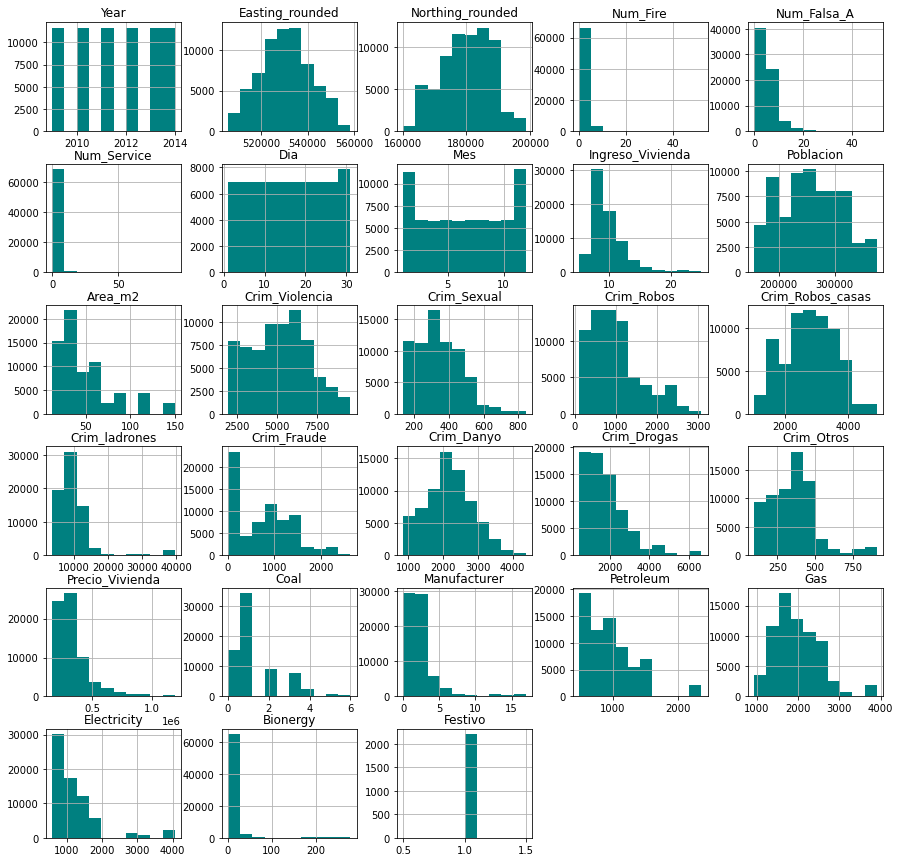

In [ ]:
df.hist(figsize=(15,15), color="#008080")

In [ ]:
# Otra forma de representar la distrubicion tambien muy visual
#df.plot(kind='density', subplots=True, layout=(10,4), sharex=False, figsize=(15,20))
plt.show()

In [ ]:
df.describe()

Year  Easting_rounded  Northing_rounded      Num_Fire  \
count  69914.000000     69914.000000      69914.000000  69914.000000   
mean    2011.497425    530583.066954     180103.854078      2.081700   
std        1.706950     10655.383736       7777.306842      1.863466   
min     2009.000000    505625.000000     160150.000000      0.000000   
25%     2010.000000    523957.250000     174887.000000      1.000000   
50%     2011.000000    530968.000000     180861.000000      2.000000   
75%     2013.000000    537662.000000     185400.000000      3.000000   
max     2014.000000    558350.000000     198700.000000     52.000000   

        Num_Falsa_A   Num_Service          Dia           Mes  \
count  69914.000000  69914.000000  69914.00000  69914.000000   
mean       4.650270      2.909603     15.73220      6.522985   
std        3.448877      2.440694      8.79784      3.447636   
min        0.000000      0.000000      1.00000      1.000000   
25%        2.000000      1.000000      8.00000      4.000000   
50%        4.000000      2.000000     16.00000      7.000000   
75%        6.000000      4.000000     23.00000     10.000000   
max       50.000000     93.000000     31.00000     12.000000   

       Ingreso_Vivienda      Poblacion  ...   Crim_Drogas    Crim_Otros  \
count      69914.000000   69914.000000  ...  69914.000000  69914.000000   
mean           9.307406  257845.189962  ...   1767.756200    357.913065   
std            2.951433   55263.279792  ...   1047.895573    152.861028   
min            5.000000  155995.000000  ...    426.000000     96.000000   
25%            7.000000  216024.000000  ...   1016.000000    247.000000   
50%            8.000000  257775.000000  ...   1557.000000    352.000000   
75%           10.000000  302620.000000  ...   2248.000000    443.000000   
max           25.000000  376040.000000  ...   6637.000000    912.000000   

       Precio_Vivienda          Coal  Manufacturer     Petroleum  \
count     6.991400e+04  69914.000000  69914.000000  69914.000000   
mean      3.367963e+05      1.307421      2.447721    962.217396   
std       1.498031e+05      1.147433      2.556678    379.500507   
min       1.600000e+05      0.000000      0.000000    479.000000   
25%       2.490000e+05      1.000000      1.000000    644.000000   
50%       2.940000e+05      1.000000      2.000000    897.000000   
75%       3.800000e+05      2.000000      3.000000   1170.000000   
max       1.197500e+06      6.000000     17.000000   2364.000000   

                Gas   Electricity      Bionergy  Festivo  
count  69914.000000  69914.000000  69914.000000   2202.0  
mean    1968.953586   1200.820851      8.739966      1.0  
std      555.946399    681.422874     33.965765      0.0  
min      943.000000    586.000000      0.000000      1.0  
25%     1559.000000    770.000000      0.000000      1.0  
50%     1907.000000   1034.000000      0.000000      1.0  
75%     2327.000000   1369.000000      0.000000      1.0  
max     3910.000000   4063.000000    279.000000      1.0  

[8 rows x 28 columns]

## VALORES PERDIDOS

In [ ]:
# Buscamos valores perdidos
df.isna().sum()

Code                     0
Postcode_district        0
Year                     0
ProperCase               0
Easting_rounded          0
Northing_rounded         0
Num_Fire                 0
Num_Falsa_A              0
Num_Service              0
Dia                      0
Mes                      0
Ingreso_Vivienda         0
Poblacion                0
Area_m2                  0
Crim_Violencia           0
Crim_Sexual              0
Crim_Robos               0
Crim_Robos_casas         0
Crim_ladrones            0
Crim_Fraude              0
Crim_Danyo               0
Crim_Drogas              0
Crim_Otros               0
Precio_Vivienda          0
Coal                     0
Manufacturer             0
Petroleum                0
Gas                      0
Electricity              0
Bionergy                 0
Festivo              67712
dtype: int64

In [ ]:
df_test["Festivo"]=df_test["Festivo"].fillna(0)
df_test["Festivo"]

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
11632    0.0
11633    0.0
11634    0.0
11635    0.0
11636    0.0
Name: Festivo, Length: 11637, dtype: float64

In [ ]:
df["Festivo"]=df["Festivo"].fillna(0)
df["Festivo"]

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
69909    0.0
69910    0.0
69911    0.0
69912    0.0
69913    0.0
Name: Festivo, Length: 69914, dtype: float64

In [ ]:
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN

Empty DataFrame
Columns: [Code, Postcode_district, Year, ProperCase, Easting_rounded, Northing_rounded, Num_Fire, Num_Falsa_A, Num_Service, Dia, Mes, Ingreso_Vivienda, Poblacion, Area_m2, Crim_Violencia, Crim_Sexual, Crim_Robos, Crim_Robos_casas, Crim_ladrones, Crim_Fraude, Crim_Danyo, Crim_Drogas, Crim_Otros, Precio_Vivienda, Coal, Manufacturer, Petroleum, Gas, Electricity, Bionergy, Festivo]
Index: []

[0 rows x 31 columns]

In [ ]:
is_NaN = df_test.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df_test[row_has_NaN]
rows_with_NaN

Empty DataFrame
Columns: [Code, Postcode_district, Year, ProperCase, Easting_rounded, Northing_rounded, Num_Fire, Num_Falsa_A, Num_Service, Dia, Mes, Ingreso_Vivienda, Poblacion, Area_m2, Crim_Violencia, Crim_Sexual, Crim_Robos, Crim_Robos_casas, Crim_ladrones, Crim_Fraude, Crim_Danyo, Crim_Drogas, Crim_Otros, Precio_Vivienda, Coal, Manufacturer, Petroleum, Gas, Electricity, Bionergy, Festivo]
Index: []

[0 rows x 31 columns]

## VALORES CATEGORICOS

In [ ]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69914 entries, 0 to 69913
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Code               69914 non-null  object 
 1   Postcode_district  69914 non-null  object 
 2   Year               69914 non-null  int32  
 3   ProperCase         69914 non-null  object 
 4   Easting_rounded    69914 non-null  int32  
 5   Northing_rounded   69914 non-null  int32  
 6   Num_Fire           69914 non-null  int64  
 7   Num_Falsa_A        69914 non-null  int64  
 8   Num_Service        69914 non-null  int64  
 9   Dia                69914 non-null  int32  
 10  Mes                69914 non-null  int32  
 11  Ingreso_Vivienda   69914 non-null  int32  
 12  Poblacion          69914 non-null  int32  
 13  Area_m2            69914 non-null  int32  
 14  Crim_Violencia     69914 non-null  int32  
 15  Crim_Sexual        69914 non-null  int32  
 16  Crim_Robos         699

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11637 entries, 0 to 11636
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Code               11637 non-null  object 
 1   Postcode_district  11637 non-null  object 
 2   Year               11637 non-null  int32  
 3   ProperCase         11637 non-null  object 
 4   Easting_rounded    11637 non-null  int32  
 5   Northing_rounded   11637 non-null  int32  
 6   Num_Fire           11637 non-null  int64  
 7   Num_Falsa_A        11637 non-null  int64  
 8   Num_Service        11637 non-null  int64  
 9   Dia                11637 non-null  int32  
 10  Mes                11637 non-null  int32  
 11  Ingreso_Vivienda   11637 non-null  int32  
 12  Poblacion          11637 non-null  int32  
 13  Area_m2            11637 non-null  int32  
 14  Crim_Violencia     11637 non-null  int32  
 15  Crim_Sexual        11637 non-null  int32  
 16  Crim_Robos         116

In [ ]:
labelencoder=LabelEncoder()
df["Code_C"] = labelencoder.fit_transform(df["Code"])

df_test["Code_C"] = labelencoder.fit_transform(df_test["Code"])

df

Code Postcode_district  Year            ProperCase  \
0      E09000002               RM8  2009  Barking And dagenham   
1      E09000003               N12  2009                Barnet   
2      E09000004               DA5  2009                Bexley   
3      E09000005               W10  2009                 Brent   
4      E09000006              SE26  2009               Bromley   
...          ...               ...   ...                   ...   
69909  E09000027              TW12  2014  Richmond Upon thames   
69910  E09000028               SE5  2014             Southwark   
69911  E09000030                E1  2014         Tower Hamlets   
69912  E09000032              SW11  2014            Wandsworth   
69913  E09000033              SW1V  2014           Westminster   

       Easting_rounded  Northing_rounded  Num_Fire  Num_Falsa_A  Num_Service  \
0               547300            185121         8            4            2   
1               523620            191960         1            7            2   
2               548730            177890         2            1            2   
3               521930            184950         4            4            2   
4               538550            169331         3            6            2   
...                ...               ...       ...          ...          ...   
69909           514250            170950         1            0            0   
69910           532750            177750         2            0            0   
69911           535650            181150         1            1            0   
69912           527000            175200         0            2            0   
69913           529383            179283         0            3            0   

       Dia  ...  Crim_Otros  Precio_Vivienda  Coal  Manufacturer  Petroleum  \
0        1  ...         352           160000     3            17        772   
1        1  ...         308           290000     1             2       1506   
2        1  ...         176           196000     1             2       1032   
3        1  ...         374           275000     0             1        897   
4        1  ...         323           249000     3             3       1246   
...    ...  ...         ...              ...   ...           ...        ...   
69909    3  ...         194           534995     1             2        714   
69910    3  ...         536           420000     1             2        847   
69911    3  ...         574           385000     1             1       1005   
69912    3  ...         441           532250     0             1        839   
69913    3  ...         863           875000     1             3       1251   

        Gas  Electricity  Bionergy  Festivo  Code_C  
0      1046          722        22      1.0       0  
1      2992         1197         0      1.0       1  
2      2103          806        26      1.0       2  
3      2214         1246         0      1.0       3  
4      2661         1057         1      1.0       4  
...     ...          ...       ...      ...     ...  
69909  1534          761         0      0.0      25  
69910  1851         1483         0      0.0      26  
69911  1299         2940        34      0.0      28  
69912  2098         1057         0      0.0      30  
69913  3040         3988         0      0.0      31  

[69914 rows x 32 columns]

In [ ]:
labelencoder=LabelEncoder()
df["Distrito_C"] = labelencoder.fit_transform(df["Postcode_district"])

df_test["Distrito_C"] = labelencoder.fit_transform(df_test["Postcode_district"])

df

Code Postcode_district  Year            ProperCase  \
0      E09000002               RM8  2009  Barking And dagenham   
1      E09000003               N12  2009                Barnet   
2      E09000004               DA5  2009                Bexley   
3      E09000005               W10  2009                 Brent   
4      E09000006              SE26  2009               Bromley   
...          ...               ...   ...                   ...   
69909  E09000027              TW12  2014  Richmond Upon thames   
69910  E09000028               SE5  2014             Southwark   
69911  E09000030                E1  2014         Tower Hamlets   
69912  E09000032              SW11  2014            Wandsworth   
69913  E09000033              SW1V  2014           Westminster   

       Easting_rounded  Northing_rounded  Num_Fire  Num_Falsa_A  Num_Service  \
0               547300            185121         8            4            2   
1               523620            191960         1            7            2   
2               548730            177890         2            1            2   
3               521930            184950         4            4            2   
4               538550            169331         3            6            2   
...                ...               ...       ...          ...          ...   
69909           514250            170950         1            0            0   
69910           532750            177750         2            0            0   
69911           535650            181150         1            1            0   
69912           527000            175200         0            2            0   
69913           529383            179283         0            3            0   

       Dia  ...  Precio_Vivienda  Coal  Manufacturer  Petroleum   Gas  \
0        1  ...           160000     3            17        772  1046   
1        1  ...           290000     1             2       1506  2992   
2        1  ...           196000     1             2       1032  2103   
3        1  ...           275000     0             1        897  2214   
4        1  ...           249000     3             3       1246  2661   
...    ...  ...              ...   ...           ...        ...   ...   
69909    3  ...           534995     1             2        714  1534   
69910    3  ...           420000     1             2        847  1851   
69911    3  ...           385000     1             1       1005  1299   
69912    3  ...           532250     0             1        839  2098   
69913    3  ...           875000     1             3       1251  3040   

       Electricity  Bionergy  Festivo  Code_C  Distrito_C  
0              722        22      1.0       0         142  
1             1197         0      1.0       1          99  
2              806        26      1.0       2          24  
3             1246         0      1.0       3         235  
4             1057         1      1.0       4         162  
...            ...       ...      ...     ...         ...  
69909          761         0      0.0      25         211  
69910         1483         0      0.0      26         167  
69911         2940        34      0.0      28          28  
69912         1057         0      0.0      30         180  
69913         3988         0      0.0      31         193  

[69914 rows x 33 columns]

In [ ]:
labelencoder=LabelEncoder()
df["ProperCase_C"] = labelencoder.fit_transform(df["ProperCase"])

df_test["ProperCase_C"] = labelencoder.fit_transform(df_test["ProperCase"])

df

Code Postcode_district  Year            ProperCase  \
0      E09000002               RM8  2009  Barking And dagenham   
1      E09000003               N12  2009                Barnet   
2      E09000004               DA5  2009                Bexley   
3      E09000005               W10  2009                 Brent   
4      E09000006              SE26  2009               Bromley   
...          ...               ...   ...                   ...   
69909  E09000027              TW12  2014  Richmond Upon thames   
69910  E09000028               SE5  2014             Southwark   
69911  E09000030                E1  2014         Tower Hamlets   
69912  E09000032              SW11  2014            Wandsworth   
69913  E09000033              SW1V  2014           Westminster   

       Easting_rounded  Northing_rounded  Num_Fire  Num_Falsa_A  Num_Service  \
0               547300            185121         8            4            2   
1               523620            191960         1            7            2   
2               548730            177890         2            1            2   
3               521930            184950         4            4            2   
4               538550            169331         3            6            2   
...                ...               ...       ...          ...          ...   
69909           514250            170950         1            0            0   
69910           532750            177750         2            0            0   
69911           535650            181150         1            1            0   
69912           527000            175200         0            2            0   
69913           529383            179283         0            3            0   

       Dia  ...  Coal  Manufacturer  Petroleum   Gas  Electricity  Bionergy  \
0        1  ...     3            17        772  1046          722        22   
1        1  ...     1             2       1506  2992         1197         0   
2        1  ...     1             2       1032  2103          806        26   
3        1  ...     0             1        897  2214         1246         0   
4        1  ...     3             3       1246  2661         1057         1   
...    ...  ...   ...           ...        ...   ...          ...       ...   
69909    3  ...     1             2        714  1534          761         0   
69910    3  ...     1             2        847  1851         1483         0   
69911    3  ...     1             1       1005  1299         2940        34   
69912    3  ...     0             1        839  2098         1057         0   
69913    3  ...     1             3       1251  3040         3988         0   

       Festivo  Code_C  Distrito_C  ProperCase_C  
0          1.0       0         142             0  
1          1.0       1          99             1  
2          1.0       2          24             2  
3          1.0       3         235             3  
4          1.0       4         162             4  
...        ...     ...         ...           ...  
69909      0.0      25         211            25  
69910      0.0      26         167            26  
69911      0.0      28          28            28  
69912      0.0      30         180            30  
69913      0.0      31         193            31  

[69914 rows x 34 columns]

## CORRELACIONES

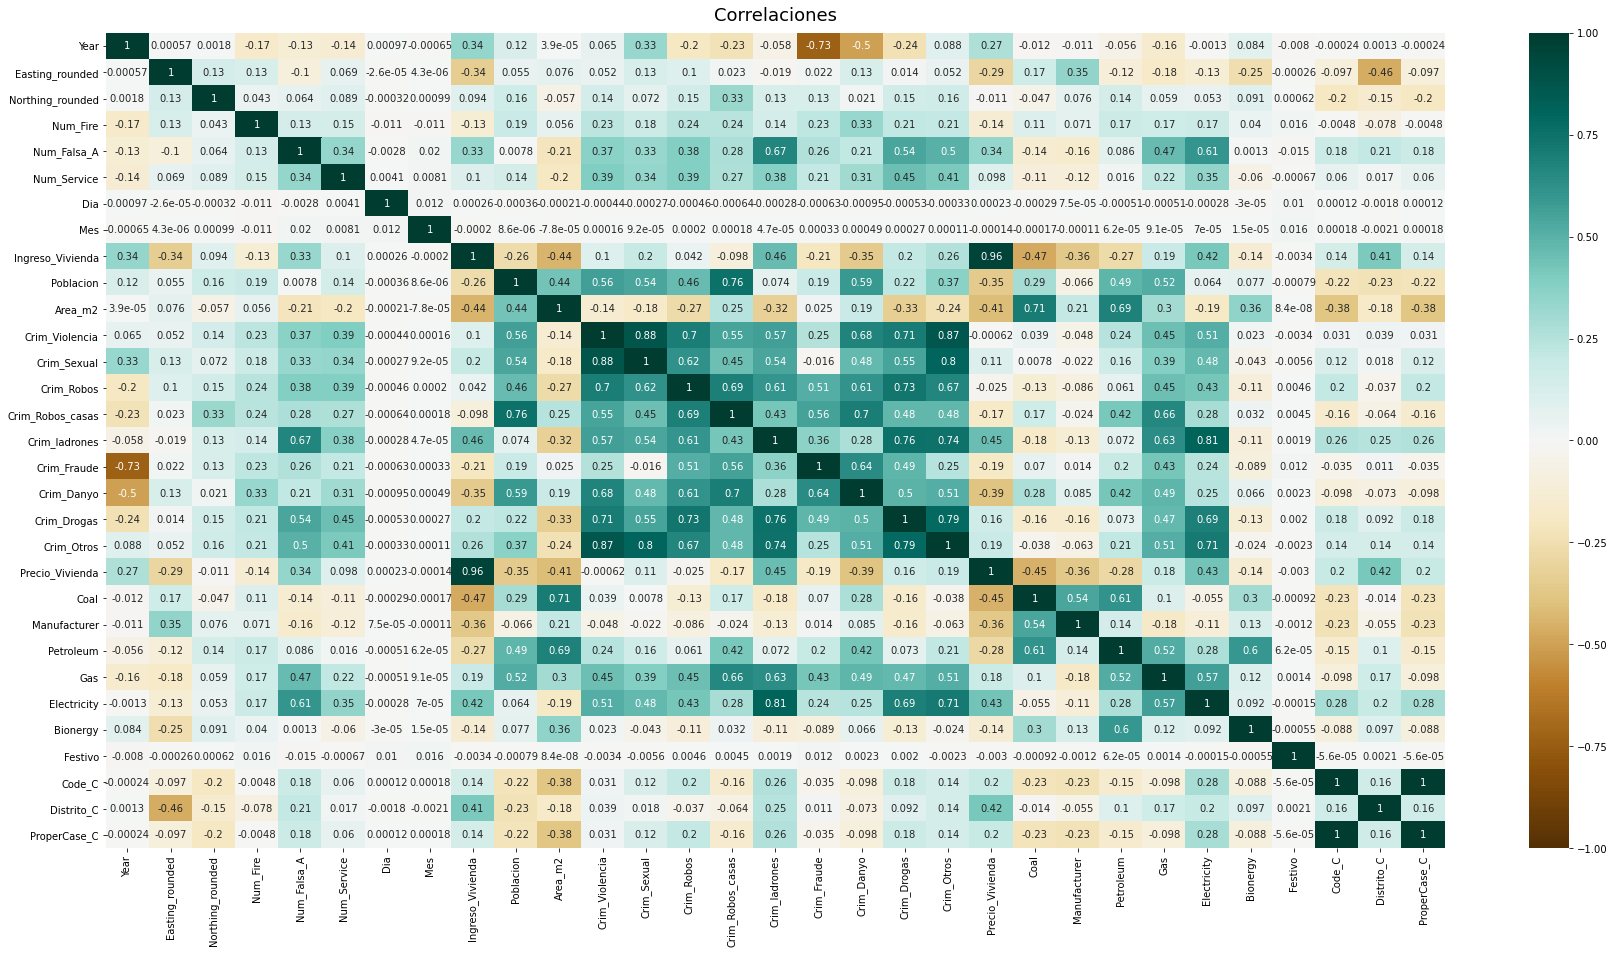

In [ ]:
plt.figure(figsize=(30, 15))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlaciones', fontdict={'fontsize':18}, pad=12);
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

0.00-0.19: very weak

0.20-0.39: weak

0.40-0.59: moderate 

0.60-0.79: strong

0.80-1.00: very strong

In [ ]:
#>0.75
df_correl=["Crim_Robos_casas", "Precio_Vivienda", "Crim_Sexual", "Crim_ladrones", "Crim_Violencia","Crim_Drogas", "ProperCase_C","ProperCase"]
df.drop(df_correl, inplace=True, axis=1)
df_test.drop(df_correl, inplace=True, axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69914 entries, 0 to 69913
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Code               69914 non-null  object 
 1   Postcode_district  69914 non-null  object 
 2   Year               69914 non-null  int32  
 3   Easting_rounded    69914 non-null  int32  
 4   Northing_rounded   69914 non-null  int32  
 5   Num_Fire           69914 non-null  int64  
 6   Num_Falsa_A        69914 non-null  int64  
 7   Num_Service        69914 non-null  int64  
 8   Dia                69914 non-null  int32  
 9   Mes                69914 non-null  int32  
 10  Ingreso_Vivienda   69914 non-null  int32  
 11  Poblacion          69914 non-null  int32  
 12  Area_m2            69914 non-null  int32  
 13  Crim_Robos         69914 non-null  int32  
 14  Crim_Fraude        69914 non-null  int32  
 15  Crim_Danyo         69914 non-null  int32  
 16  Crim_Otros         699

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11637 entries, 0 to 11636
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Code               11637 non-null  object 
 1   Postcode_district  11637 non-null  object 
 2   Year               11637 non-null  int32  
 3   Easting_rounded    11637 non-null  int32  
 4   Northing_rounded   11637 non-null  int32  
 5   Num_Fire           11637 non-null  int64  
 6   Num_Falsa_A        11637 non-null  int64  
 7   Num_Service        11637 non-null  int64  
 8   Dia                11637 non-null  int32  
 9   Mes                11637 non-null  int32  
 10  Ingreso_Vivienda   11637 non-null  int32  
 11  Poblacion          11637 non-null  int32  
 12  Area_m2            11637 non-null  int32  
 13  Crim_Robos         11637 non-null  int32  
 14  Crim_Fraude        11637 non-null  int32  
 15  Crim_Danyo         11637 non-null  int32  
 16  Crim_Otros         116

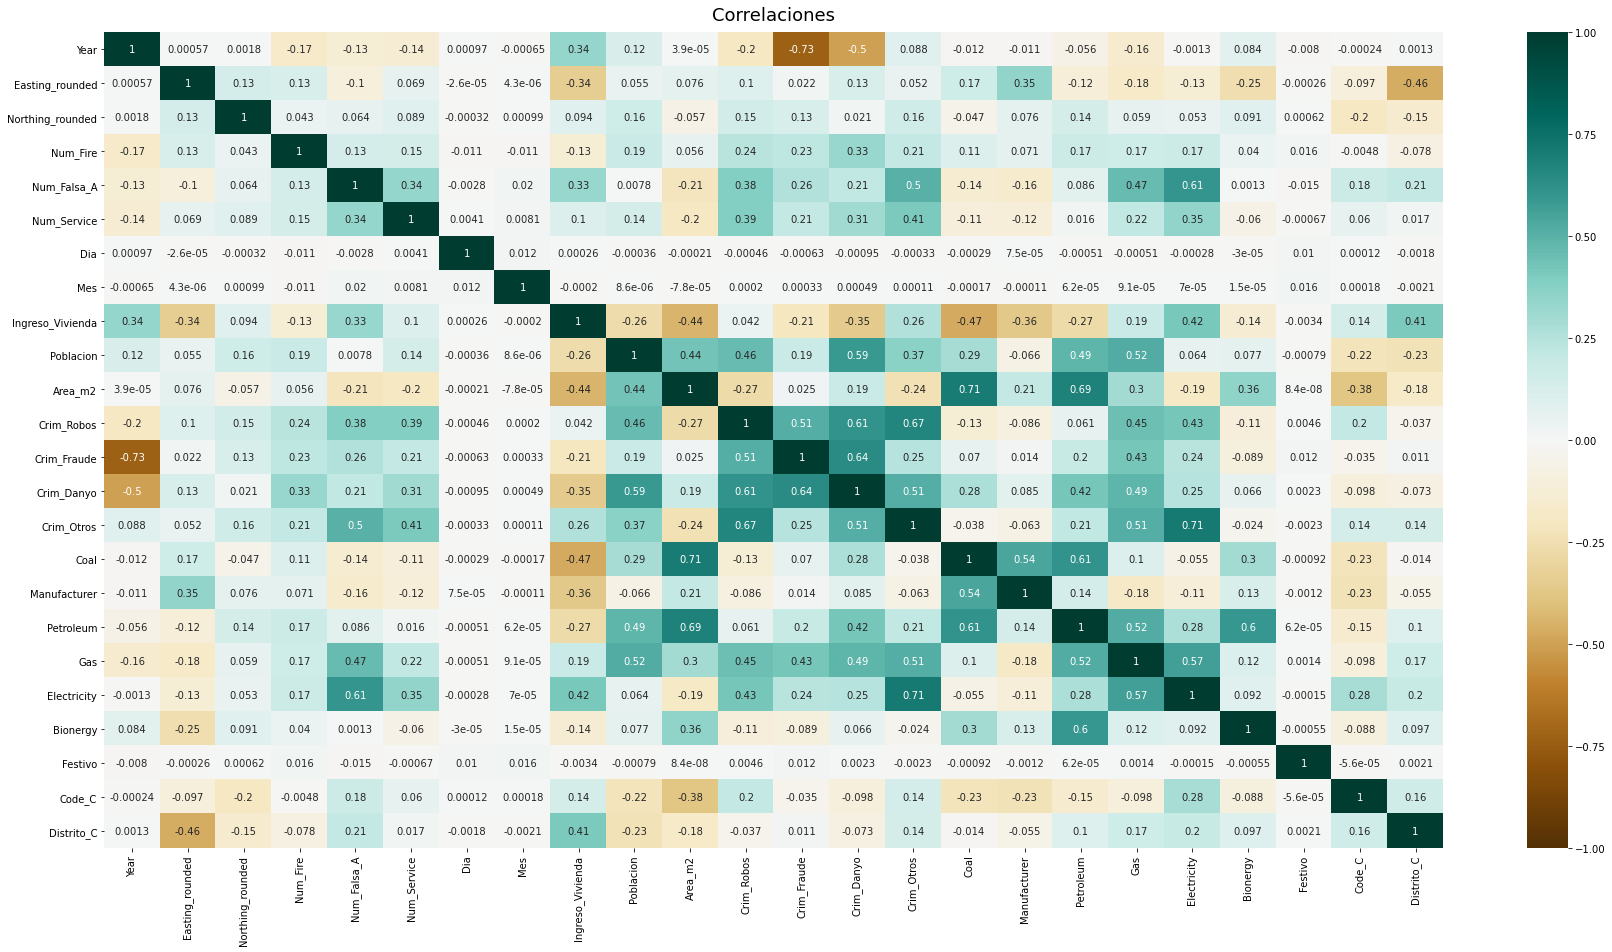

In [ ]:
plt.figure(figsize=(30, 15))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlaciones', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69914 entries, 0 to 69913
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Code               69914 non-null  object 
 1   Postcode_district  69914 non-null  object 
 2   Year               69914 non-null  int32  
 3   Easting_rounded    69914 non-null  int32  
 4   Northing_rounded   69914 non-null  int32  
 5   Num_Fire           69914 non-null  int64  
 6   Num_Falsa_A        69914 non-null  int64  
 7   Num_Service        69914 non-null  int64  
 8   Dia                69914 non-null  int32  
 9   Mes                69914 non-null  int32  
 10  Ingreso_Vivienda   69914 non-null  int32  
 11  Poblacion          69914 non-null  int32  
 12  Area_m2            69914 non-null  int32  
 13  Crim_Robos         69914 non-null  int32  
 14  Crim_Fraude        69914 non-null  int32  
 15  Crim_Danyo         69914 non-null  int32  
 16  Crim_Otros         699

## OUTLIERS

In [ ]:
#for column in df:
#  if column != "code":
#    plt.figure()
#    df.boxplot([column])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69914 entries, 0 to 69913
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Code               69914 non-null  object 
 1   Postcode_district  69914 non-null  object 
 2   Year               69914 non-null  int32  
 3   Easting_rounded    69914 non-null  int32  
 4   Northing_rounded   69914 non-null  int32  
 5   Num_Fire           69914 non-null  int64  
 6   Num_Falsa_A        69914 non-null  int64  
 7   Num_Service        69914 non-null  int64  
 8   Dia                69914 non-null  int32  
 9   Mes                69914 non-null  int32  
 10  Ingreso_Vivienda   69914 non-null  int32  
 11  Poblacion          69914 non-null  int32  
 12  Area_m2            69914 non-null  int32  
 13  Crim_Robos         69914 non-null  int32  
 14  Crim_Fraude        69914 non-null  int32  
 15  Crim_Danyo         69914 non-null  int32  
 16  Crim_Otros         699

<AxesSubplot:xlabel='Easting_rounded'>

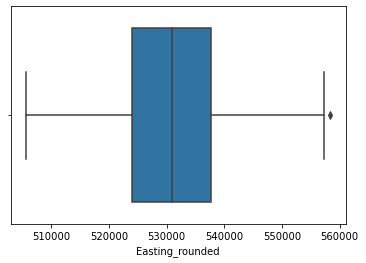

In [ ]:
sns.boxplot(x=df["Easting_rounded"])


In [ ]:
#df.loc[(df["Easting_rounded"]>555000)].count()


<AxesSubplot:>

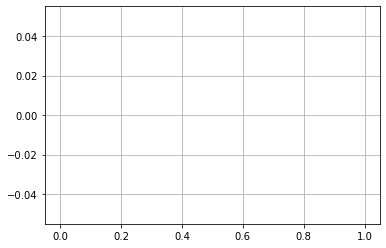

In [ ]:
df.loc[(df["Easting_rounded"]>560000)]["Code_C"].hist()

In [ ]:
df.loc[(df["Easting_rounded"]<510000)].count()

Code                 2195
Postcode_district    2195
Year                 2195
Easting_rounded      2195
Northing_rounded     2195
Num_Fire             2195
Num_Falsa_A          2195
Num_Service          2195
Dia                  2195
Mes                  2195
Ingreso_Vivienda     2195
Poblacion            2195
Area_m2              2195
Crim_Robos           2195
Crim_Fraude          2195
Crim_Danyo           2195
Crim_Otros           2195
Coal                 2195
Manufacturer         2195
Petroleum            2195
Gas                  2195
Electricity          2195
Bionergy             2195
Festivo              2195
Code_C               2195
Distrito_C           2195
dtype: int64

<AxesSubplot:>

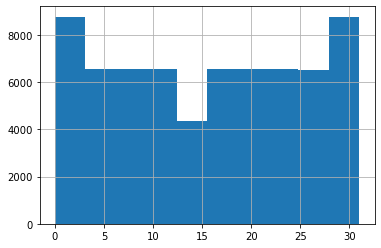

In [ ]:
#df.loc[(df["Easting_rounded"]>510000)].groupby("Llamadas_Code").count()
df.loc[(df["Easting_rounded"]>510000)]["Code_C"].hist()

<AxesSubplot:xlabel='Northing_rounded'>

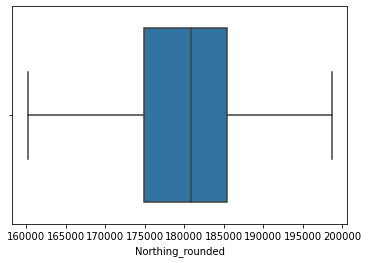

In [ ]:
sns.boxplot(x=df["Northing_rounded"])

In [ ]:
#df.loc[(df["Northing_rounded"]<165000)].count()

In [ ]:
#df.loc[(df["Northing_rounded"]>195000)].count()

<AxesSubplot:xlabel='Ingreso_Vivienda'>

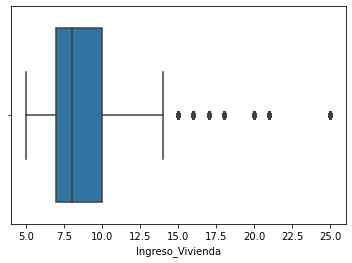

In [ ]:
sns.boxplot(x=df["Ingreso_Vivienda"])

In [ ]:
#df.loc[(df["Ingreso_Vivienda"]>17)].count()

<AxesSubplot:xlabel='Poblacion'>

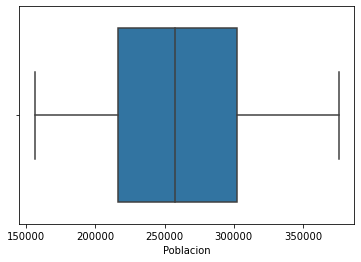

In [ ]:
sns.boxplot(x=df["Poblacion"])

<AxesSubplot:xlabel='Area_m2'>

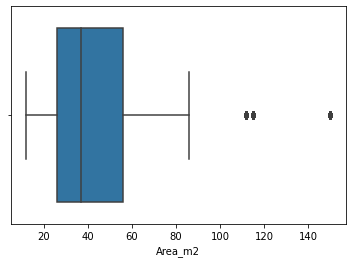

In [ ]:
sns.boxplot(x=df["Area_m2"])

In [ ]:
#df.loc[(df["Area_m2"]>90)].count()

In [ ]:
#df.loc[(df["Crim_Robos"]>2600)].count()

<AxesSubplot:xlabel='Crim_Danyo'>

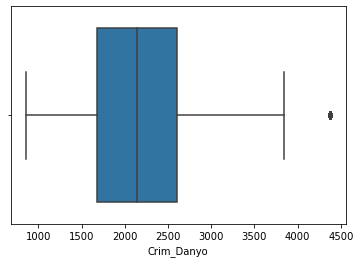

In [ ]:
sns.boxplot(x=df["Crim_Danyo"])

In [ ]:
#df.loc[(df["Crim_Danyo"]>3800)].count()

<AxesSubplot:xlabel='Coal'>

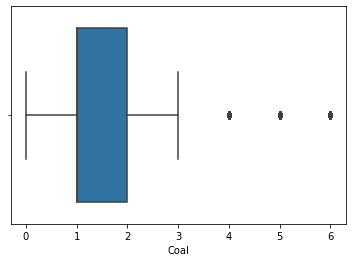

In [ ]:
sns.boxplot(x=df["Coal"])

<AxesSubplot:xlabel='Manufacturer'>

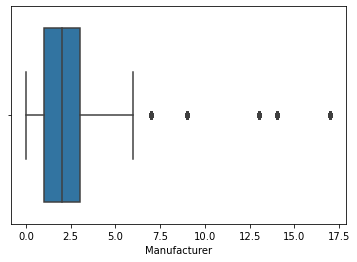

In [ ]:
sns.boxplot(x=df["Manufacturer"])

<AxesSubplot:xlabel='Petroleum'>

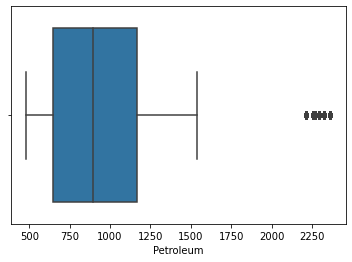

In [ ]:
sns.boxplot(x=df["Petroleum"])

<AxesSubplot:xlabel='Gas'>

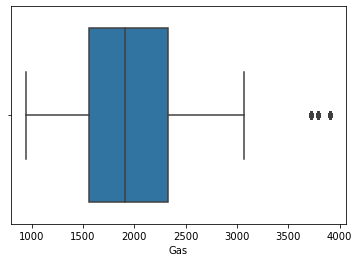

In [ ]:
sns.boxplot(x=df["Gas"])

<AxesSubplot:xlabel='Electricity'>

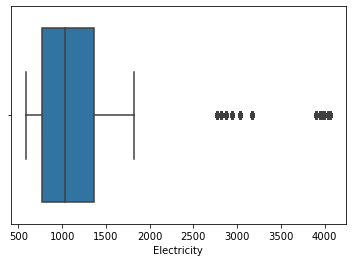

In [ ]:
sns.boxplot(x=df["Electricity"])

<AxesSubplot:xlabel='Bionergy'>

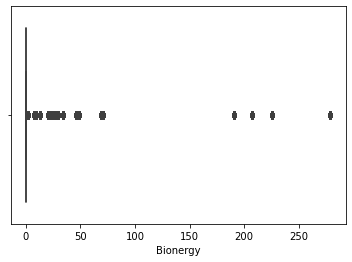

In [ ]:
sns.boxplot(x=df["Bionergy"])

<AxesSubplot:xlabel='Distrito_C'>

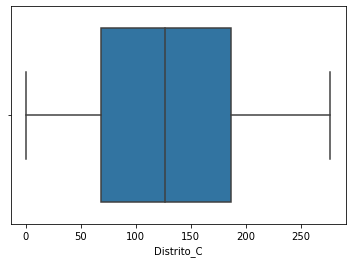

In [ ]:
sns.boxplot(x=df["Distrito_C"])

In [ ]:
df.columns

Index(['Code', 'Postcode_district', 'Year', 'Easting_rounded',
       'Northing_rounded', 'Num_Fire', 'Num_Falsa_A', 'Num_Service', 'Dia',
       'Mes', 'Ingreso_Vivienda', 'Poblacion', 'Area_m2', 'Crim_Robos',
       'Crim_Fraude', 'Crim_Danyo', 'Crim_Otros', 'Coal', 'Manufacturer',
       'Petroleum', 'Gas', 'Electricity', 'Bionergy', 'Festivo', 'Code_C',
       'Distrito_C'],
      dtype='object')

In [ ]:
def replace_outlier(val, mean, IRQ):
    if val < Q1 - 1.5*IRQ:
        return Q1 - 1.5*IRQ 
    elif val > Q2 + 1.5*IRQ:
        return Q2 + 1.5*IRQ
    return val

colum_outlier= df[["Easting_rounded","Northing_rounded","Ingreso_Vivienda","Area_m2","Crim_Otros","Crim_Otros","Coal","Manufacturer","Petroleum","Gas","Electricity","Bionergy"]]

for col in colum_outlier:
   if col != "Post":
    mean = df[col].mean()
    Q1=df[col].quantile(0.25)
    Q2=df[col].quantile(0.75)
    IRQ= Q2-Q1
    df[col] = df[col].map(lambda x: replace_outlier(x, mean, IRQ)) 

for col in colum_outlier:
   if col != "Post":
    mean = df_test[col].mean()
    Q1=df_test[col].quantile(0.25)
    Q2=df_test[col].quantile(0.75)
    IRQ= Q2-Q1
    df_test[col] = df_test[col].map(lambda x: replace_outlier(x, mean, IRQ)) 


# DATASET ALGORITMOS

In [3]:
#Descarga del dataset
#df.to_csv('df.csv') 
#files.download('df.csv')

#Jupyter
#df.to_csv("df.csv")

In [4]:
#df_test.to_csv('df_test.csv') 
#files.download('df_test.csv')

#Jupyter
#df_test.to_csv("df_test.csv")

In [5]:
df = pd.read_csv('/gdrive/My Drive/TFM-Roberto_Hernandez/datasets/df.csv')

#df = pd.read_csv("C:/Users/rhgim/Desktop/tfm/datasets//df.csv")
df

Unnamed: 0       Code Postcode_district  ...  Festivo  Code_C  Distrito_C
0               0  E09000002               RM8  ...      1.0       0         142
1               1  E09000003               N12  ...      1.0       1          99
2               2  E09000004               DA5  ...      1.0       2          24
3               3  E09000005               W10  ...      1.0       3         235
4               4  E09000006              SE26  ...      1.0       4         162
...           ...        ...               ...  ...      ...     ...         ...
69909       69909  E09000027              TW12  ...      0.0      25         211
69910       69910  E09000028               SE5  ...      0.0      26         167
69911       69911  E09000030                E1  ...      0.0      28          28
69912       69912  E09000032              SW11  ...      0.0      30         180
69913       69913  E09000033              SW1V  ...      0.0      31         193

[69914 rows x 27 columns]

In [6]:
df_test = pd.read_csv('/gdrive/My Drive/TFM-Roberto_Hernandez/datasets/df_test.csv')
#df_test = pd.read_csv('C:/Users/rhgim/Desktop/tfm/datasets/df_test.csv')
df_test

Unnamed: 0       Code Postcode_district  ...  Festivo  Code_C  Distrito_C
0               0  E09000002               RM6  ...      1.0       0         131
1               1  E09000003               N12  ...      1.0       1          91
2               2  E09000004              DA14  ...      1.0       2          16
3               3  E09000005              NW10  ...      1.0       3         112
4               4  E09000006               BR2  ...      1.0       4           1
...           ...        ...               ...  ...      ...     ...         ...
11632       11632  E09000029               SM6  ...      0.0      27         168
11633       11633  E09000030                E3  ...      0.0      28          38
11634       11634  E09000031               E17  ...      0.0      29          33
11635       11635  E09000032              SW17  ...      0.0      30         177
11636       11636  E09000033               W1S  ...      0.0      31         238

[11637 rows x 27 columns]

In [7]:
train_C=pd.DataFrame()
train=df.drop(["Unnamed: 0","Code","Postcode_district"], axis=1)
train_C[["Code","Postcode_district"]]=df[["Code","Postcode_district"]]

test_C=pd.DataFrame()
test=df_test.drop(["Unnamed: 0","Code","Postcode_district"], axis=1)
test_C[["Code","Postcode_district",]]=df_test[["Code","Postcode_district"]]

# MINERIA DE DATOS

Quitamos las variables del no supervisado

In [ ]:
#quitamos las variables del no supervisado
df_ns=train.drop(['Num_Fire',"Num_Falsa_A"], axis=1)
df_ns_C=train_C

NameError: ignored

In [ ]:
#quitamos las variables del no supervisado
df_ns_test=test.drop(['Num_Fire',"Num_Falsa_A", "Num_Service"], axis=1)


NameError: ignored

In [ ]:
df_ns.info()

## PCA

In [ ]:
#Librerias
from sklearn import preprocessing 
from sklearn.decomposition import PCA
from matplotlib.pyplot import cm
from matplotlib.axes._axes import _log as matplotlib_axes_logger

In [ ]:
#Normalizado de los datos
min_max_scaler = preprocessing.MinMaxScaler()
features_norm = min_max_scaler.fit_transform(df_ns)

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
features_norm_test = min_max_scaler.fit_transform(df_ns_test)

In [ ]:
#Creacion de la PCA
pca=PCA()  
pca.n_components=22  
pca_data=pca.fit_transform(features_norm)
percentage_var_explained = pca.explained_variance_ratio_;  
cum_var_explained=np.cumsum(percentage_var_explained)
#plot PCA spectrum   
plt.figure(1,figsize=(6,4))
plt.clf()  
plt.plot(cum_var_explained,linewidth=2)  
plt.axis('tight')  
plt.grid() 
plt.xlabel('numero componentes') 
plt.ylabel('Varainza explicada acumulada')  
plt.show()

In [ ]:
#Aplico la PCA para 9 componentes

estimator = PCA (n_components = 9)
X_pca = estimator.fit_transform(features_norm)
print("Variance Ratio: ", estimator.explained_variance_ratio_) 
print("Explicado con nueve variables ", estimator.explained_variance_ratio_[0]+estimator.explained_variance_ratio_[1]+estimator.explained_variance_ratio_[2]+estimator.explained_variance_ratio_[3]+estimator.explained_variance_ratio_[4]+estimator.explained_variance_ratio_[5]+estimator.explained_variance_ratio_[6]+estimator.explained_variance_ratio_[7]+estimator.explained_variance_ratio_[8])

In [ ]:
estimator = PCA (n_components = 9)
X_pca_test = estimator.fit_transform(features_norm_test)
print("Variance Ratio: ", estimator.explained_variance_ratio_) 
print("Explicado con nueve variables ", estimator.explained_variance_ratio_[0]+estimator.explained_variance_ratio_[1]+estimator.explained_variance_ratio_[2]+estimator.explained_variance_ratio_[3]+estimator.explained_variance_ratio_[4]+estimator.explained_variance_ratio_[5]+estimator.explained_variance_ratio_[6]+estimator.explained_variance_ratio_[7]+estimator.explained_variance_ratio_[8])

In [ ]:
#Graficamos el peso que tiene cada columna sobre el dataset
df_pca = pd.DataFrame({"lab":['PC 1', 'PC 2','PC 3', 'PC 4','PC 5','PC 6', 'PC 7','PC 8','PC 9'], "val": estimator.explained_variance_ratio_ ,})


ax = df_pca.plot.bar(x='lab', y='val', rot=0)

In [ ]:
#Creamos un dataset con el array de la PCA y las columnas creadas
df_pca = pd.DataFrame(data = X_pca
             , columns = ['principal componente 1', 'principal componente 2', 'principal componente 3',
                          'principal componente 4','principal componente 5','principal componente 6',
                          'principal componente 7','principal componente 8','principal componente 9'])

In [ ]:
#Creamos un dataset con el array de la PCA y las columnas creadas
df_pca_test = pd.DataFrame(data = X_pca_test
             , columns = ['principal componente 1', 'principal componente 2', 'principal componente 3',
                          'principal componente 4','principal componente 5','principal componente 6',
                          'principal componente 7','principal componente 8','principal componente 9'])

### PCA-Barrios


In [ ]:
#Creamos un dataset con la pca y anadimos la columna categorica "Code"
finalDf = pd.concat([df_pca, df_ns_C[['Code']]], axis = 1)
finalDf

In [ ]:
#Visualizamos la PCA con los componentes 1 y 2, y etiquetamos la columna "Code"
matplotlib_axes_logger.setLevel('ERROR')
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 2', fontsize = 10)
ax.set_title('PCA', fontsize = 20)
targets = ['E09000002', 'E09000033', 'E09000013', 'E09000026', 'E09000014',
       'E09000027', 'E09000017', 'E09000019', 'E09000025', 'E09000029',
       'E09000018', 'E09000032', 'E09000023', 'E09000007', 'E09000004',
       'E09000030', 'E09000006', 'E09000022', 'E09000011', 'E09000010',
       'E09000008', 'E09000020', 'E09000005', 'E09000028', 'E09000003',
       'E09000021', 'E09000031', 'E09000015', 'E09000012', 'E09000016',
       'E09000024', 'E09000009']
colors = sns.color_palette("cubehelix", 32)

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Code'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal componente 1']
               , finalDf.loc[indicesToKeep, 'principal componente 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
#Visualizamos la PCA con los componentes 1 y 3, y etiquetamos la columna "Code"
matplotlib_axes_logger.setLevel('ERROR')
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 3', fontsize = 10)
ax.set_title('PCA', fontsize = 20)
targets = ['E09000002', 'E09000033', 'E09000013', 'E09000026', 'E09000014',
       'E09000027', 'E09000017', 'E09000019', 'E09000025', 'E09000029',
       'E09000018', 'E09000032', 'E09000023', 'E09000007', 'E09000004',
       'E09000030', 'E09000006', 'E09000022', 'E09000011', 'E09000010',
       'E09000008', 'E09000020', 'E09000005', 'E09000028', 'E09000003',
       'E09000021', 'E09000031', 'E09000015', 'E09000012', 'E09000016',
       'E09000024', 'E09000009']
colors = sns.color_palette("cubehelix", 32)

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Code'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal componente 1']
               , finalDf.loc[indicesToKeep, 'principal componente 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
#Visualizamos la PCA con los componentes 1 y 4, y etiquetamos la columna "Code"
matplotlib_axes_logger.setLevel('ERROR')
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 4', fontsize = 10)
ax.set_title('PCA', fontsize = 20)
targets = ['E09000002', 'E09000033', 'E09000013', 'E09000026', 'E09000014',
       'E09000027', 'E09000017', 'E09000019', 'E09000025', 'E09000029',
       'E09000018', 'E09000032', 'E09000023', 'E09000007', 'E09000004',
       'E09000030', 'E09000006', 'E09000022', 'E09000011', 'E09000010',
       'E09000008', 'E09000020', 'E09000005', 'E09000028', 'E09000003',
       'E09000021', 'E09000031', 'E09000015', 'E09000012', 'E09000016',
       'E09000024', 'E09000009']
colors = sns.color_palette("cubehelix", 32)

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Code'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal componente 1']
               , finalDf.loc[indicesToKeep, 'principal componente 4']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
#Visualizamos la PCA con los componentes 2 y 3, y etiquetamos la columna "Code"
matplotlib_axes_logger.setLevel('ERROR')
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 2', fontsize = 10)
ax.set_ylabel('Principal Component 3', fontsize = 10)
ax.set_title('PCA', fontsize = 20)
targets = ['E09000002', 'E09000033', 'E09000013', 'E09000026', 'E09000014',
       'E09000027', 'E09000017', 'E09000019', 'E09000025', 'E09000029',
       'E09000018', 'E09000032', 'E09000023', 'E09000007', 'E09000004',
       'E09000030', 'E09000006', 'E09000022', 'E09000011', 'E09000010',
       'E09000008', 'E09000020', 'E09000005', 'E09000028', 'E09000003',
       'E09000021', 'E09000031', 'E09000015', 'E09000012', 'E09000016',
       'E09000024', 'E09000009']
colors = sns.color_palette("cubehelix", 32)

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Code'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal componente 2']
               , finalDf.loc[indicesToKeep, 'principal componente 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
#Visualizamos la PCA con los componentes 2 y 4, y etiquetamos la columna "Code"
matplotlib_axes_logger.setLevel('ERROR')
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 2', fontsize = 10)
ax.set_ylabel('Principal Component 4', fontsize = 10)
ax.set_title('PCA', fontsize = 20)
targets = ['E09000002', 'E09000033', 'E09000013', 'E09000026', 'E09000014',
       'E09000027', 'E09000017', 'E09000019', 'E09000025', 'E09000029',
       'E09000018', 'E09000032', 'E09000023', 'E09000007', 'E09000004',
       'E09000030', 'E09000006', 'E09000022', 'E09000011', 'E09000010',
       'E09000008', 'E09000020', 'E09000005', 'E09000028', 'E09000003',
       'E09000021', 'E09000031', 'E09000015', 'E09000012', 'E09000016',
       'E09000024', 'E09000009']
colors = sns.color_palette("cubehelix", 32)

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Code'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal componente 2']
               , finalDf.loc[indicesToKeep, 'principal componente 4']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
#Visualizamos la PCA con los componentes 3 y 4, y etiquetamos la columna "Code"
matplotlib_axes_logger.setLevel('ERROR')
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 3', fontsize = 10)
ax.set_ylabel('Principal Component 4', fontsize = 10)
ax.set_title('PCA', fontsize = 20)
targets = ['E09000002', 'E09000033', 'E09000013', 'E09000026', 'E09000014',
       'E09000027', 'E09000017', 'E09000019', 'E09000025', 'E09000029',
       'E09000018', 'E09000032', 'E09000023', 'E09000007', 'E09000004',
       'E09000030', 'E09000006', 'E09000022', 'E09000011', 'E09000010',
       'E09000008', 'E09000020', 'E09000005', 'E09000028', 'E09000003',
       'E09000021', 'E09000031', 'E09000015', 'E09000012', 'E09000016',
       'E09000024', 'E09000009']
colors = sns.color_palette("cubehelix", 32)

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Code'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal componente 3']
               , finalDf.loc[indicesToKeep, 'principal componente 4']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### PCA-Anyos


In [ ]:
finalDf = pd.concat([df_pca, df_ns[['Year']]], axis = 1)
finalDf

In [ ]:
#Visualizamos la PCA con los componentes 1 y 2, y etiquetamos la columna "Year"
matplotlib_axes_logger.setLevel('ERROR')
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 2', fontsize = 10)
ax.set_title('PCA', fontsize = 20)
targets = [2009,2010,2011,2012,2013,2014,2015]
colors = sns.color_palette("cubehelix", 7)

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Year'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal componente 1']
               , finalDf.loc[indicesToKeep, 'principal componente 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
#Visualizamos la PCA con los componentes 1 y 3, y etiquetamos la columna "Year"
matplotlib_axes_logger.setLevel('ERROR')
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 3', fontsize = 10)
ax.set_title('PCA', fontsize = 20)
targets = [2009,2010,2011,2012,2013,2014,2015]
colors = sns.color_palette("cubehelix", 7)

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Year'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal componente 1']
               , finalDf.loc[indicesToKeep, 'principal componente 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
#Visualizamos la PCA con los componentes 1 y 4, y etiquetamos la columna "Year"
matplotlib_axes_logger.setLevel('ERROR')
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 4', fontsize = 10)
ax.set_title('PCA', fontsize = 20)
targets = [2009,2010,2011,2012,2013,2014,2015]
colors = sns.color_palette("cubehelix", 7)

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Year'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal componente 1']
               , finalDf.loc[indicesToKeep, 'principal componente 4']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
#Visualizamos la PCA con los componentes 2 y 3, y etiquetamos la columna "Year"
matplotlib_axes_logger.setLevel('ERROR')
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 2', fontsize = 10)
ax.set_ylabel('Principal Component 3', fontsize = 10)
ax.set_title('PCA', fontsize = 20)
targets = [2009,2010,2011,2012,2013,2014,2015]
colors = sns.color_palette("cubehelix", 7)

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Year'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal componente 2']
               , finalDf.loc[indicesToKeep, 'principal componente 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
#Visualizamos la PCA con los componentes 2 y 4, y etiquetamos la columna "Year"
matplotlib_axes_logger.setLevel('ERROR')
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 2', fontsize = 10)
ax.set_ylabel('Principal Component 4', fontsize = 10)
ax.set_title('PCA', fontsize = 20)
targets = [2009,2010,2011,2012,2013,2014,2015]
colors = sns.color_palette("cubehelix", 7)

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Year'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal componente 2']
               , finalDf.loc[indicesToKeep, 'principal componente 4']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
#Visualizamos la PCA con los componentes 3 y 4, y etiquetamos la columna "Year"
matplotlib_axes_logger.setLevel('ERROR')
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 3', fontsize = 10)
ax.set_ylabel('Principal Component 4', fontsize = 10)
ax.set_title('PCA', fontsize = 20)
targets = [2009,2010,2011,2012,2013,2014,2015]
colors = sns.color_palette("cubehelix", 7)

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Year'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal componente 3']
               , finalDf.loc[indicesToKeep, 'principal componente 4']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### PCA-Meses

In [ ]:
finalDf = pd.concat([df_pca, df_ns[['Mes']]], axis = 1)
finalDf

In [ ]:
#Visualizamos la PCA con los componentes 1 y 2, y etiquetamos la columna "Mes"
matplotlib_axes_logger.setLevel('ERROR')
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 5)
ax.set_ylabel('Principal Component 2', fontsize = 5)
ax.set_title('PCA', fontsize = 20)
targets = [1,2,3,4,5,6,7,8,9,10,11,12]
colors = sns.color_palette("cubehelix", 12)

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Mes'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal componente 1']
               , finalDf.loc[indicesToKeep, 'principal componente 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
#Visualizamos la PCA con los componentes 1 y 3, y etiquetamos la columna "Mes"
matplotlib_axes_logger.setLevel('ERROR')
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 3', fontsize = 10)
ax.set_title('PCA', fontsize = 20)
targets = [1,2,3,4,5,6,7,8,9,10,11,12]
colors = sns.color_palette("cubehelix", 12)

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Mes'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal componente 1']
               , finalDf.loc[indicesToKeep, 'principal componente 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
#Visualizamos la PCA con los componentes 1 y 4, y etiquetamos la columna "Mes"
matplotlib_axes_logger.setLevel('ERROR')
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 3', fontsize = 10)
ax.set_title('PCA', fontsize = 20)
targets = [1,2,3,4,5,6,7,8,9,10,11,12]
colors = sns.color_palette("cubehelix", 12)

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Mes'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal componente 1']
               , finalDf.loc[indicesToKeep, 'principal componente 4']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
#Visualizamos la PCA con los componentes 2 y 3, y etiquetamos la columna "Mes"
matplotlib_axes_logger.setLevel('ERROR')
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 2', fontsize = 10)
ax.set_ylabel('Principal Component 3', fontsize = 10)
ax.set_title('PCA', fontsize = 20)
targets = [1,2,3,4,5,6,7,8,9,10,11,12]
colors = sns.color_palette("cubehelix", 12)

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Mes'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal componente 2']
               , finalDf.loc[indicesToKeep, 'principal componente 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
#Visualizamos la PCA con los componentes 2 y 4, y etiquetamos la columna "Mes"
matplotlib_axes_logger.setLevel('ERROR')
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 2', fontsize = 10)
ax.set_ylabel('Principal Component 4', fontsize = 10)
ax.set_title('PCA', fontsize = 20)
targets = [1,2,3,4,5,6,7,8,9,10,11,12]
colors = sns.color_palette("cubehelix", 12)

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Mes'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal componente 2']
               , finalDf.loc[indicesToKeep, 'principal componente 4']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
#Visualizamos la PCA con los componentes 3 y 4, y etiquetamos la columna "Mes"
matplotlib_axes_logger.setLevel('ERROR')
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 3', fontsize = 10)
ax.set_ylabel('Principal Component 4', fontsize = 10)
ax.set_title('PCA', fontsize = 20)
targets = [1,2,3,4,5,6,7,8,9,10,11,12]
colors = sns.color_palette("cubehelix", 12)

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Mes'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal componente 3']
               , finalDf.loc[indicesToKeep, 'principal componente 4']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### PCA-Dias


In [ ]:
finalDf = pd.concat([df_pca, df_ns[['Dia']]], axis = 1)
finalDf

In [ ]:
#Visualizamos la PCA con los componentes 1 y 2, y etiquetamos la columna "Dias"
matplotlib_axes_logger.setLevel('ERROR')
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 2', fontsize = 10)
ax.set_title('PCA', fontsize = 20)
targets = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
colors = sns.color_palette("cubehelix", 31)

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Dia'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal componente 1']
               , finalDf.loc[indicesToKeep, 'principal componente 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
#Visualizamos la PCA con los componentes 1 y 3, y etiquetamos la columna "Dias"
matplotlib_axes_logger.setLevel('ERROR')
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
#ax.set_xlabel('Principal Component 1', fontsize = 10)
#ax.set_ylabel('Principal Component 3', fontsize = 10)
ax.set_title('PCA', fontsize = 20)
targets = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
colors = sns.color_palette("cubehelix", 31)

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Dia'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal componente 1']
               , finalDf.loc[indicesToKeep, 'principal componente 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
#Visualizamos la PCA con los componentes 1 y 4, y etiquetamos la columna "Dias"
matplotlib_axes_logger.setLevel('ERROR')
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 4', fontsize = 10)
ax.set_title('PCA', fontsize = 20)
targets = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
colors = sns.color_palette("cubehelix", 31)

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Dia'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal componente 1']
               , finalDf.loc[indicesToKeep, 'principal componente 4']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
#Visualizamos la PCA con los componentes 2 y 3, y etiquetamos la columna "Dias"
matplotlib_axes_logger.setLevel('ERROR')
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 2', fontsize = 10)
ax.set_ylabel('Principal Component 3', fontsize = 10)
ax.set_title('PCA', fontsize = 20)
targets = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
colors = sns.color_palette("cubehelix", 31)

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Dia'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal componente 2']
               , finalDf.loc[indicesToKeep, 'principal componente 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
#Visualizamos la PCA con los componentes 2 y 4, y etiquetamos la columna "Dias"
matplotlib_axes_logger.setLevel('ERROR')
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 2', fontsize = 10)
ax.set_ylabel('Principal Component 4', fontsize = 10)
ax.set_title('PCA', fontsize = 20)
targets = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
colors = sns.color_palette("cubehelix", 31)

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Dia'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal componente 2']
               , finalDf.loc[indicesToKeep, 'principal componente 4']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
#Visualizamos la PCA con los componentes 3 y 4, y etiquetamos la columna "Dias"
matplotlib_axes_logger.setLevel('ERROR')
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 3', fontsize = 10)
ax.set_ylabel('Principal Component 4', fontsize = 10)
ax.set_title('PCA', fontsize = 20)
targets = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
colors = sns.color_palette("cubehelix", 31)

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Dia'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal componente 3']
               , finalDf.loc[indicesToKeep, 'principal componente 4']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### DOWNLOAD PCA

In [ ]:
#from google.colab import files
#df_pca.to_csv('df_PCA.csv') 
#files.download('df_PCA.csv')

#Jupyter
#df_pca.to_csv('df_PCA.csv') 

In [ ]:
#df_pca_test.to_csv('df_PCA_test.csv') 
#files.download('df_PCA_test.csv')

#Jupyter
#df_pca_test.to_csv('df_PCA_test.csv') 

## METODOS PROBABILISTICOS


In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
#Cargamos el dataset de la PCA
X=X_pca


In [ ]:
X

Busqueda del numero de cluster optimos

In [ ]:
Nc = range(1, 150)
gmm = [GaussianMixture(i) for i in Nc]
gmm
score = [gmm[i].fit(X).score(X) for i in range(len(gmm))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
gmm = GaussianMixture(n_components=80).fit(X)

labels = gmm.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');
plt.show()

In [ ]:
plt.scatter(X[:, 0], X[:, 2], c=labels, s=40, cmap='viridis');
plt.show()

In [ ]:
plt.scatter(X[:, 0], X[:, 3], c=labels, s=40, cmap='viridis');
plt.show()

In [ ]:
plt.scatter(X[:, 1], X[:, 2], c=labels, s=40, cmap='viridis');
plt.show()

Visualzacion con 2 cluster de las componentes 1 y 2

In [ ]:
gmm = GaussianMixture(n_components=2).fit(X)

labels = gmm.predict(X)

plt.scatter(X[:, 0], X[:, 2], c=labels, s=40, cmap='viridis');
plt.show()

## KMEANS

Probamos la gausiana con las componentes 0 e 1 de la PCA
https://www.aprendemachinelearning.com/k-means-en-python-paso-a-paso/

In [ ]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn import metrics


Utilizamos k-means para hacer el clustering

In [ ]:
df_km=df_pca

Buscamos con la curva de la silueta el numero optimo de clusters


In [ ]:
distortions = []
silhouettes = []

for i in range(2, 80):
    km = KMeans(i, init='random', n_init=10, max_iter=100, tol=1e-2, random_state=42)
    
    clustering = km.fit_predict(df_km)
    distortions.append(km.inertia_)
    silhouettes.append(metrics.silhouette_score(df_km, clustering))

In [ ]:
plt.figure(figsize=(20,4))
plt.plot(range(2,80), distortions, marker='o')
plt.xticks(range(2, 80))

plt.xlabel('K')
plt.ylabel('Distortion')
plt.grid(True)

plt.show()


In [ ]:
plt.figure(figsize=(20,4))
plt.plot(range(2,80), silhouettes, marker='o')
plt.xticks(range(2, 80))
plt.xlabel('K')
plt.ylabel('silhouettes')
plt.grid(True)
plt.show()

Probamos con la componentes 1 y 2

In [ ]:

kmeans = KMeans(n_clusters=22, random_state=0)

clusters = kmeans.fit_predict(df_km)

kmeans.cluster_centers_.shape

In [ ]:
df_km['cl'] = kmeans.labels_
df_km.plot.scatter("principal componente 1", "principal componente 2", c='cl', colormap='gist_rainbow')

Probamos con las componentes 1 y 3

In [ ]:
kmeans = KMeans(n_clusters=22, random_state=0)

clusters = kmeans.fit_predict(df_km)

kmeans.cluster_centers_.shape

df_km['cl'] = kmeans.labels_
df_km.plot.scatter("principal componente 1", "principal componente 3", c='cl', colormap='gist_rainbow')

In [ ]:
kmeans = KMeans(n_clusters=22, random_state=0)

clusters = kmeans.fit_predict(df_km)

kmeans.cluster_centers_.shape

df_km['cl'] = kmeans.labels_
df_km.plot.scatter("principal componente 2", "principal componente 3", c='cl', colormap='gist_rainbow')

In [ ]:
kmeans = KMeans(n_clusters=22, random_state=0)

clusters = kmeans.fit_predict(df_km)

kmeans.cluster_centers_.shape

df_km['cl'] = kmeans.labels_
df_km.plot.scatter("principal componente 1", "principal componente 4", c='cl', colormap='gist_rainbow')

# ALGORITMOS MACHINE LEARNING

## Librerias

In [8]:
from sklearn import preprocessing 

In [9]:
df_PCA = pd.read_csv('/gdrive/My Drive/TFM-Roberto_Hernandez/datasets/df_PCA.csv')
#df_PCA = pd.read_csv('C:/Users/rhgim/Desktop/tfm/datasets/df_PCA.csv')
df_PCA=df_PCA.drop(["Unnamed: 0"], axis=1)

df_PCA

principal componente 1  ...  principal componente 9
0                    0.578395  ...                0.132187
1                    0.787716  ...               -0.233954
2                    0.374001  ...               -0.096413
3                    0.044672  ...                0.218371
4                    1.092423  ...                0.252035
...                       ...  ...                     ...
69909               -0.602903  ...                0.045362
69910               -0.399098  ...                0.134198
69911               -0.411966  ...               -0.259862
69912               -0.650712  ...                0.099784
69913               -0.446558  ...               -0.223009

[69914 rows x 9 columns]

In [10]:
df_PCA_test = pd.read_csv('/gdrive/My Drive/TFM-Roberto_Hernandez/datasets/df_PCA_test.csv')
#df_PCA_test = pd.read_csv('C:/Users/rhgim/Desktop/tfm/datasets/df_PCA_test.csv')
df_PCA_test=df_PCA_test.drop(["Unnamed: 0"], axis=1)

df_PCA

principal componente 1  ...  principal componente 9
0                    0.578395  ...                0.132187
1                    0.787716  ...               -0.233954
2                    0.374001  ...               -0.096413
3                    0.044672  ...                0.218371
4                    1.092423  ...                0.252035
...                       ...  ...                     ...
69909               -0.602903  ...                0.045362
69910               -0.399098  ...                0.134198
69911               -0.411966  ...               -0.259862
69912               -0.650712  ...                0.099784
69913               -0.446558  ...               -0.223009

[69914 rows x 9 columns]

In [11]:
#dataset con incendios
train_fi=df_PCA
train_fi['etiqueta']=train['Num_Fire']

test_fi=df_PCA_test
test_label_X=pd.DataFrame()
test_label_X['etiqueta']=test['Num_Fire']


## KNN


### Datos y librerias

In [ ]:
from sklearn import neighbors
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import numpy as np

### Construccion del modelo

El primer algoritmo utilizado es un KNN, voy a ver que obtengo con los 6 vecinos mas cercanos y dando peso a la distancia

In [ ]:
train_KNN=train_fi
test_KNN=test_fi


probar si crea codo

In [ ]:
mae = []
for i in range(2, 40):
    knn = neighbors.KNeighborsRegressor(n_neighbors=i ,weights='uniform' , p=1) 
    knn.fit(train_KNN.drop(['etiqueta'], axis=1), train_KNN['etiqueta'])
    pred_values = knn.predict(train_KNN.drop(['etiqueta'], axis=1))
    maev = mean_absolute_error(train_KNN['etiqueta'],pred_values)
    mae.append(maev)

# Plot mae   
plt.plot(range(2,40), mae, marker='o')
plt.xlabel('n_neighbors')
plt.ylabel('mae')
plt.show()

KeyboardInterrupt: ignored

In [ ]:
# constructor
n_neighbors = 12
weights = 'uniform'
#weights = 'distance'
knn = neighbors.KNeighborsRegressor(n_neighbors= n_neighbors, weights=weights, p=1) 
# fit and predict

knn.fit( X = train_KNN.drop(['etiqueta'], axis=1), y = train_KNN['etiqueta'])

In [ ]:
y_pred=knn.predict(test_KNN)
mae = mean_absolute_error(test_label_X['etiqueta'], y_pred)
print ('MAE', mae)

### Resultados

In [ ]:
                
# x axis for plotting
xx = np.stack(i for i in range(test_label_X['etiqueta'].shape[0]))

pre_dims = (15, 5)
fig, ax = pyplot.subplots(figsize=pre_dims) 

plt.plot(xx, test_label_X['etiqueta'], c='r', label='data')
#plt.plot(xx, y, c='k', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
                                                                weights))

plt.show()

## KNN CV


### Datos y Librerias

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.model_selection import TimeSeriesSplit
from sklearn import neighbors
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error


In [ ]:
train_KNNCV=train_fi
test_KNNCV=test_fi


### Construccion del modelo

In [ ]:
#https://hub.packtpub.com/cross-validation-strategies-for-time-series-forecasting-tutorial/

cv = KFold(n_splits = 5, shuffle = False) 

#Time series splitter
#cv = TimeSeriesSplit(n_splits=5)



#podemos ponderar las distancias
for i, weights in enumerate(['uniform', 'distance']):
   total_scores = []
   for n_neighbors in range(1,40):
       fold_accuracy = []
       knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights, p=1)
       # verificar cada uno de los modelos con validación cruzada.
       for train_fold, test_fold in cv.split(train_KNNCV):
          # División train test aleatoria
          f_train = train_KNNCV.loc[train_fold]
          f_test = train_KNNCV.loc[test_fold]
          # entrenamiento y ejecución del modelo. quitamos la variable objetivo
          knn.fit( X = f_train.drop(['etiqueta'], axis=1), 
                               y = f_train['etiqueta'])
          y_pred = knn.predict(X = f_test.drop(['etiqueta'], axis = 1))
          # evaluación del modelo
          mae = mean_absolute_error(f_test['etiqueta'], y_pred)
          fold_accuracy.append(mae)
       total_scores.append(sum(fold_accuracy)/len(fold_accuracy))
   
   plt.plot(range(1,len(total_scores)+1), total_scores, 
             marker='o', label=weights)
   print ('Min Value ' +  weights + " : " +  str(min(total_scores)) +" (" + str(np.argmin(total_scores) + 1) + ")")
   plt.ylabel('MAE')      
    

plt.legend()
plt.show() 

### Construccion y ejecucion del modelo

In [ ]:
# constructor
n_neighbors = 11
weights = 'uniform'
#weights = 'distance'
knn = neighbors.KNeighborsRegressor(n_neighbors= n_neighbors, weights=weights, p=1) 
# fit and predict

knn.fit( X = train_KNNCV.drop(['etiqueta'], axis=1), y = train_KNNCV['etiqueta'])

### Resultados

In [ ]:
y_pred=knn.predict(test_KNNCV)
mae = mean_absolute_error(test_label_X['etiqueta'], y_pred)
print ('MAE', mae)

In [ ]:
                
# x axis for plotting
xx = np.stack(i for i in range(test_label_X['etiqueta'].shape[0]))

pre_dims = (15, 5)
fig, ax = pyplot.subplots(figsize=pre_dims) 

plt.plot(xx, test_label_X['etiqueta'], c='r', label='data')
#plt.plot(xx, y, c='k', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
                                                                weights))

plt.show()

## DECISION TREE

### Datos y librerias

In [ ]:
from sklearn.tree import DecisionTreeRegressor


In [ ]:
train_DT=train_fi
test_DT=test_fi


### Construcion del modelo

Vemos el arbol de decision con diferentes profundidades y asi encontrar el que mejor se ajusta a nuestros datos

In [ ]:
mae = []
from sklearn.metrics import mean_absolute_error
for i in range(2, 50):
    regressor = DecisionTreeRegressor(max_depth =i ,random_state=0)
    regressor.fit(train_DT.drop(['etiqueta'], axis=1), train_DT['etiqueta'])
    pred_values = regressor.predict(train_DT.drop(['etiqueta'], axis=1))
    maev = mean_absolute_error(train_DT['etiqueta'],pred_values)
    mae.append(maev)
    
# Plot mae   
plt.plot(range(2,50), mae, marker='o')
plt.xlabel('max_depth')
plt.ylabel('mae')
plt.show()

### Ejecucion del modelo y resultados

In [ ]:
regressor = DecisionTreeRegressor(max_depth =28 ,random_state=0)
regressor.fit(train_DT.drop(['etiqueta'], axis=1), train_DT['etiqueta'])

### Resultados

In [ ]:
y_pred=regressor.predict(test_DT)
mae = mean_absolute_error(test_label_X['etiqueta'], y_pred)
print ('MAE', mae)

In [ ]:
                
# x axis for plotting
xx = np.stack(i for i in range(test_label_X['etiqueta'].shape[0]))

pre_dims = (15, 5)
fig, ax = pyplot.subplots(figsize=pre_dims) 

plt.plot(xx, test_label_X['etiqueta'], c='r', label='data')
#plt.plot(xx, y, c='k', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("Decision Tree")

plt.show()

## DECISION TREE CV Fire

### Datos y librerias

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.model_selection import TimeSeriesSplit

In [ ]:
train_DTCV=train_fi
test_DTCV=test_fi


### Construcion del modelo

In [ ]:
cv = KFold(n_splits = 5, shuffle = False) 

#Time series splitter
#cv = TimeSeriesSplit(n_splits=5)



# reset index
#train.reset_index(drop = True, inplace = True)
#train.head()

total_scores = []
for i in range(2, 50):
   regressor_DTCV = DecisionTreeRegressor(max_depth=i)
   fold_accuracy = []
   for train_fold, test_fold in cv.split(train_DTCV):
      # División train test aleatoria
      f_train = train_DTCV.loc[train_fold]
      f_test = train_DTCV.loc[test_fold]
      # entrenamiento y ejecución del modelo
      regressor_DTCV.fit( X = f_train.drop(['etiqueta'], axis=1), 
                           y = f_train['etiqueta'])
      y_pred = regressor_DTCV.predict(X = f_test.drop(['etiqueta'], axis = 1))
      # evaluación del modelo
      mae = mean_absolute_error(f_test['etiqueta'], y_pred)
      fold_accuracy.append(mae)
   total_scores.append(sum(fold_accuracy)/len(fold_accuracy))


max_depth = np.argmin(total_scores) + 2
print ('Min Value ' + str(min(total_scores)) +" (" + str(max_depth) + ")")

  
plt.plot(range(1,len(total_scores)+1), total_scores, 
         marker='o')
plt.ylabel('MAE')   

plt.show() 

### Ejecucion del modelo y resultados

In [ ]:
regressor_DTCV = DecisionTreeRegressor(max_depth = 4, random_state=0)
regressor_DTCV.fit(train_DTCV.drop(['etiqueta'], axis=1), train_DTCV['etiqueta'])

### Resultados


In [ ]:
y_pred=regressor_DTCV.predict(test_DTCV)
mae = mean_absolute_error(test_label_X['etiqueta'], y_pred)
print ('MAE', mae)

In [ ]:
                
# x axis for plotting
xx = np.stack(i for i in range(test_label_X['etiqueta'].shape[0]))

pre_dims = (15, 5)
fig, ax = pyplot.subplots(figsize=pre_dims) 

plt.plot(xx, test_label_X['etiqueta'], c='r', label='data')
#plt.plot(xx, y, c='k', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("Random Forest")

plt.show()

## RANDOM FOREST-Fire

### Datos y librerias

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [ ]:
train_RF = train_fi
test_RF= test_fi


### Construcion del modelo

Vemos el random forest con diferentes estimadores y asi encontrar el que mejor se ajusta a nuestros datos

In [ ]:
mae = []
from sklearn.metrics import mean_absolute_error
l_estimators = [2, 4, 8]#, 16, 32, 64 ,128, 256, 512, 1024
for i in l_estimators:
    regressor_RF =  RandomForestRegressor(n_estimators= i, max_depth= 8, 
                  criterion='mae', random_state=0)
    regressor_RF.fit(train_RF.drop(['etiqueta'], axis=1), train_RF['etiqueta'])
    pred_values = regressor_RF.predict(train_RF.drop(['etiqueta'], axis=1))
    maev = mean_absolute_error(train_RF['etiqueta'],pred_values)
    mae.append(maev)
    
# Plot mae   
plt.plot(l_estimators, mae, marker='o')
plt.xlabel('max_depth')
plt.ylabel('mae')
plt.show()

### Ejecucion del modelo y resultados

In [ ]:
regressor_RF =  RandomForestRegressor(n_estimators= 4, 
                  criterion='mae', max_depth= 8,random_state=0)
regressor_RF.fit(train_RF.drop(['etiqueta'], axis=1), train_RF['etiqueta'])



RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=4, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

### Resultados

In [ ]:
y_pred=regressor_RF.predict(test_RF)
mae = mean_absolute_error(test_label_X['etiqueta'], y_pred)
print ('MAE', mae)

MAE 1.2295050270688321


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


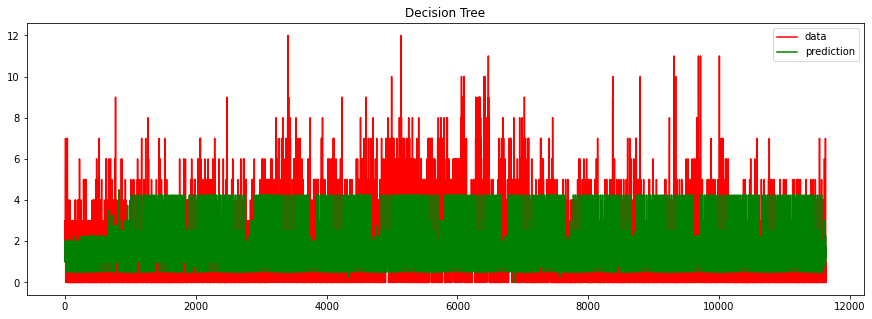

In [ ]:
                
# x axis for plotting
xx = np.stack(i for i in range(test_label_X['etiqueta'].shape[0]))

pre_dims = (15, 5)
fig, ax = pyplot.subplots(figsize=pre_dims) 

plt.plot(xx, test_label_X['etiqueta'], c='r', label='data')
#plt.plot(xx, y, c='k', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("Decision Tree")

plt.show()

## RANDOM FOREST CV -Fire



### Datos y libreria

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold

In [ ]:
train_RFCV = train_fi
test_RFCV = test_fi


###Construccion del modelo

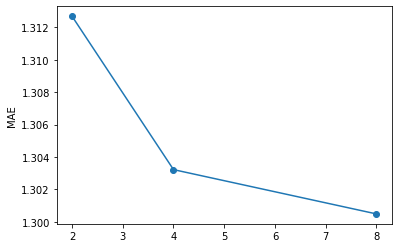

In [ ]:
from sklearn.ensemble import RandomForestRegressor


cv = KFold(n_splits = 5, shuffle = False) 




l_estimators = [2, 4, 8]#, 16, 32, 64 ,128, 256, 512, 1024

total_scores = []
for estimators in l_estimators:
   fold_accuracy = []
   regressor_RFCV =  RandomForestRegressor(n_estimators= estimators, 
                  criterion='mae', max_depth= 8, random_state=0)
   for train_fold, test_fold in cv.split(train_RFCV):
      # División train test aleatoria
      f_train = train_RFCV.loc[train_fold]
      f_test = train_RFCV.loc[test_fold]
      # entrenamiento y ejecución del modelo
      regressor_RFCV.fit( X = f_train.drop(['etiqueta'], axis=1), 
                           y = f_train['etiqueta'])
      y_pred = regressor_RFCV.predict(X = f_test.drop(['etiqueta'], axis = 1))
      # evaluación del modelo
      mae = mean_absolute_error(f_test['etiqueta'], y_pred)
      fold_accuracy.append(mae)
   total_scores.append(sum(fold_accuracy)/len(fold_accuracy))



  
plt.plot(l_estimators, total_scores, marker='o')
plt.ylabel('MAE')      
plt.show() 


### Ejecucion del modelo

In [ ]:
# constructor
regressor_RFCV =  RandomForestRegressor(n_estimators= 8 , max_depth= 8, criterion='mae', 
                                   random_state=0)
# fit

regressor_RFCV.fit( X = train_RFCV.drop(['etiqueta'], axis=1), y = train_RFCV['etiqueta'])
regressor_RFCV

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=8, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
y_pred=regressor_RFCV.predict(test_RFCV)
mae = mean_absolute_error(test_label_X['etiqueta'], y_pred)
print ('MAE', mae)

MAE 1.2007658760849016


### Resultados

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


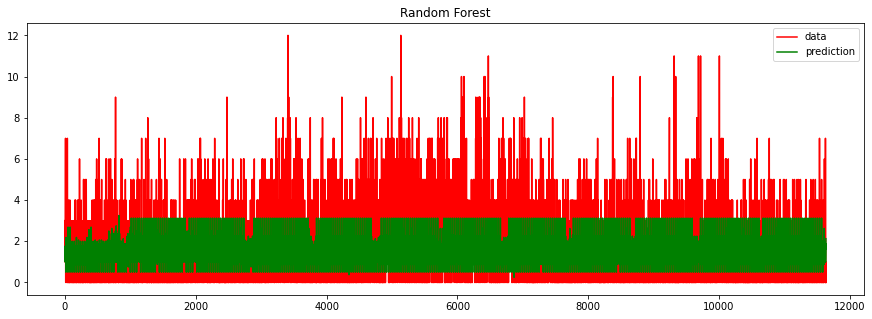

In [ ]:
                
# x axis for plotting
xx = np.stack(i for i in range(test_label_X['etiqueta'].shape[0]))

pre_dims = (15, 5)
fig, ax = pyplot.subplots(figsize=pre_dims) 

plt.plot(xx, test_label_X['etiqueta'], c='r', label='data')
#plt.plot(xx, y, c='k', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("Random Forest")

plt.show()

# OPTIMIZACION DE PARAMETROS

##GRID SEARCH

###KNN

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import randint as sp_randint
from sklearn import neighbors
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
train_GSKNN=train_fi
test_GSKNN=test_fi


In [ ]:
regressor_GSKNN = neighbors.KNeighborsRegressor()
regressor_GSKNN

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

Funcion para selecionar el top "n" de los resultados

In [ ]:
def report(results, n_top=3): 
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

Para ajustar el grid search tenemos que indicar que valores va a comprobar en cada iteracion. Esto hara que todas los hiperparametros se vayan probando sobre el algoritmo, combinandose todos hasta conseguir el mejor algoritmo

In [ ]:
param_dist = {"n_neighbors":list(range(1,20)),
              "weights":["uniform", "distance"],
              "metric":["euclidean","manhattan"],
              "leaf_size":list(range(1,20)),
              "p":[0,1,2]
            }

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

cv = KFold(n_splits = 5, shuffle = False) 


grid_regres = GridSearchCV(estimator = regressor_GSKNN, param_grid= param_dist, cv = cv)

# Fit the random search model
grid_regres.fit(X = train_GSKNN.drop(['etiqueta'], axis=1), 
                           y = train_GSKNN['etiqueta'])

In [ ]:
report(grid_regres.cv_results_, n_top = 5)

In [ ]:
grid_regres.best_estimator_

In [ ]:
# choose the best
best_grid = grid_regres.best_estimator_

# fit and predict
best_grid.fit( X = train_GSKNN.drop(['etiqueta'], axis=1), y = train_GSKNN['etiqueta'])
y_pred = best_grid.predict(X = test_GSKNN.drop(['etiqueta'], axis=1))

In [ ]:
# EVALUATE 
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_label_X['etiqueta'], y_pred)
print ('MAE', mae)

In [ ]:
from sklearn.metrics import mean_absolute_error

                    
# x axis for plotting
import numpy as np
xx = np.stack(i for i in range(test_label_X['etiqueta'].shape[0]))
pre_dims = (15, 5)
fig, ax = pyplot.subplots(figsize=pre_dims) 
plt.plot(xx, test_label_X['etiqueta'], c='r', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("RandomForests GridSearchCV (MAE = %6.2f')" % ( mae))

plt.show()

###DECISSION TREE

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import randint as sp_randint
from sklearn import neighbors
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
train_GSDT=train_fi
test_GSKDT=test_fi


In [ ]:
regressor_GSKDT = DecisionTreeRegressor()
regressor_GSKDT

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Funcion para selecionar el top "n" de los resultados

In [ ]:
def report(results, n_top=3): 
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

Parametros del Random Forest.
Para ajustar el grid search tenemos que indicar que valores va a comprobar en cada iteracion. Esto hara que todas los hiperparametros se vayan probando sobre el algoritmo, combinandose todos hasta conseguir el mejor algoritmo

In [ ]:
param_dist = {"criterion":["gini","entropy"],
              "max_depth"=range(1,15),
              "min_samples_leaf":range(1,10),
              "min_samples_split":range(1,5)
             }

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

cv = KFold(n_splits = 5, shuffle = False) 


grid_regres = GridSearchCV(estimator = regressor_GSKDT, param_grid= param_dist, cv = cv)

# Fit the random search model
grid_regres.fit(X = train_GSDT.drop(['etiqueta'], axis=1), 
                           y = train_GSDT['etiqueta'])

In [ ]:
report(grid_regres.cv_results_, n_top = 5)

In [ ]:
grid_regres.best_estimator_

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=16, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
# choose the best
best_grid = grid_regres.best_estimator_

# fit and predict
best_grid.fit( X = train_GSDT.drop(['etiqueta'], axis=1), y = train_GSDT['etiqueta'])
y_pred = best_grid.predict(X = test_GSDT.drop(['etiqueta'], axis=1))

In [ ]:
# EVALUATE 
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_label_X['etiqueta'], y_pred)
print ('MAE', mae)

MAE 1.38058830052078


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


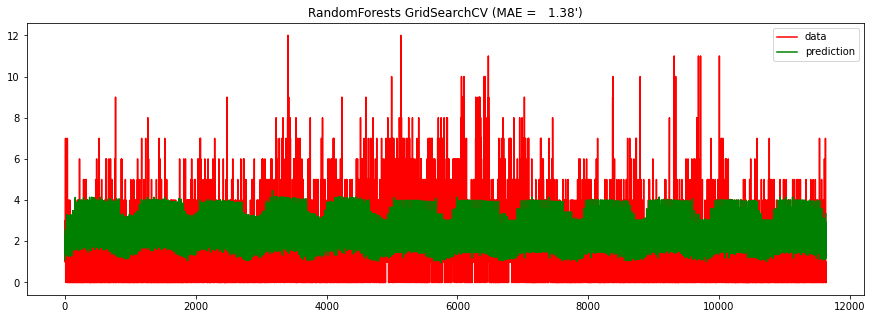

In [ ]:
from sklearn.metrics import mean_absolute_error

                    
# x axis for plotting
import numpy as np
xx = np.stack(i for i in range(test_label_X['etiqueta'].shape[0]))
pre_dims = (15, 5)
fig, ax = pyplot.subplots(figsize=pre_dims) 
plt.plot(xx, test_label_X['etiqueta'], c='r', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("RandomForests GridSearchCV (MAE = %6.2f')" % ( mae))

plt.show()

###RANDOM FOREST

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import randint as sp_randint
from sklearn import neighbors
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold

In [19]:
train_GSRF=train_fi
test_GSRF=test_fi


In [20]:
regressor_GSRF = RandomForestRegressor()
regressor_GSRF

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Funcion para selecionar el top "n" de los resultados

In [21]:
def report(results, n_top=3): 
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

Parametros del Random Forest.
Para ajustar el grid search tenemos que indicar que valores va a comprobar en cada iteracion. Esto hara que todas los hiperparametros se vayan probando sobre el algoritmo, combinandose todos hasta conseguir el mejor algoritmo

In [22]:
param_dist = {"n_estimators": [2,4,8,16], # Number of trees in random forest
              "max_features": ['auto', 'sqrt'], # Number of features to consider at every split
              "max_depth": [8, 4, 2], # Maximum number of levels in tree 
              "min_samples_split": [2, 4, 6, 8], #  Minimum number of samples required to split a node
              "min_samples_leaf": [2, 4, 6, 8], # Minimum number of samples required at each leaf node
              "bootstrap": [True, False] # Method of selecting samples for training each tree
            }

In [23]:
from sklearn.model_selection import TimeSeriesSplit


cv = KFold(n_splits = 5, shuffle = False) 


grid_regres = GridSearchCV(estimator = regressor_GSRF, param_grid= param_dist, cv = cv)

# Fit the random search model
grid_regres.fit(X = train_GSRF.drop(['etiqueta'], axis=1), 
                           y = train_GSRF['etiqueta'])

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n...e,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=Fals

In [24]:
report(grid_regres.cv_results_, n_top = 5)

Model with rank: 1
Mean validation score: 0.125 (std: 0.023)
Parameters: {'bootstrap': False, 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 6, 'min_samples_split': 2, 'n_estimators': 16}

Model with rank: 2
Mean validation score: 0.124 (std: 0.023)
Parameters: {'bootstrap': False, 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 4, 'n_estimators': 16}

Model with rank: 3
Mean validation score: 0.124 (std: 0.025)
Parameters: {'bootstrap': False, 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 6, 'n_estimators': 16}

Model with rank: 4
Mean validation score: 0.123 (std: 0.023)
Parameters: {'bootstrap': True, 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 16}

Model with rank: 5
Mean validation score: 0.123 (std: 0.025)
Parameters: {'bootstrap': True, 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators

In [25]:
grid_regres.best_estimator_

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=6,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=16, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [28]:
# choose the best
best_grid = grid_regres.best_estimator_

# fit and predict
best_grid.fit( X = train_GSRF.drop(['etiqueta'], axis=1), y = train_GSRF['etiqueta'])
y_pred = best_grid.predict(X = test_GSRF)

In [30]:
# EVALUATE 
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_label_X['etiqueta'], y_pred)
print ('MAE', mae)

MAE 1.3566600297116898


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


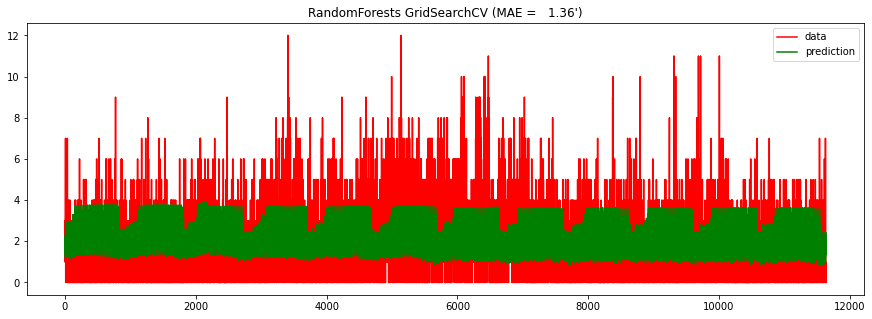

In [31]:
from sklearn.metrics import mean_absolute_error

                    
# x axis for plotting
import numpy as np
xx = np.stack(i for i in range(test_label_X['etiqueta'].shape[0]))
pre_dims = (15, 5)
fig, ax = pyplot.subplots(figsize=pre_dims) 
plt.plot(xx, test_label_X['etiqueta'], c='r', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("RandomForests GridSearchCV (MAE = %6.2f')" % ( mae))

plt.show()

##RANDOM SEARCH

###KNN

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import randint as sp_randint
from sklearn import neighbors
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
train_GSKNN=train_fi
test_GSKNN=test_fi


In [ ]:
regressor_RNKNN = neighbors.KNeighborsRegressor()
regressor_RNKNN

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

Funcion para selecionar el top "n" de los resultados

In [ ]:
def report(results, n_top=3): 
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

Para ajustar el grid search tenemos que indicar que valores va a comprobar en cada iteracion. Esto hara que todas los hiperparametros se vayan probando sobre el algoritmo, combinandose todos hasta conseguir el mejor algoritmo

In [ ]:
param_dist = {"n_neighbors":list(range(1,20)),
              "weights":["uniform", "distance"],
              "metric":["euclidean","manhattan"],
              "leaf_size":list(range(1,20)),
              "p":[0,1,2]
            }

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
cv = KFold(n_splits = 5, shuffle = False) 


rand_regres = RandomizedSearchCV(estimator = regressor_RNKNN, param_distributions= param_dist, cv = cv)

# Fit the random search model
rand_regres.fit(X = train_RNKNN.drop(['etiqueta'], axis=1), 
                           y = train_RNKNN['etiqueta'])

KeyboardInterrupt: ignored

In [ ]:
report(rand_regres.cv_results_, n_top = 5)

In [ ]:
rand_regres.best_estimator_

In [ ]:
# choose the best
best_rand = rand_regres.best_estimator_

# fit and predict
best_rand.fit( X = train_RNKNN.drop(['etiqueta'], axis=1), y = train_RNKNN['etiqueta'])
y_pred = best_rand.predict(X = test_RNKNN.drop(['etiqueta'], axis=1))

In [ ]:
# EVALUATE 
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_label_X['etiqueta'], y_pred)
print ('MAE', mae)

In [ ]:
from sklearn.metrics import mean_absolute_error

                    
# x axis for plotting
import numpy as np
xx = np.stack(i for i in range(test_label_X['etiqueta'].shape[0]))
pre_dims = (15, 5)
fig, ax = pyplot.subplots(figsize=pre_dims) 
plt.plot(xx, test_label_X['etiqueta'], c='r', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("RandomForests GridSearchCV (MAE = %6.2f')" % ( mae))

plt.show()

###DECISSION TREE

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import randint as sp_randint
from sklearn import neighbors
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
train_RNDT=train_fi
test_RNKDT=test_fi


In [ ]:
regressor_RNDT = DecisionTreeRegressor()
regressor_RNDT

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Funcion para selecionar el top "n" de los resultados

In [ ]:
def report(results, n_top=3): 
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


Para ajustar el grid search tenemos que indicar que valores va a comprobar en cada iteracion. Esto hara que todas los hiperparametros se vayan probando sobre el algoritmo, combinandose todos hasta conseguir el mejor algoritmo

In [ ]:
param_dist = {"criterion":["gini","entropy"],
              "max_depth"=range(1,15),
              "min_samples_leaf":range(1,10),
              "min_samples_split":range(1,5)
             }

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
cv = KFold(n_splits = 5, shuffle = False) 

rand_regres = RandomizedSearchCV(estimator = regressor_RNDT, param_distributions= param_dist, cv = cv)

# Fit the random search model
rand_regres.fit(X = train_RNDT.drop(['etiqueta'], axis=1), 
                           y = train_RNDT['etiqueta'])

In [ ]:
report(rand_regres.cv_results_, n_top = 5)

In [ ]:
rand_regres.best_estimator_

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=16, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
# choose the best
best_rand = rand_regres.best_estimator_

# fit and predict
best_rand.fit( X = train_RNDT.drop(['etiqueta'], axis=1), y = train_RNDT['etiqueta'])
y_pred = best_rand.predict(X = test_RNDT.drop(['etiqueta'], axis=1))

In [ ]:
# EVALUATE 
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_label_X['etiqueta'], y_pred)
print ('MAE', mae)

MAE 1.38058830052078


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


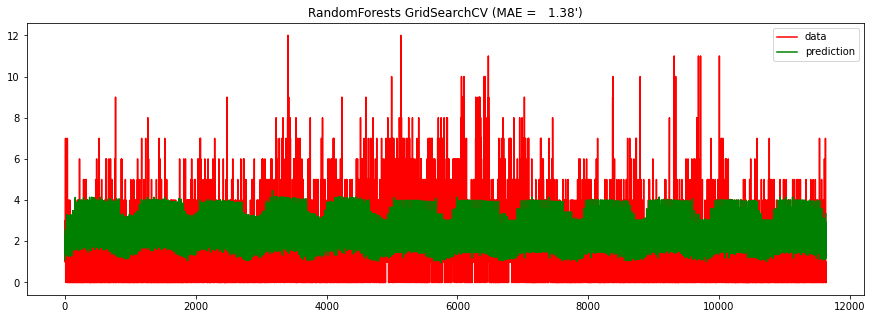

In [ ]:
from sklearn.metrics import mean_absolute_error

                    
# x axis for plotting
import numpy as np
xx = np.stack(i for i in range(test_label_X['etiqueta'].shape[0]))
pre_dims = (15, 5)
fig, ax = pyplot.subplots(figsize=pre_dims) 
plt.plot(xx, test_label_X['etiqueta'], c='r', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("RandomForests GridSearchCV (MAE = %6.2f')" % ( mae))

plt.show()

###RANDOM FOREST

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import randint as sp_randint
from sklearn import neighbors
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [33]:
train_RNRF=train_fi
test_RNRF=test_fi


In [34]:
regressor_RNRF = RandomForestRegressor()
regressor_RNRF

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Funcion para selecionar el top "n" de los resultados

In [35]:
def report(results, n_top=3): 
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

Parametros del Random Forest.
Para ajustar el grid search tenemos que indicar que valores va a comprobar en cada iteracion. Esto hara que todas los hiperparametros se vayan probando sobre el algoritmo, combinandose todos hasta conseguir el mejor algoritmo

In [36]:
param_dist = {"n_estimators": [2,4,8,16], # Number of trees in random forest
              "max_features": ['auto', 'sqrt'], # Number of features to consider at every split
              "max_depth": [8, 4, 2], # Maximum number of levels in tree 
              "min_samples_split": [2, 4, 6, 8], #  Minimum number of samples required to split a node
              "min_samples_leaf": [2, 4, 6, 8], # Minimum number of samples required at each leaf node
              "bootstrap": [True, False] # Method of selecting samples for training each tree
            }

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
cv = KFold(n_splits = 5, shuffle = False) 


rand_regres = RandomizedSearchCV(estimator = regressor_RNRF, param_distributions= param_dist, n_iter = 100, random_state=0,cv = cv)

# Fit the random search model
rand_regres.fit(X = train_RNRF.drop(['etiqueta'], axis=1), 
                           y = train_RNRF['etiqueta'])

In [40]:
report(rand_regres.cv_results_, n_top = 5)

NameError: ignored

In [ ]:
rand_regres.best_estimator_

In [ ]:
# choose the best
best_rand = rand_regres.best_estimator_

# fit and predict
best_rand.fit( X = train_RNRF.drop(['etiqueta'], axis=1), y = train_RNRF['etiqueta'])
y_pred = best_rand.predict(X = test_RNRF.drop(['etiqueta'], axis=1))

In [ ]:
# EVALUATE 
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_RNRF['etiqueta'], y_pred)
print ('MAE', mae)

In [ ]:
from sklearn.metrics import mean_absolute_error

                    
# x axis for plotting
import numpy as np
xx = np.stack(i for i in range(test_label_X['etiqueta'].shape[0]))
pre_dims = (15, 5)
fig, ax = pyplot.subplots(figsize=pre_dims) 
plt.plot(xx, test_label_X['etiqueta'], c='r', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("RandomForests GridSearchCV (MAE = %6.2f')" % ( mae))

plt.show()